In [ ]:
# import pandas as pd

# class CSVProcessor:
#     def __init__(self, file_path):
#         self.file_path = file_path

#     def process_csv(self, replace_null_with='N/A', replace_irrelevant_with='N/A', encoding='utf-8'):
#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(self.file_path, encoding=encoding)

#         # Drop specific columns (e.g., 'condition' and 'state')
#         df = df.drop(columns=['condition', 'state'])

#         # Replace null values with specified string
#         df.fillna(replace_null_with, inplace=True)

#         # Replace 'â€—' with specified string
#         df.replace(['â€”', '\u2014', None], replace_irrelevant_with, inplace=True)

#         # Return the processed DataFrame
#         return df

#     def save_processed_csv(self, processed_df, output_file_path):
#         # Save the processed DataFrame to a new CSV file
#         processed_df.to_csv(output_file_path, index=False)


In [ ]:
# # Initialize CSVProcessor instance with file path
# csv_processor = CSVProcessor('/content/updated_car_prices_1.csv')

# # Process the CSV file
# processed_df = csv_processor.process_csv()

# # Save the processed DataFrame to a new CSV file
# csv_processor.save_processed_csv(processed_df, '/content/updated_car_prices.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

df = pd.read_csv('/content/drive/MyDrive/car_prices_2.csv')

In [ ]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the number of rows and columns
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")


Number of Rows: 558837
Number of Columns: 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   odometer      558743 non-null  float64
 8   color         533377 non-null  object 
 9   interior      541011 non-null  object 
 10  seller        558837 non-null  object 
 11  mmr           558825 non-null  float64
 12  sellingprice  558825 non-null  float64
 13  saledate      558799 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 59.7+ MB


In [ ]:
# Print unique values in the 'color' column and their frequencies
print("Colors present in the 'color' column and their frequencies:")
print(df['color'].value_counts())

# Print unique values in the 'interior' column and their frequencies
print("\nColors present in the 'interior' column and their frequencies:")
print(df['interior'].value_counts())


Colors present in the 'color' column and their frequencies:
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: color, dtype: int64

Colors present in the 'interior' column and their frequencies:
black        244329
gray         178581
beige         59758
tan           44093
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: interior, dtype: int64


In [ ]:
# Get the shape of the DataFrame (number of rows and columns)
num_rows, num_cols = df.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)


Number of Rows: 558837
Number of Columns: 14


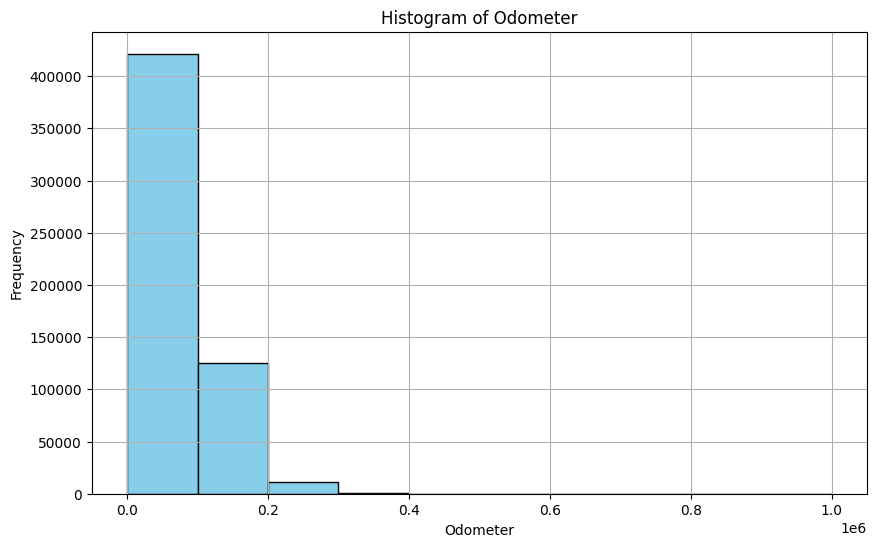

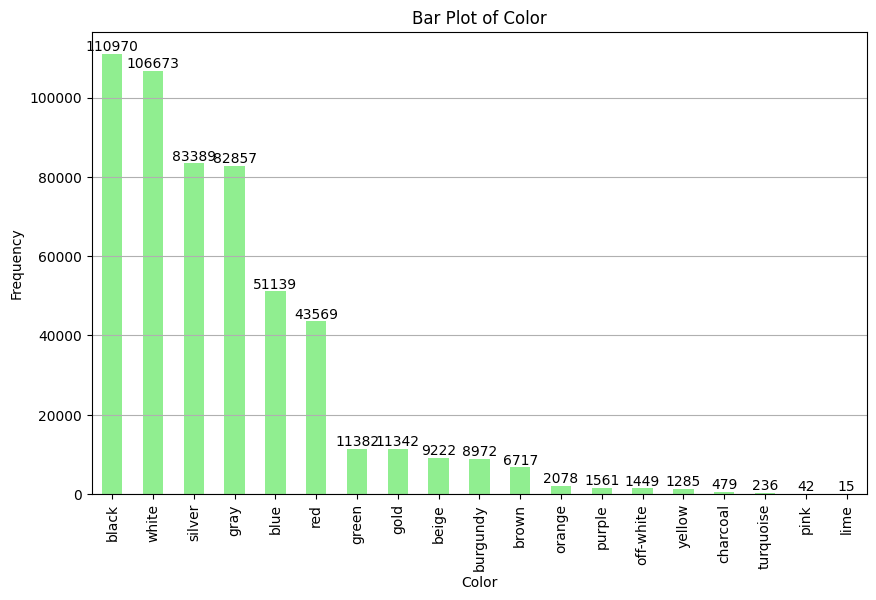

In [ ]:

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(df['odometer'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6))

color_counts = df['color'].value_counts()
color_counts.plot(kind='bar', color='lightgreen')
plt.title('Bar Plot of Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.grid(axis='y')
# Adding values on top of bars
for i, count in enumerate(color_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


In [ ]:
# Assuming df is your DataFrame containing the dataset

# Get unique values in the 'Make' column
def display_cars_by_make(df, make_column):
    unique_makes = df[make_column].unique()

    for make in unique_makes:
        make_cars = df[df[make_column] == make]

        print(f"{make} Cars:")
        print(make_cars)
        print()

display_cars_by_make(df,'make')

VOLKSWAGEN Cars:
       year        make       model        trim         body transmission  \
0      2002  VOLKSWAGEN       jetta    gls 1.8t          NaN          NaN   
1      2011  VOLKSWAGEN       jetta  comfrtline          NaN          NaN   
2      2014  VOLKSWAGEN      routan          se          NaN    automatic   
3      1999  VOLKSWAGEN      beetle     gls tdi          NaN       manual   
4      2011  VOLKSWAGEN       jetta  comfrtline          NaN          NaN   
...     ...         ...         ...         ...          ...          ...   
16412  2008  VOLKSWAGEN  New Beetle           S    hatchback    automatic   
16413  2004  VOLKSWAGEN  New Beetle         GLS    hatchback    automatic   
16414  2002  VOLKSWAGEN  New Beetle    GLS 1.8T    hatchback       manual   
16415  2003  VOLKSWAGEN  New Beetle         GLS  convertible    automatic   
16416  2006  VOLKSWAGEN  New Beetle         TDI    hatchback    automatic   

                     vin  odometer   color interior  \
0  

In [ ]:
# Calculate average MMR pricing for each car maker
average_mmr_by_make = df.groupby('make')['mmr'].mean()

# Find the car maker with the highest average MMR pricing
best_mmr_make = average_mmr_by_make.idxmax()

# Print the result
print(f"The car maker with the best MMR pricing is: {best_mmr_make}")


The car maker with the best MMR pricing is: ROLLS-ROYCE


In [ ]:
# Calculate the difference between MMR and selling prices
df['mmr_difference'] = df['mmr'] - df['sellingprice']

# Calculate the average difference for each car maker
average_difference_by_make = df.groupby('make')['mmr_difference'].mean()

# Find the car maker with the lowest average difference (indicating better prediction)
best_mmr_prediction_make = average_difference_by_make.idxmin()

# Print the result
print(f"The car maker with the best MMR prediction is: {best_mmr_prediction_make}")


The car maker with the best MMR prediction is: AIRSTREAM


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            558837 non-null  int64  
 1   make            548536 non-null  object 
 2   model           548438 non-null  object 
 3   trim            548186 non-null  object 
 4   body            545642 non-null  object 
 5   transmission    493485 non-null  object 
 6   vin             558833 non-null  object 
 7   odometer        558743 non-null  float64
 8   color           533377 non-null  object 
 9   interior        541011 non-null  object 
 10  seller          558837 non-null  object 
 11  mmr             558825 non-null  float64
 12  sellingprice    558825 non-null  float64
 13  saledate        558799 non-null  object 
 14  mmr_difference  558825 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 64.0+ MB
None



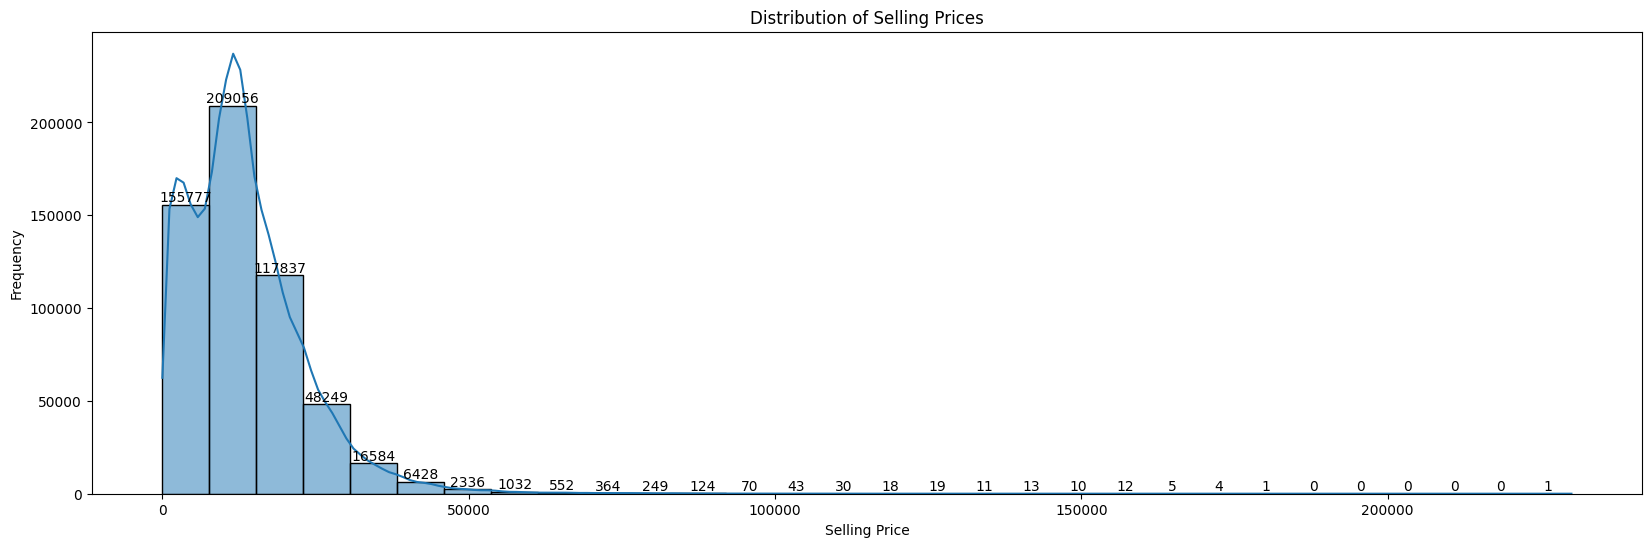

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

# Perform some exploratory data analysis (EDA)
# Example: Count the number of unique values in each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nNumber of Unique Values in Categorical Columns:")
for column in categorical_columns:
    print(f"{column}: {df[column].nunique()}")

# Example: Visualize the distribution of selling prices
plt.figure(figsize=(20, 6))
sns.histplot(df['sellingprice'], bins=30, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")

# Annotate each bar with its respective frequency
for patch in plt.gca().patches:
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
             f"{int(patch.get_height())}", ha='center', va='bottom')

plt.show()


In [ ]:
df.isna().sum()

year                  0
make              10301
model             10399
trim              10651
body              13195
transmission      65352
vin                   4
odometer             94
color             25460
interior          17826
seller                0
mmr                  12
sellingprice         12
saledate             38
mmr_difference       12
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['make'].value_counts()

FORD          93997
CHEVROLET     60587
NISSAN        54017
TOYOTA        39966
DODGE         30955
              ...  
CHEV TRUCK        1
FORD TK           1
MAZDA TK          1
AIRSTREAM         1
DOT               1
Name: make, Length: 62, dtype: int64

In [ ]:
df.groupby("make")['sellingprice'].mean().sort_values(ascending = False)

make
ROLLS-ROYCE    153488.235294
FERRARI        127210.526316
LAMBORGHINI    112625.000000
BENTLEY         74367.672414
AIRSTREAM       71000.000000
                   ...      
DODGE TK          550.000000
GEO               528.947368
DOT               500.000000
FORD TRUCK        483.333333
DAEWOO            400.000000
Name: sellingprice, Length: 62, dtype: float64

In [ ]:
df.sort_values(by = "sellingprice",ascending = False)

year           make       model      trim   body transmission  \
349472  2014           FORD      Escape  Titanium    SUV    automatic   
404311  2011        FERRARI  458 Italia      Base  coupe    automatic   
169237  2015  MERCEDES BENZ     S-Class   S65 AMG  Sedan    automatic   
68010   2013    ROLLS-ROYCE       Ghost      Base  Sedan    automatic   
67995   2012    ROLLS-ROYCE       Ghost      Base  Sedan    automatic   
...      ...            ...         ...       ...    ...          ...   
324906  2012           FORD      Fusion       SEL  Sedan    automatic   
418681  2013          DODGE     Avenger       SXT  Sedan    automatic   
434113  2013          DODGE     Charger        SE  Sedan    automatic   
448962  2013       CHRYSLER         300      Base  Sedan    automatic   
452033  2013       CHRYSLER         200   Touring  Sedan    automatic   

                      vin  odometer   color interior  \
349472  1fmcu9j98eua23833   27802.0   green      tan   
404311  zff67nfa1b0178698   12116.0     red    black   
169237  wddug7kb2fa102347    5277.0   white    white   
68010   sca664s52dux52152    7852.0   white    beige   
67995   sca664s58cux50727   14316.0   black    beige   
...                   ...       ...     ...      ...   
324906  3fahp0jg5cr241590   51648.0   black     gray   
418681  1c3cdzcg5dn741076   44525.0    gray    black   
434113  2c3cdxbg6dh688757   45355.0   white    black   
448962  2c3ccaag9dh723146   44208.0  silver    black   
452033  1c3ccbbb9dn718531   47344.0   white    black   

                             seller       mmr  sellingprice  \
349472  ford-lincoln dealer program   22800.0      230000.0   
404311          platinum motor cars  182000.0      183000.0   
169237            mercedes-benz usa  170000.0      173000.0   
68010    flag/landrover southpointe  178000.0      171500.0   
67995              braman motorcars  154000.0      169500.0   
...                             ...       ...           ...   
324906                      kfl llc       NaN           NaN   
418681                      kfl llc       NaN           NaN   
434113                      kfl llc       NaN           NaN   
448962                      kfl llc       NaN           NaN   
452033                      kfl llc       NaN           NaN   

                                       saledate  mmr_difference  
349472  Wed Feb 25 2015 02:00:00 GMT-0800 (PST)       -207200.0  
404311  Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)         -1000.0  
169237  Thu May 21 2015 05:00:00 GMT-0700 (PDT)         -3000.0  
68010   Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)          6500.0  
67995   Wed Jan 14 2015 01:40:00 GMT-0800 (PST)        -15500.0  
...                                         ...             ...  
324906                                      NaN             NaN  
418681                                      NaN             NaN  
434113                                      NaN             NaN  
448962                                      NaN             NaN  
452033                                      NaN             NaN  

[558837 rows x 15 columns]

In [ ]:
numeric_cols = df.select_dtypes(include = ["int64","float64"])

In [ ]:
correlation_matrix = numeric_cols.corr()

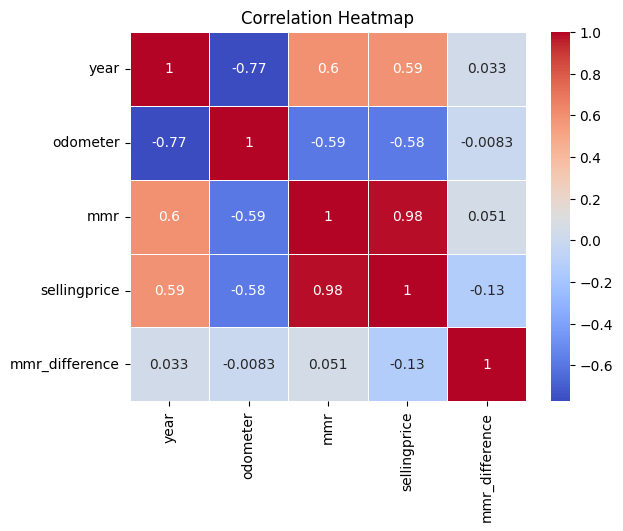

In [ ]:
sns.heatmap(correlation_matrix,annot = True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

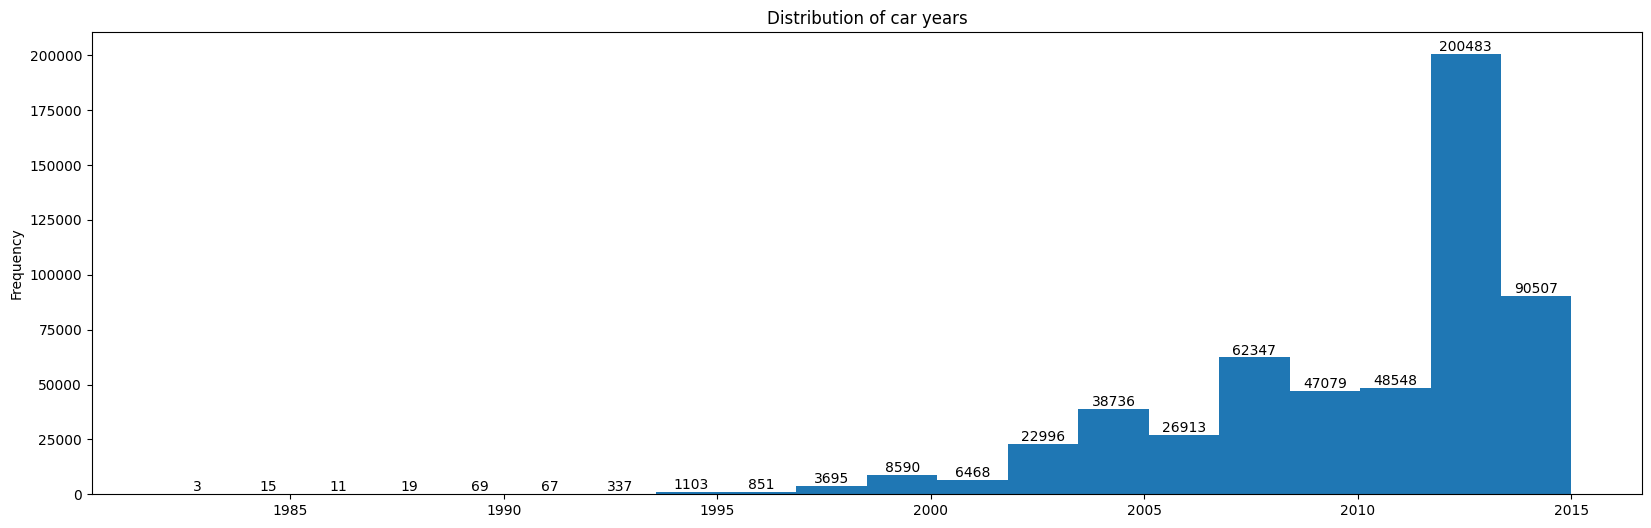

In [ ]:

plt.figure(figsize=(20, 6))
df["year"].plot.hist(bins = 20)
plt.title("Distribution of car years")
# Annotate each bar with its respective frequency
for patch in plt.gca().patches:
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
             f"{int(patch.get_height())}", ha='center', va='bottom')

plt.show()

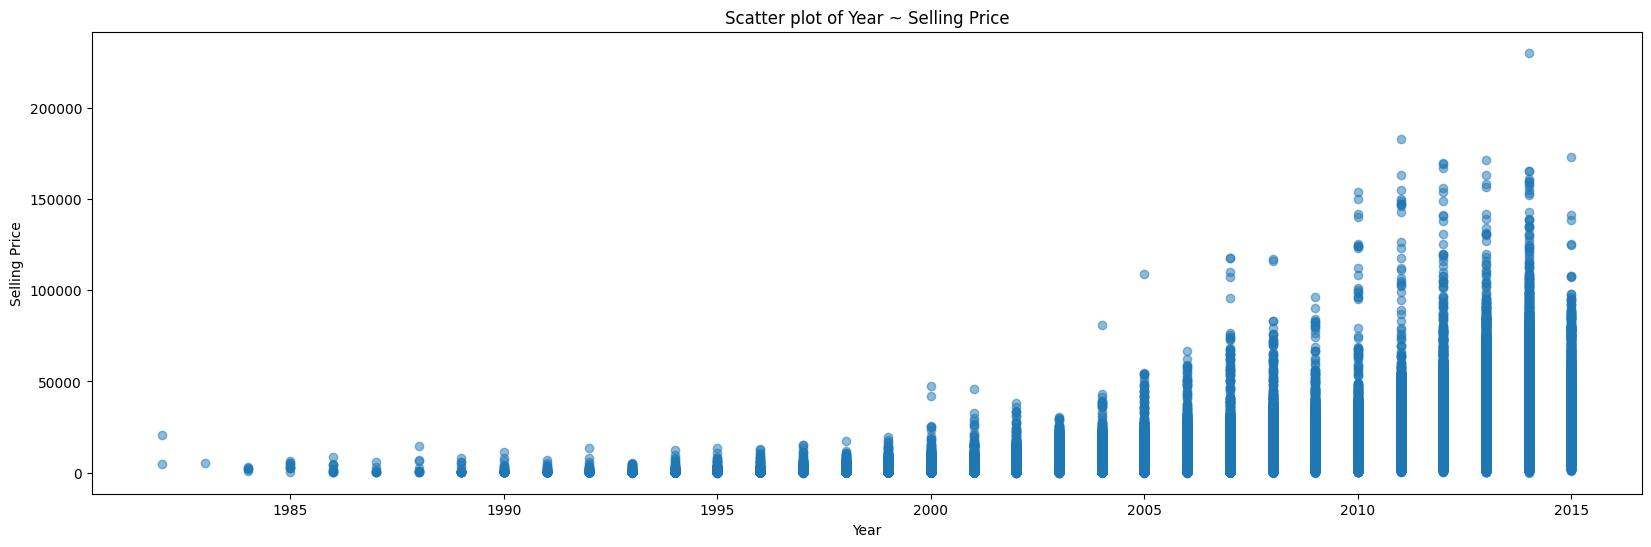

In [ ]:

plt.figure(figsize=(20, 6))
plt.scatter(df["year"],df["sellingprice"],alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Scatter plot of Year ~ Selling Price")
plt.show()

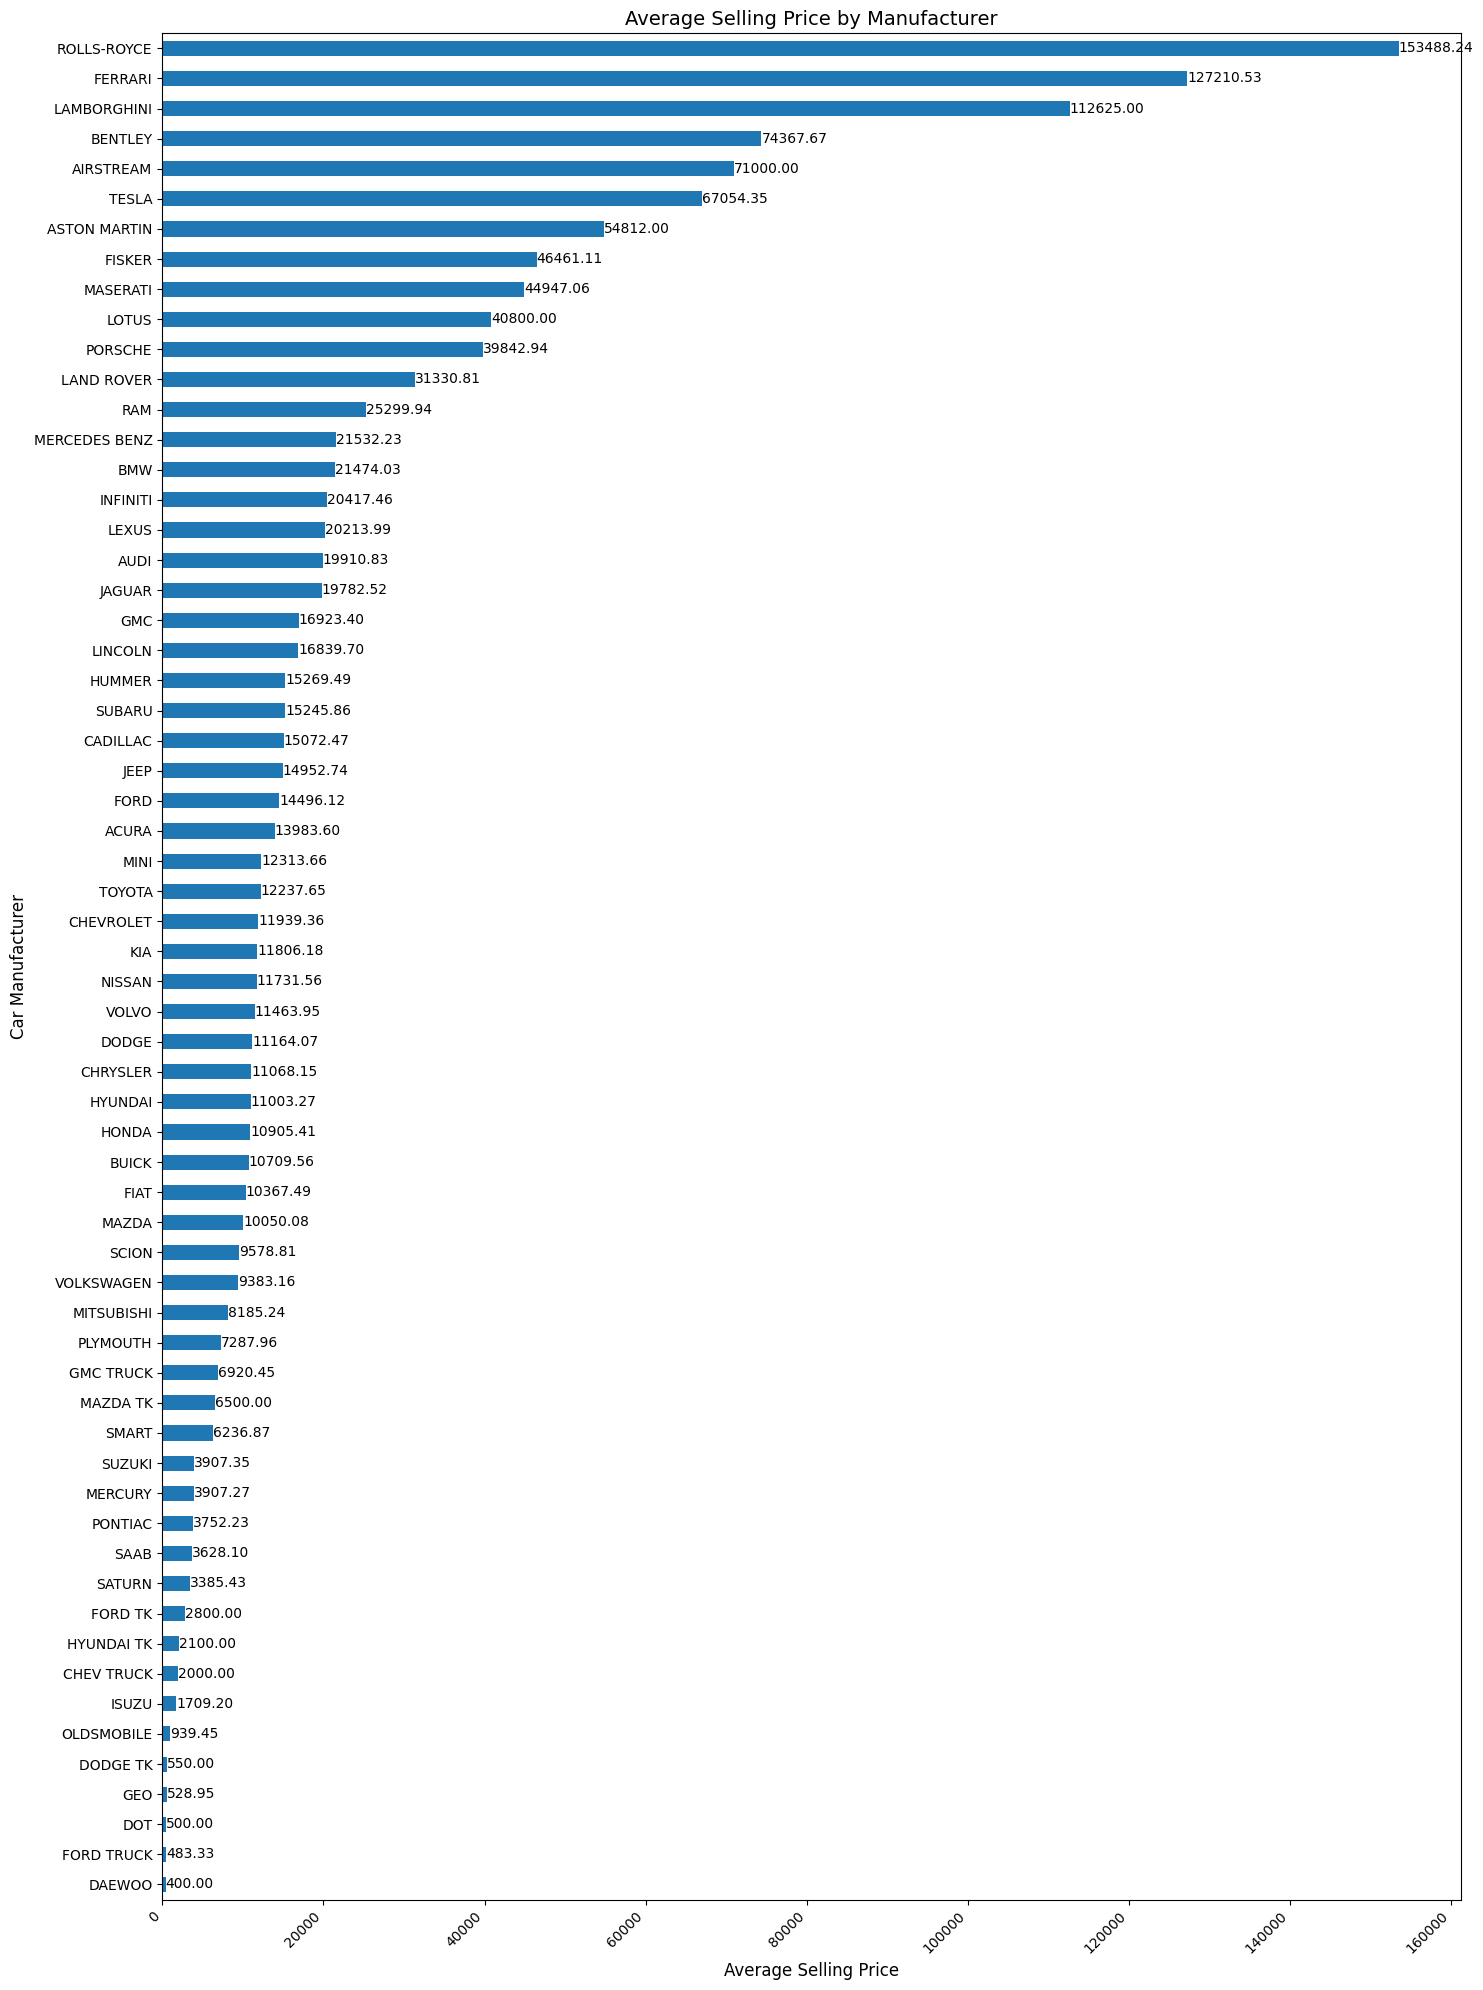

In [ ]:
mean_price_by_make = df.groupby("make")["sellingprice"].mean().sort_values(ascending = True)

plt.figure(figsize=(15, 20))
mean_price_by_make.plot(kind="barh")
# Annotate each bar with its value
for index, value in enumerate(mean_price_by_make):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')
plt.ylabel("Car Manufacturer", fontsize=12)
plt.xlabel("Average Selling Price", fontsize=12)
plt.title("Average Selling Price by Manufacturer", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Number of Models per Car Maker:
make
CHEVROLET        91
FORD             75
BMW              42
DODGE            40
MERCEDES BENZ    39
                 ..
CHEV TRUCK        1
LOTUS             1
DODGE TK          1
DOT               1
ROLLS-ROYCE       1
Name: model, Length: 62, dtype: int64


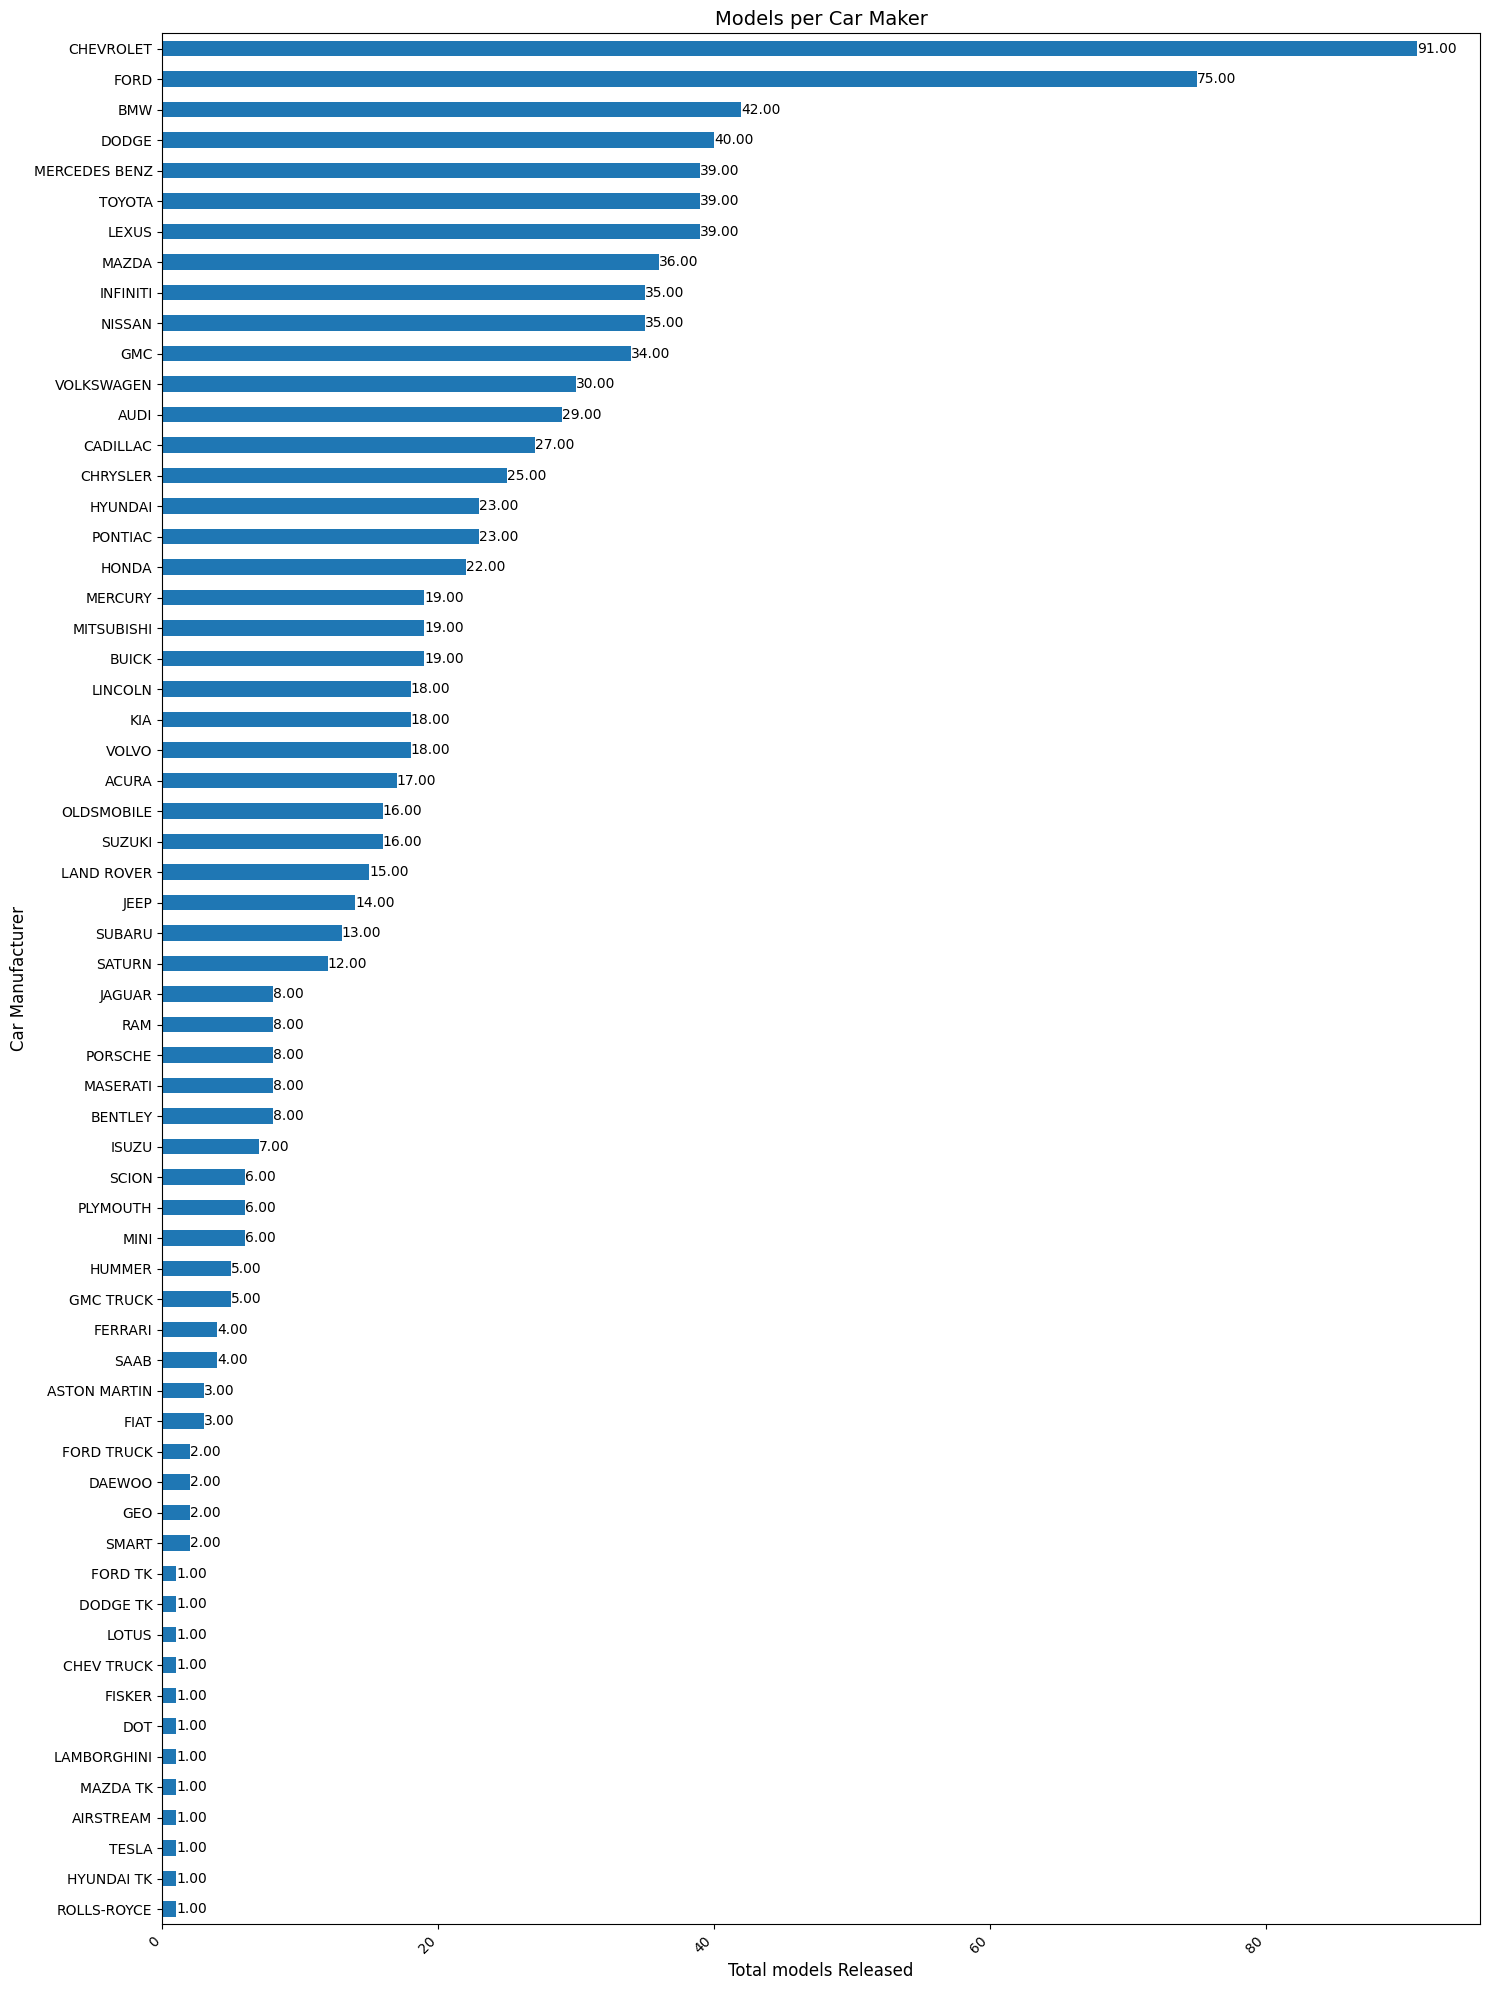

In [ ]:
# Group by car maker and count the number of unique models
models_per_make = df.groupby('make')['model'].nunique()

models_per_make = models_per_make.sort_values(ascending=False)

# Display the result
print("Number of Models per Car Maker:")
print(models_per_make)
models_per_make = models_per_make.sort_values(ascending=True)
plt.figure(figsize=(15, 20))
models_per_make.plot(kind="barh")
for index, value in enumerate(models_per_make):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')
plt.ylabel("Car Manufacturer", fontsize=12)
plt.xlabel("Total models Released", fontsize=12)
plt.title("Models per Car Maker", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

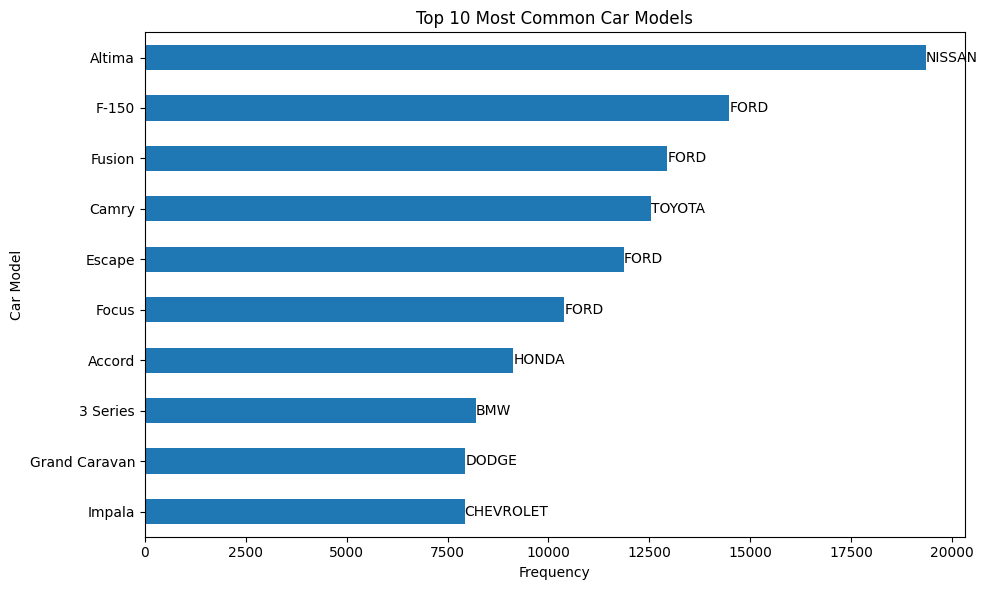

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 most common car models in ascending order
top_10_models = df["model"].value_counts().head(10).sort_values(ascending=True)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = top_10_models.plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Car Model")
plt.title("Top 10 Most Common Car Models")

# Annotate each bar with the corresponding car maker name
for i, v in enumerate(top_10_models):
    model_name = top_10_models.index[i]
    car_maker = df[df["model"] == model_name]["make"].iloc[0]
    ax.text(v, i, car_maker, color='black', va='center', ha='left', fontsize=10)

plt.tight_layout()  # Automatically adjust layout
plt.show()


In [ ]:
# Group the data by car maker and car model, and aggregate the odometer readings
car_info = df.groupby(['make', 'model'])['odometer'].agg(['min', 'max', 'mean'])

# Reset the index to make 'car_maker' and 'car_model' regular columns
car_info = car_info.reset_index()

# Initialize an empty string to store the output
output = ""

# Iterate over each group and append the manufacturer name followed by car models and odometer statistics to the output string
for manufacturer, group in car_info.groupby('make'):
    output += f"Manufacturer: {manufacturer}\n\n"
    output += group[['model', 'min', 'max', 'mean']].to_string(index=False) + "\n\n"

# Print or use the variable 'output' as needed
print(output)


Manufacturer: ACURA

          model      min      max          mean
             CL  39857.0 392026.0 159363.680412
            ILX   1943.0 106756.0  25933.450000
        Integra 102149.0 434901.0 180317.704545
         Legend 140570.0 276026.0 200834.777778
            MDX      1.0 396211.0  93141.445288
            RDX      6.0 309422.0  61084.054762
             RL      1.0 451641.0 139037.787037
            RLX   4736.0  38014.0  16674.823529
            RSX      1.0 219581.0 129568.417219
             TL      1.0 495757.0  93238.537705
            TLX   8050.0   8050.0   8050.000000
            TSX   3116.0 343369.0  60306.842717
TSX Sport Wagon   6536.0  90273.0  36304.277778
            ZDX  15011.0 152021.0  43824.179487
             el 172444.0 217418.0 194931.000000
            mdx  51088.0 108661.0  74919.250000
             rl  95605.0 201144.0 135725.043478

Manufacturer: AIRSTREAM

     model     min     max    mean
interstate 51971.0 51971.0 51971.0

Manufacturer: ASTO

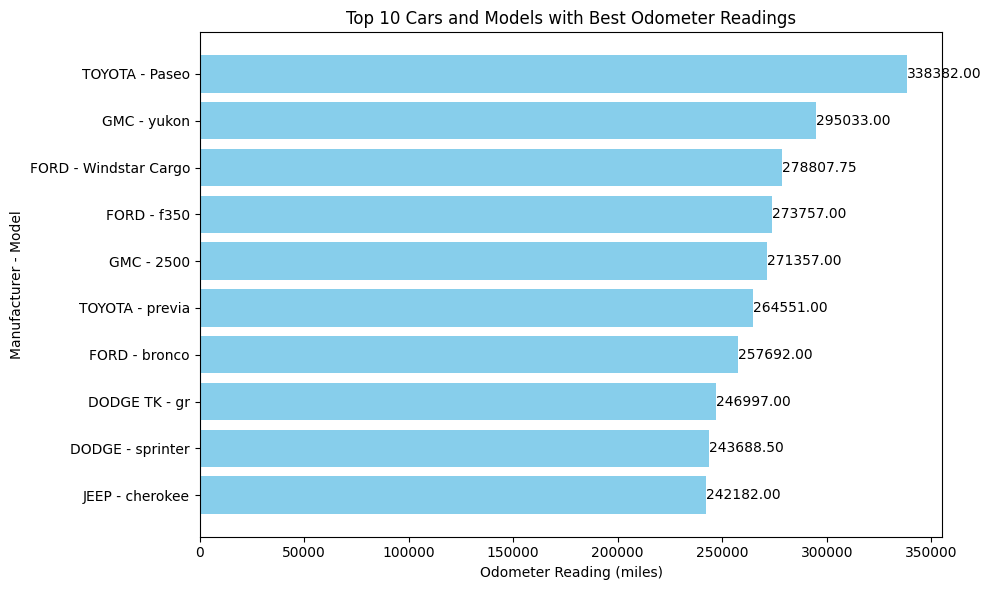

In [ ]:
import matplotlib.pyplot as plt

# Convert the NumPy array to a tuple before using it as a key in the dictionary
best_odometer_readings = {(make, model): mean_odometer for (make, model), mean_odometer in zip(car_info[['make', 'model']].values, car_info['mean'].values)}

# Sort the best odometer readings dictionary by values in descending order
sorted_best_odometer_readings = dict(sorted(best_odometer_readings.items(), key=lambda item: item[1], reverse=True))

# Extract top 10 manufacturers names and corresponding best odometer readings
top_10_manufacturers = list(sorted_best_odometer_readings.keys())[:10]
top_10_odometers = [odometer for (_, odometer) in sorted_best_odometer_readings.items()][:10]

# Convert manufacturer names to strings to make them hashable
top_10_manufacturers_str = [f"{make} - {model}" for (make, model) in top_10_manufacturers]

# Plot the horizontal bar chart for top 10 manufacturers
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_manufacturers_str, top_10_odometers, color='skyblue')
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Manufacturer - Model')
plt.title('Top 10 Cars and Models with Best Odometer Readings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest odometer reading at the top

# Add values at the tip of each bar
for bar, value in zip(bars, top_10_odometers):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


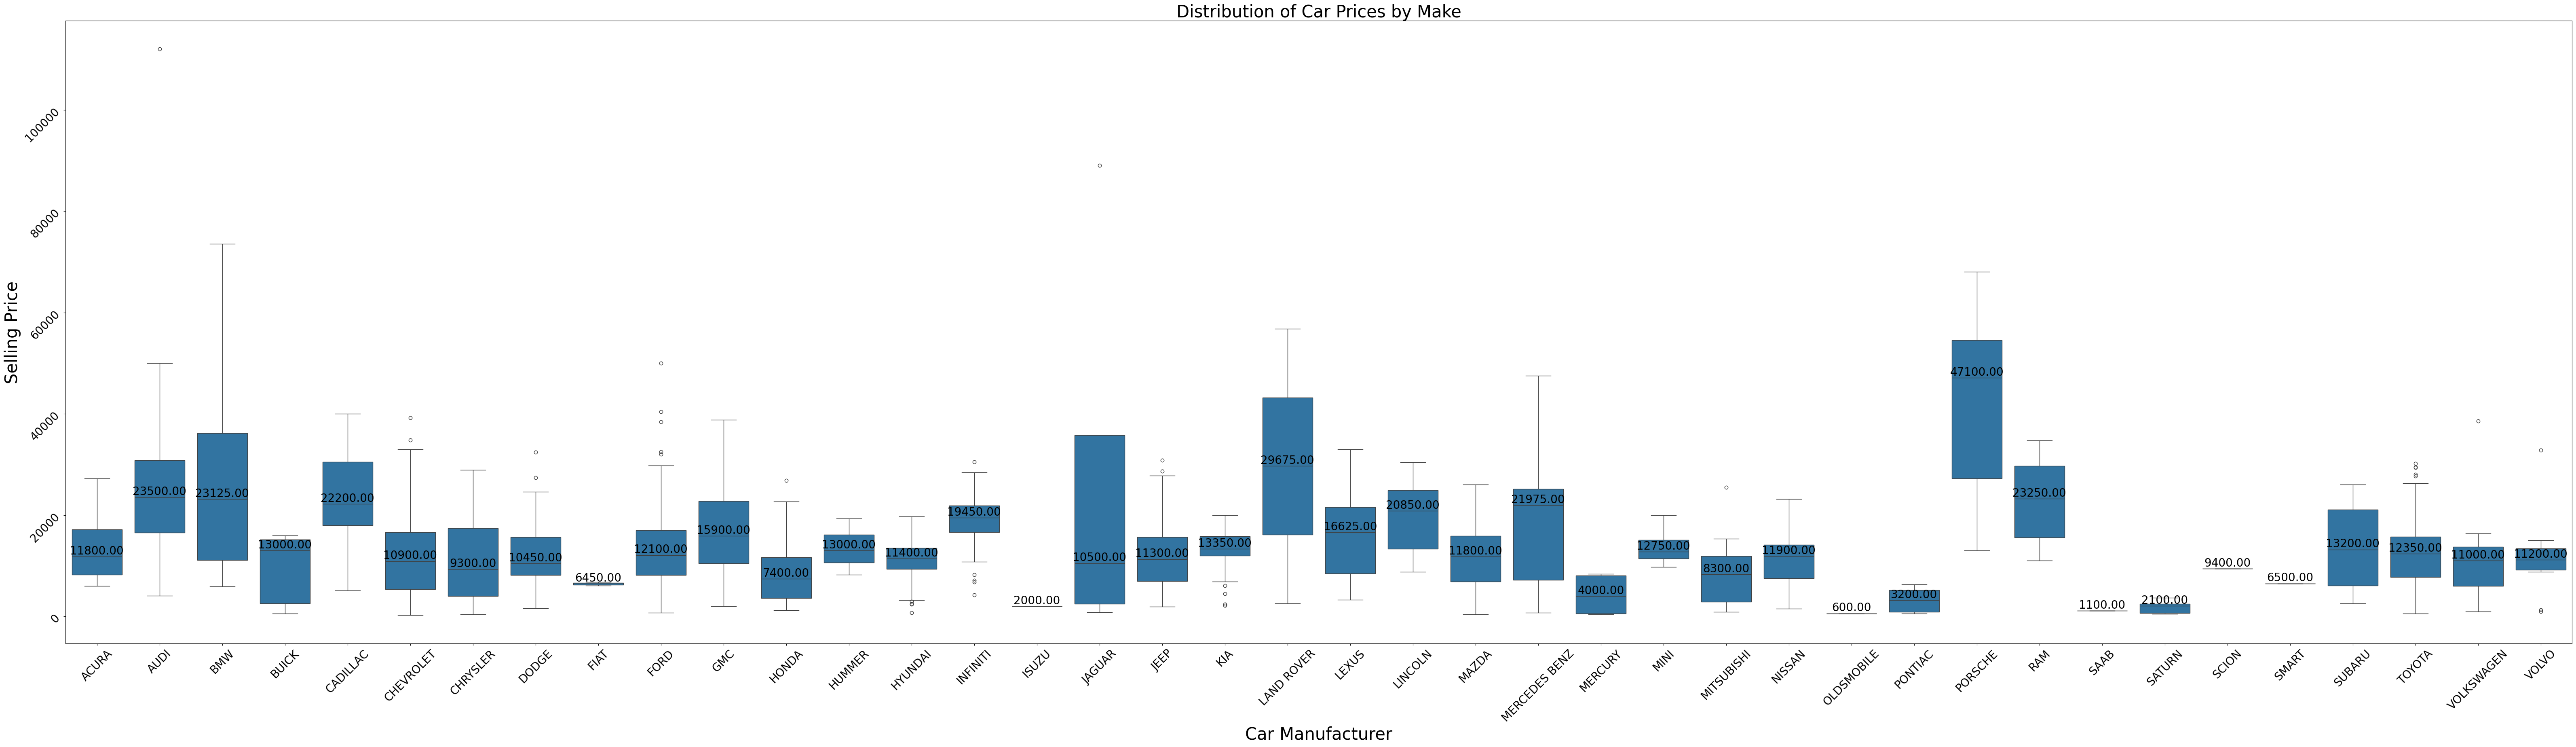

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Assuming df is your DataFrame containing the dataset
# Also assuming you have defined the display_cars_by_make method

# Call the method to display cars by make
# display_cars_by_make(df, 'make')

# Perform data visualizations
# Replace 'price_column_name' with the correct column name representing car prices in your dataset
plt.figure(figsize=(80, 20))  # Adjust figure size if needed

# Sample a subset of data points for visualization
sample_size = min(1000, len(df))  # Limit sample size to avoid long processing times
sample_indices = random.sample(range(len(df)), sample_size)
sample_data = df.iloc[sample_indices]

# Sort the data by 'make' column
sample_data_sorted = sample_data.sort_values(by='make')

sns.boxplot(x='make', y='sellingprice', data=sample_data_sorted)
plt.xticks(rotation=45, fontsize=20)  # Rotate x-axis labels and increase font size
plt.yticks(rotation=45, fontsize=20)
plt.title('Distribution of Car Prices by Make',fontsize=30)
plt.xlabel('Car Manufacturer',fontsize=30)
plt.ylabel('Selling Price',fontsize=30)

# Annotate specific values
for i, make in enumerate(sample_data_sorted['make'].unique()):
    make_data = sample_data_sorted[sample_data_sorted['make'] == make]
    median_price = make_data['sellingprice'].median()
    plt.text(i, median_price, f'{median_price:.2f}', ha='center', va='bottom', fontsize=20)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1.0)
plt.show()

# You can add more visualizations as needed based on your analysis requirements


In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming df is the DataFrame containing the dataset

# Group the data by year and make, and find the maximum selling price for each group
max_selling_price = df.groupby(['year', 'make'])['sellingprice'].max().reset_index()

# Merge with the original DataFrame to retrieve additional information
merged_data = pd.merge(max_selling_price, df, on=['year', 'make', 'sellingprice'], how='inner')

# Calculate the MMR difference
merged_data['mmr_difference'] = merged_data['mmr'] - merged_data['sellingprice']

# Select relevant columns
result = merged_data[['year', 'make', 'model', 'color', 'mmr', 'sellingprice', 'mmr_difference']]

# Display the result
print(tabulate(result, headers='keys', tablefmt='psql'))


+-----+--------+---------------+-------------------------+-----------+--------+----------------+------------------+
|     |   year | make          | model                   | color     |    mmr |   sellingprice |   mmr_difference |
|-----+--------+---------------+-------------------------+-----------+--------+----------------+------------------|
|   0 |   1984 | CHEVROLET     | corvette                | black     |   3300 |           3100 |              200 |
|   1 |   1985 | CHEVROLET     | corvette                | gray      |   2300 |           4000 |            -1700 |
|   2 |   1986 | CHEVROLET     | corvette                | red       |   5000 |           8600 |            -3600 |
|   3 |   1986 | MERCEDES BENZ | 420sel                  | black     |   1625 |           1400 |              225 |
|   4 |   1987 | MERCEDES BENZ | 300e                    | silver    |    550 |            300 |              250 |
|   5 |   1989 | CHEVROLET     | corvette                | red       |  

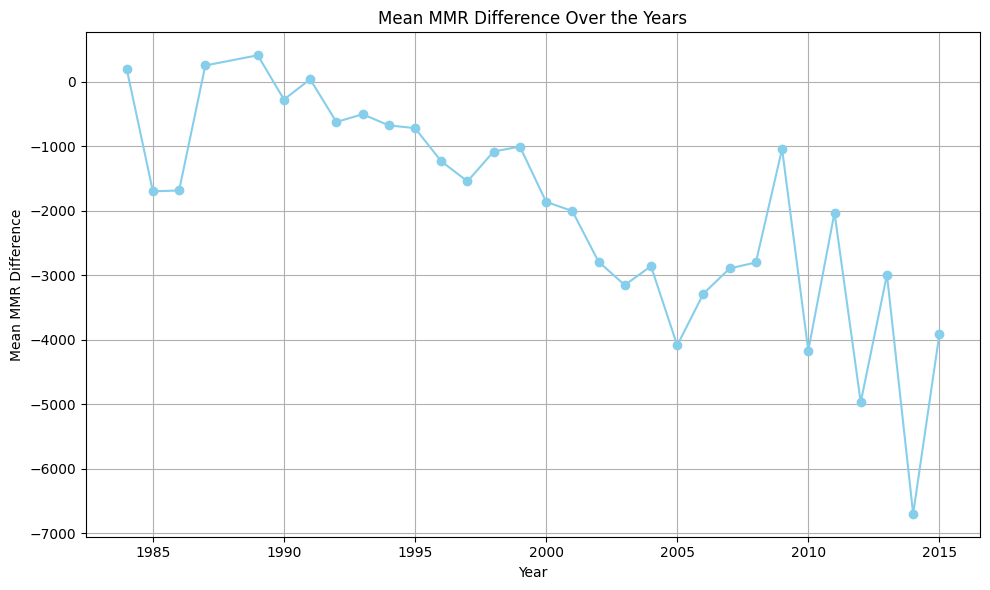

In [ ]:
yearly_mmr_difference = merged_data.groupby('year')['mmr_difference'].mean()

# Plot the MMR difference over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_mmr_difference.index, yearly_mmr_difference.values, marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mean MMR Difference')
plt.title('Mean MMR Difference Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze the MMR difference trend over the years
# Determine if there is any consistent increase or decrease in the mean MMR difference over time

# Check if there is a general trend in MMR difference
if yearly_mmr_difference.diff().mean() > 0:
    trend = "increasing"
elif yearly_mmr_difference.diff().mean() < 0:
    trend = "decreasing"
else:
    trend = "stable"

# Identify the years with the highest and lowest MMR difference
max_year = yearly_mmr_difference.idxmax()
min_year = yearly_mmr_difference.idxmin()

# Get the corresponding MMR differences
max_mmr_diff = yearly_mmr_difference[max_year]
min_mmr_diff = yearly_mmr_difference[min_year]

# Print the conclusions
print("Conclusions:")
print(f"- The mean MMR difference shows a {trend} trend over the years.")
print(f"- The year {max_year} has the highest mean MMR difference of {max_mmr_diff:.2f}.")
print(f"- The year {min_year} has the lowest mean MMR difference of {min_mmr_diff:.2f}.")


Conclusions:
- The mean MMR difference shows a decreasing trend over the years.
- The year 1989 has the highest mean MMR difference of 408.33.
- The year 2014 has the lowest mean MMR difference of -6697.67.


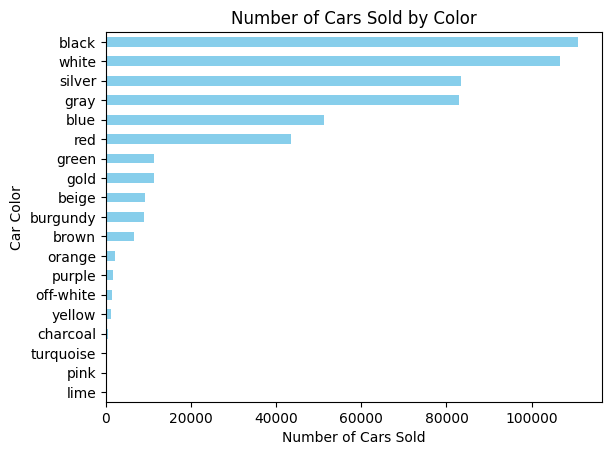

In [ ]:
import matplotlib.pyplot as plt

# Sort the color counts in descending order
color_counts_sorted = color_counts.sort_values(ascending=True)

# Plot the count of cars sold for each color
color_counts_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Car Color')
plt.title('Number of Cars Sold by Color')
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Step 1: Group the data by color and count the number of cars for each color
color_counts = df['color'].value_counts()

# Step 2: Find the most frequent color
most_frequent_color = color_counts.idxmax()

# Step 3: Filter the data for the most frequent color
filtered_data = df[df['color'] == most_frequent_color]

# Step 4: Group the filtered data by car make and calculate the total selling price for each make
make_selling_price = filtered_data.groupby('make')['sellingprice'].sum()

# Step 5: Find the car maker with the highest total selling price
best_selling_make = make_selling_price.idxmax()

# Step 6: Filter the data for the best selling car maker
best_selling_make_data = filtered_data[filtered_data['make'] == best_selling_make]

# Step 7: Group the data for the best selling car maker by car model and count the number of cars for each model
model_counts = best_selling_make_data['model'].value_counts()

# Step 8: Find the car model with the highest count
best_selling_model = model_counts.idxmax()

# Step 9: Print the output
print(f"{best_selling_make} is the automaker with the highest sales volume. The {best_selling_model} is the company's most well-known vehicle and {most_frequent_color} is the color that is most in demand.")


FORD is the automaker with the highest sales volume. The F-150 is the company's most well-known vehicle and black is the color that is most in demand.


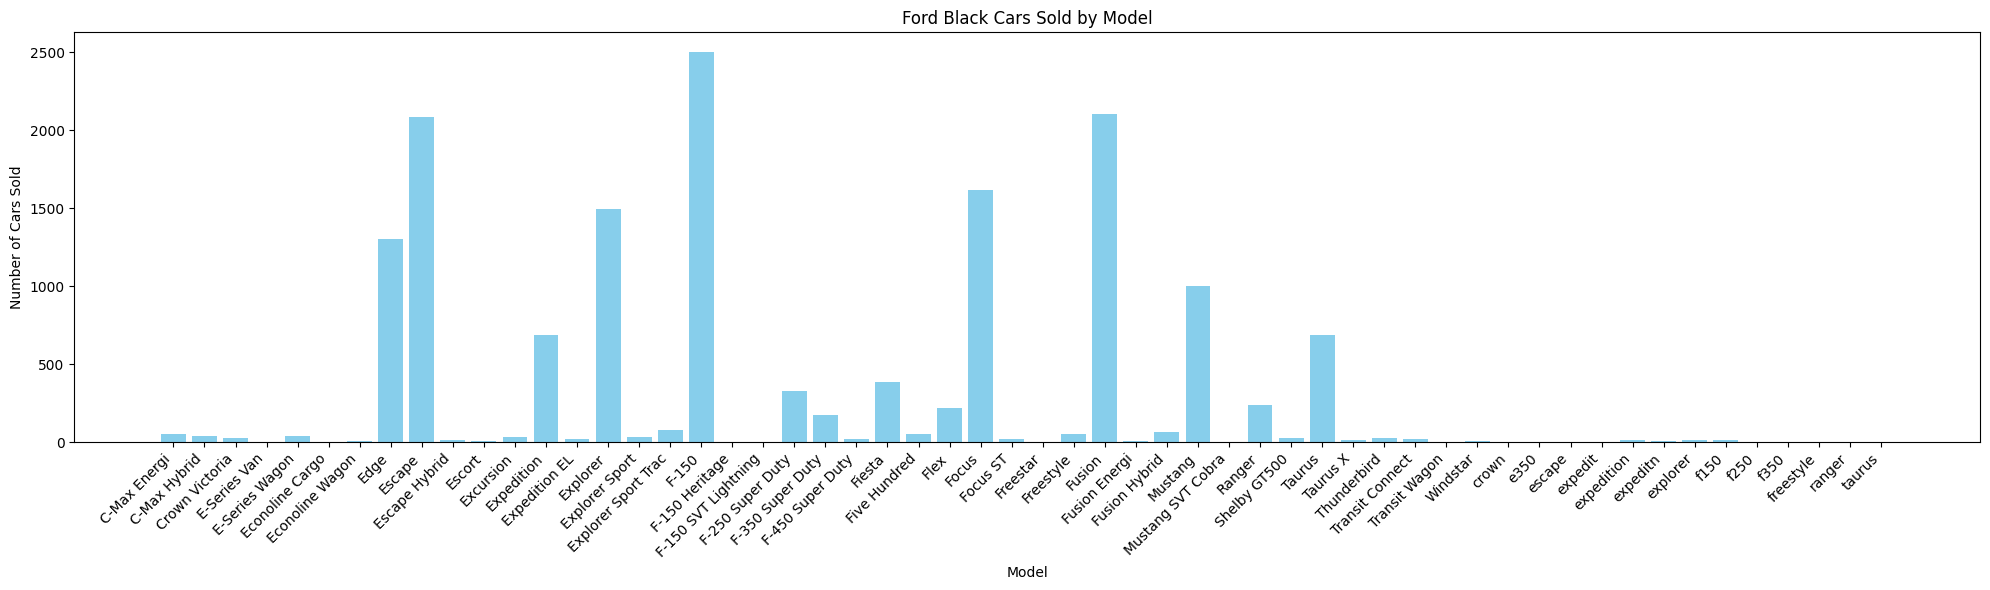

In [ ]:

# Filter the DataFrame to include only Ford cars with white color
ford_white_cars = df[(df['make'] == 'FORD') & (df['color'] == 'black')]

# Group the filtered data by car model
ford_white_cars_by_model = ford_white_cars.groupby('model').size()

# Plot all Ford car models with white color
plt.figure(figsize=(20, 6))
plt.bar(ford_white_cars_by_model.index, ford_white_cars_by_model.values, color='skyblue')
plt.title('Ford Black Cars Sold by Model')
plt.xlabel('Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


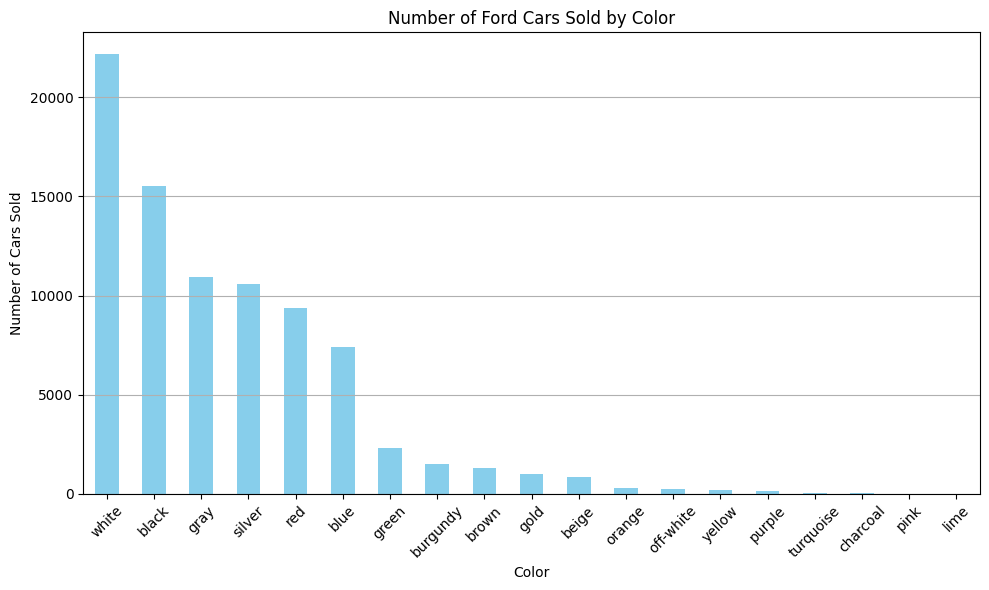

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only Ford cars
ford_data = df[df['make'] == 'FORD']

# Plot a histogram of colors for Ford cars
plt.figure(figsize=(10, 6))
ford_data['color'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Color')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Ford Cars Sold by Color')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


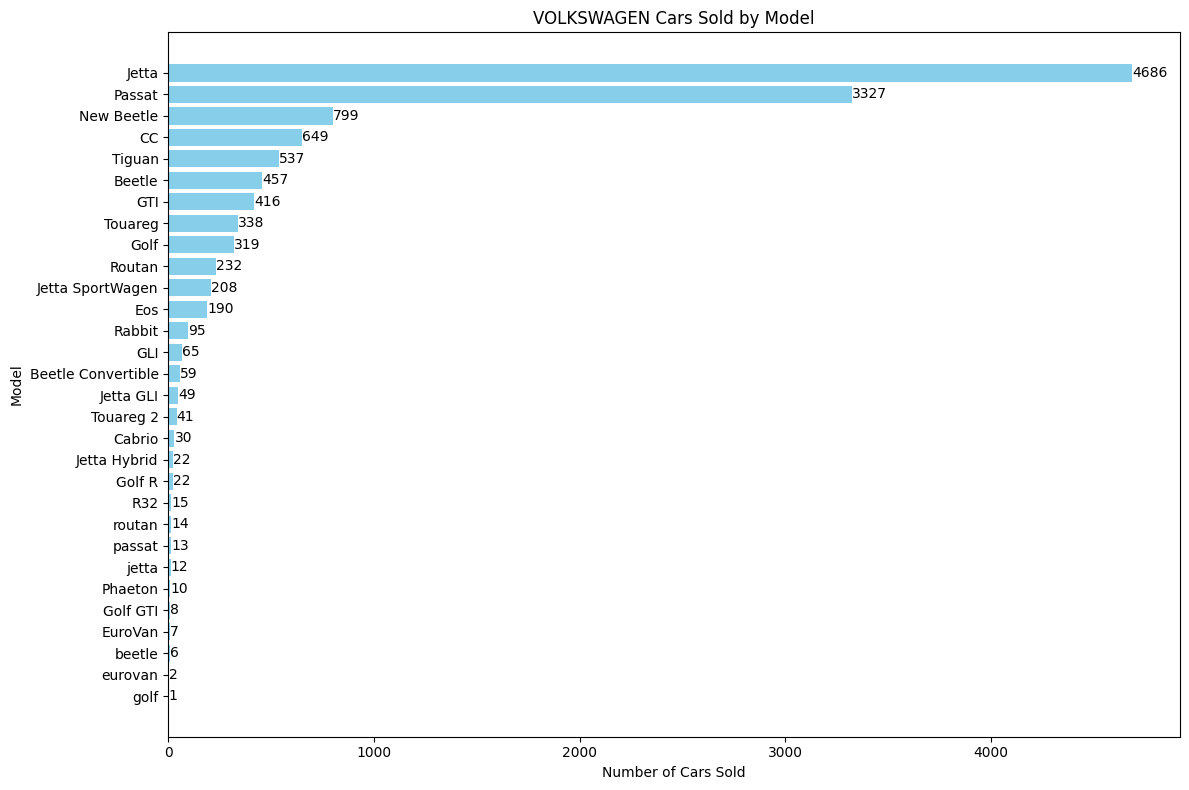

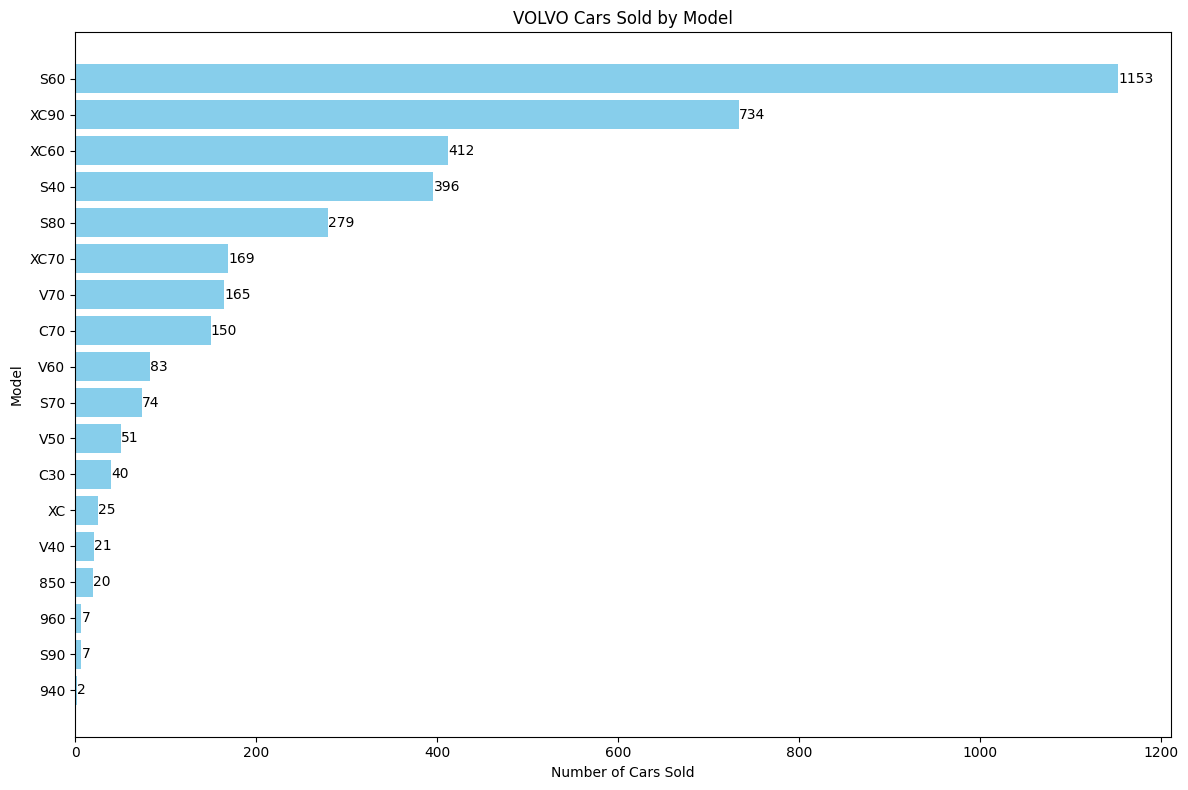

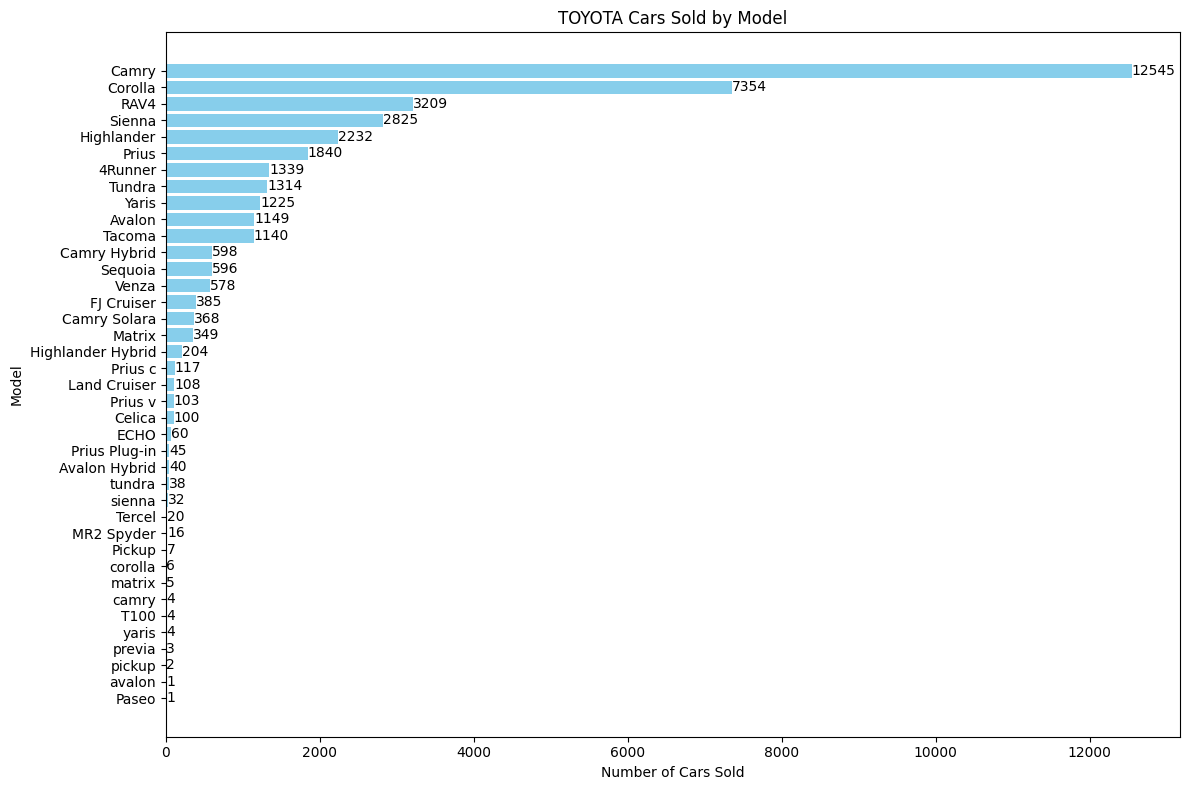

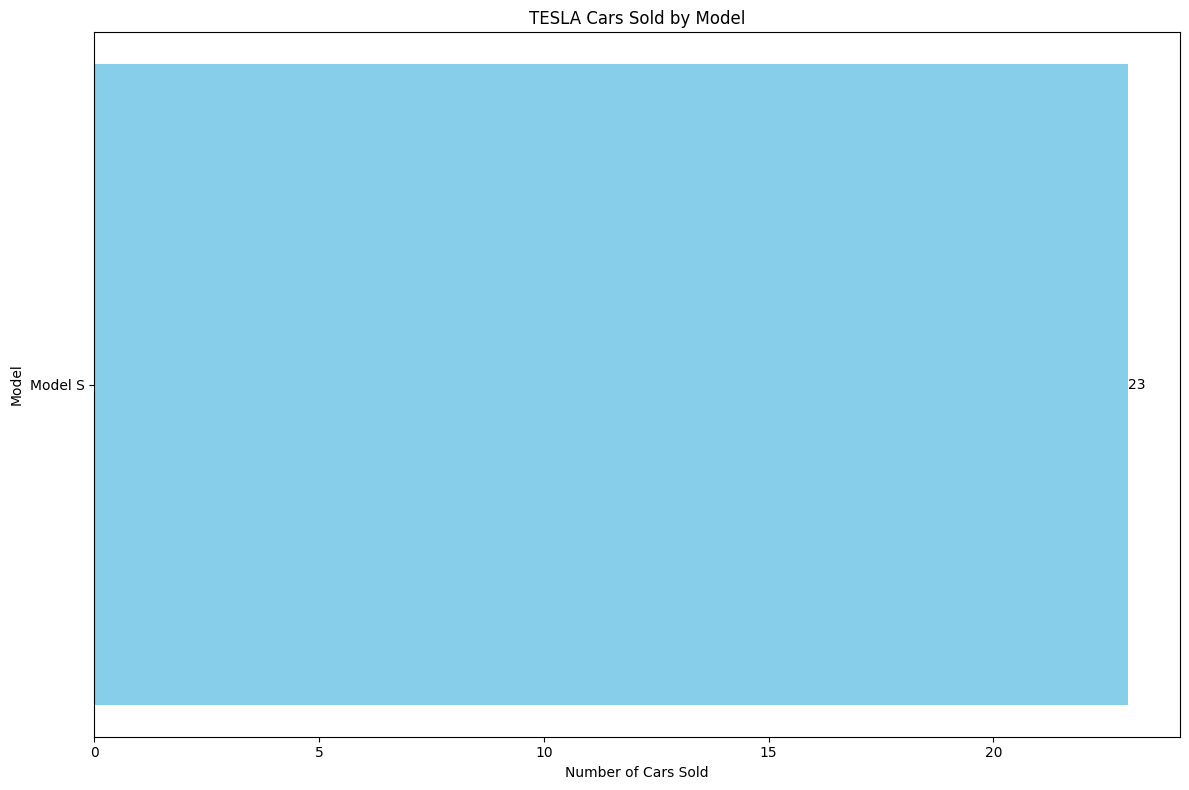

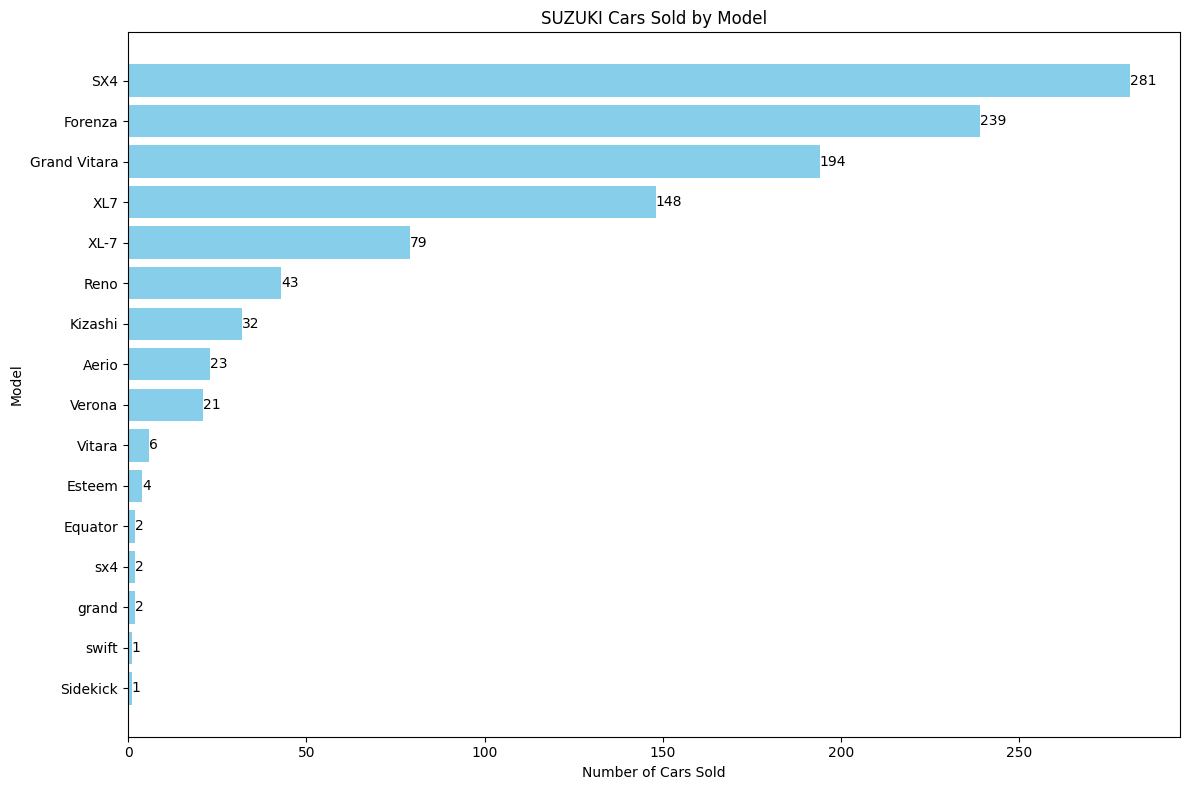

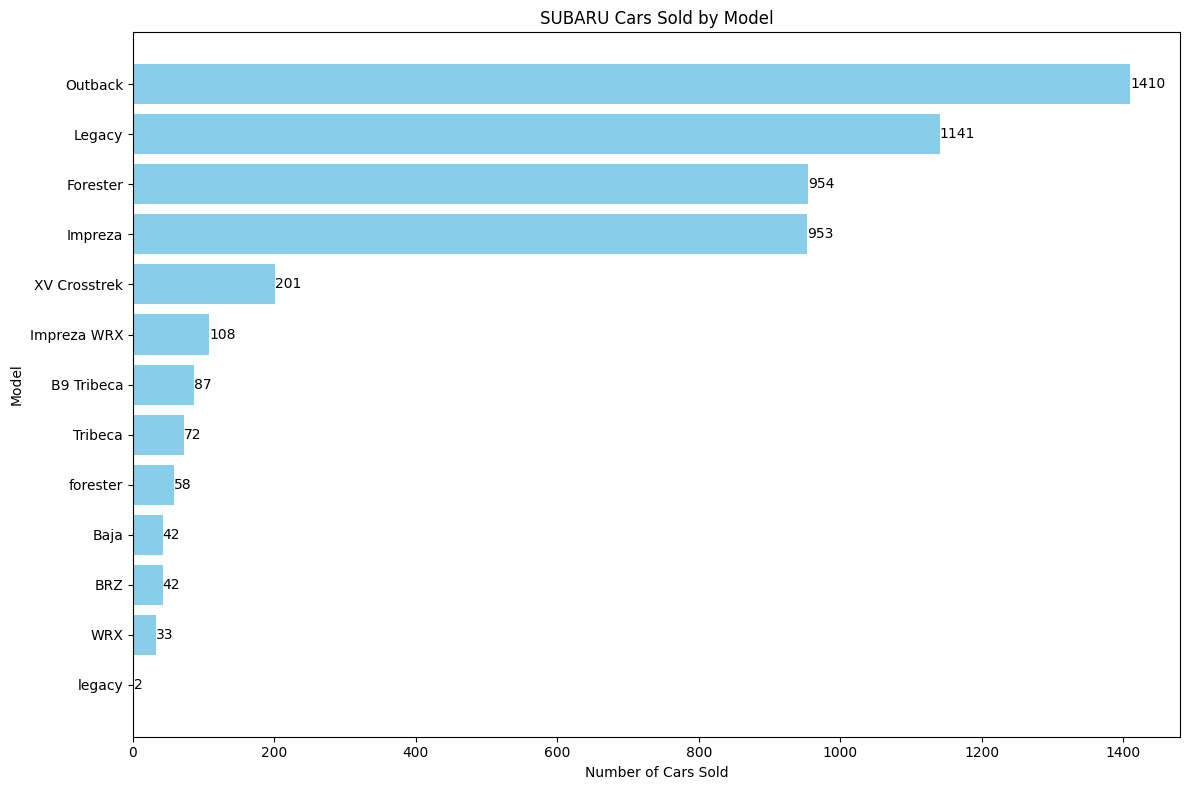

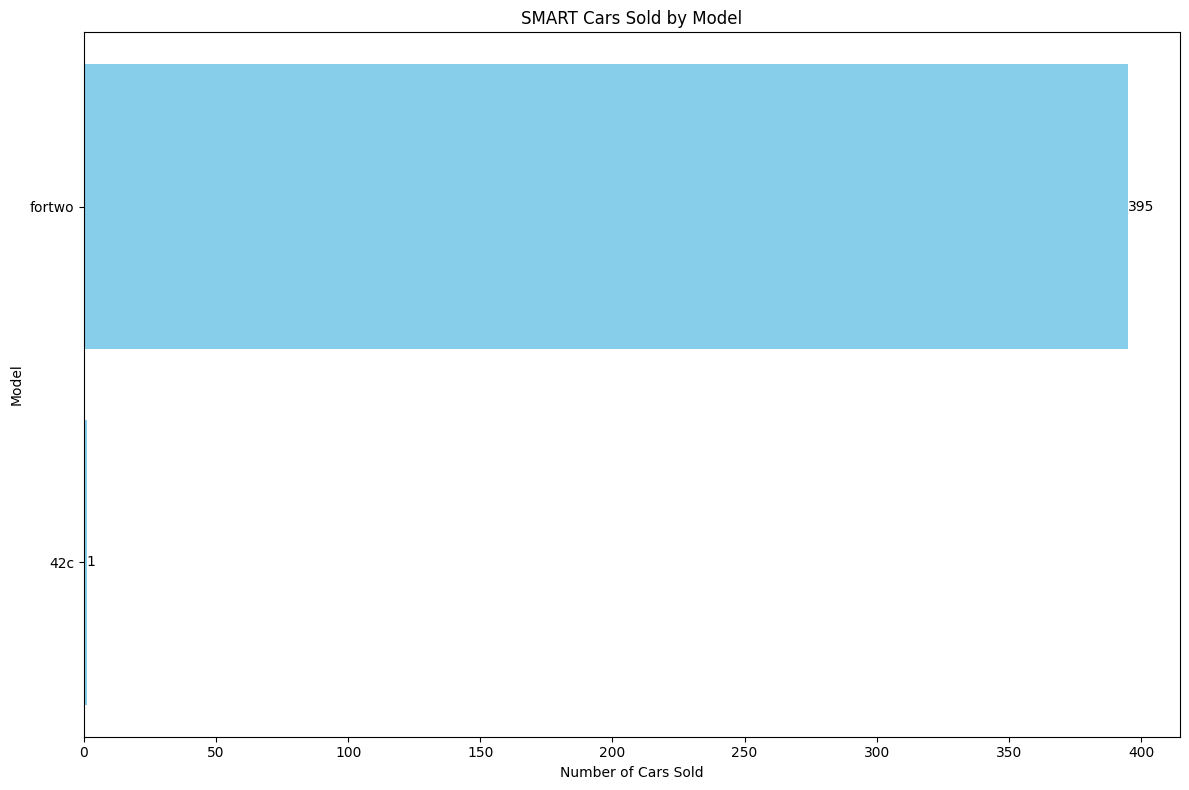

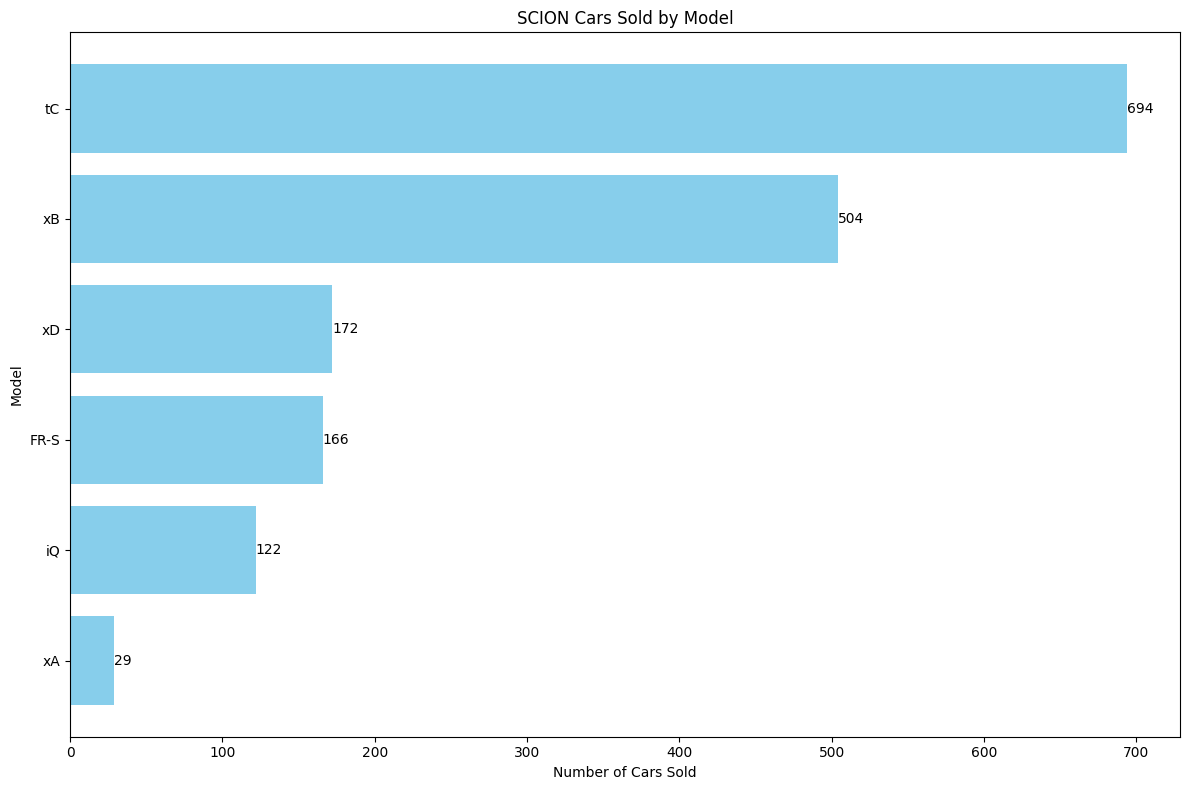

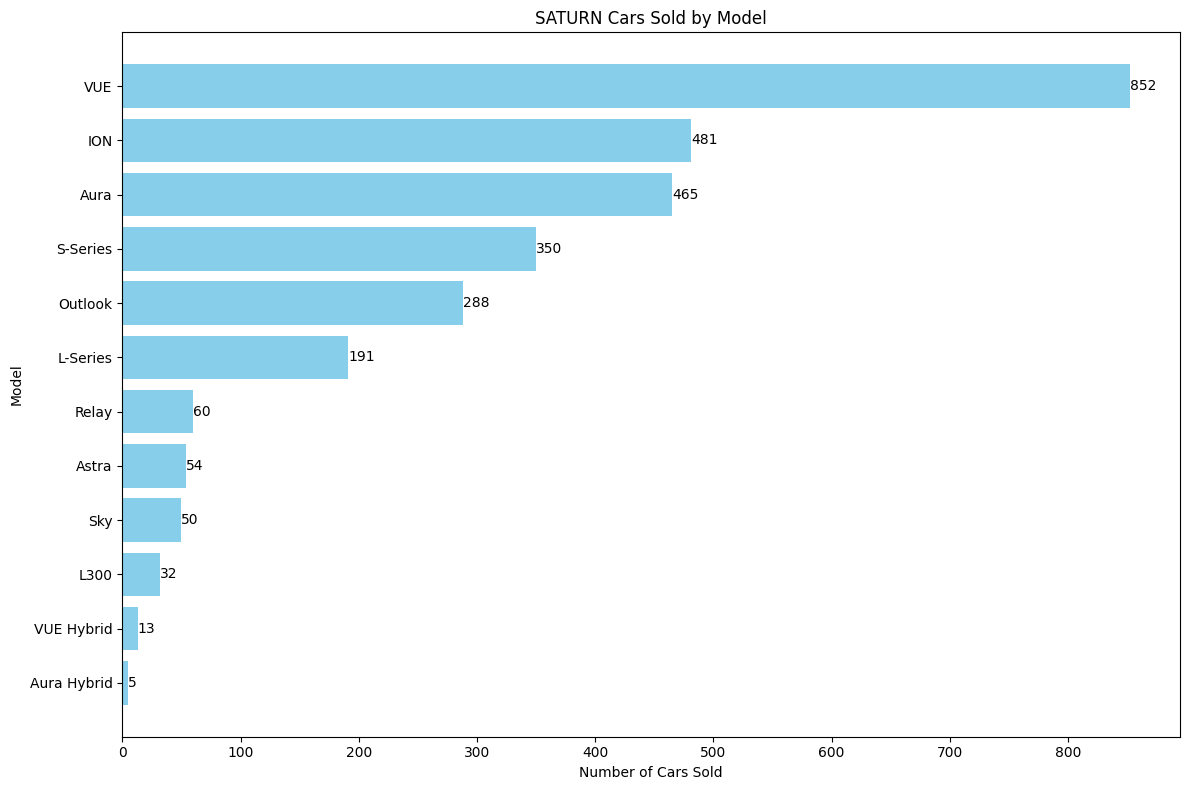

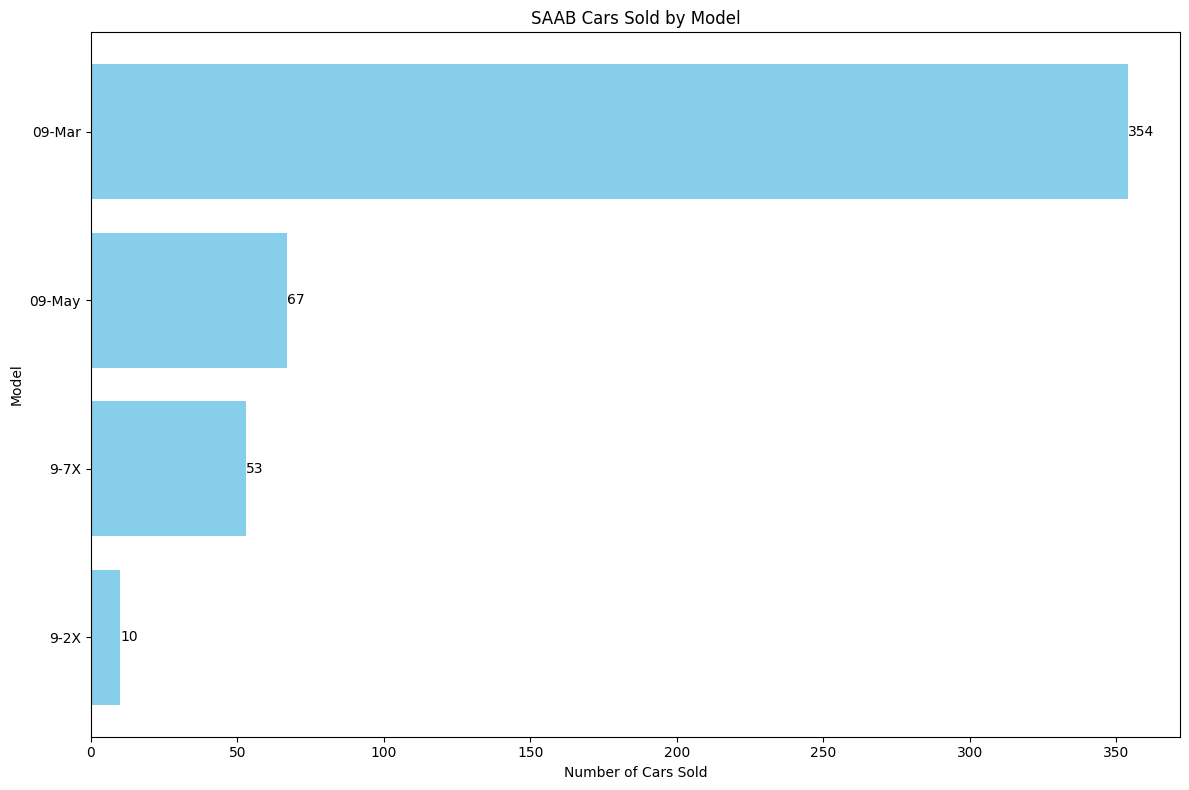

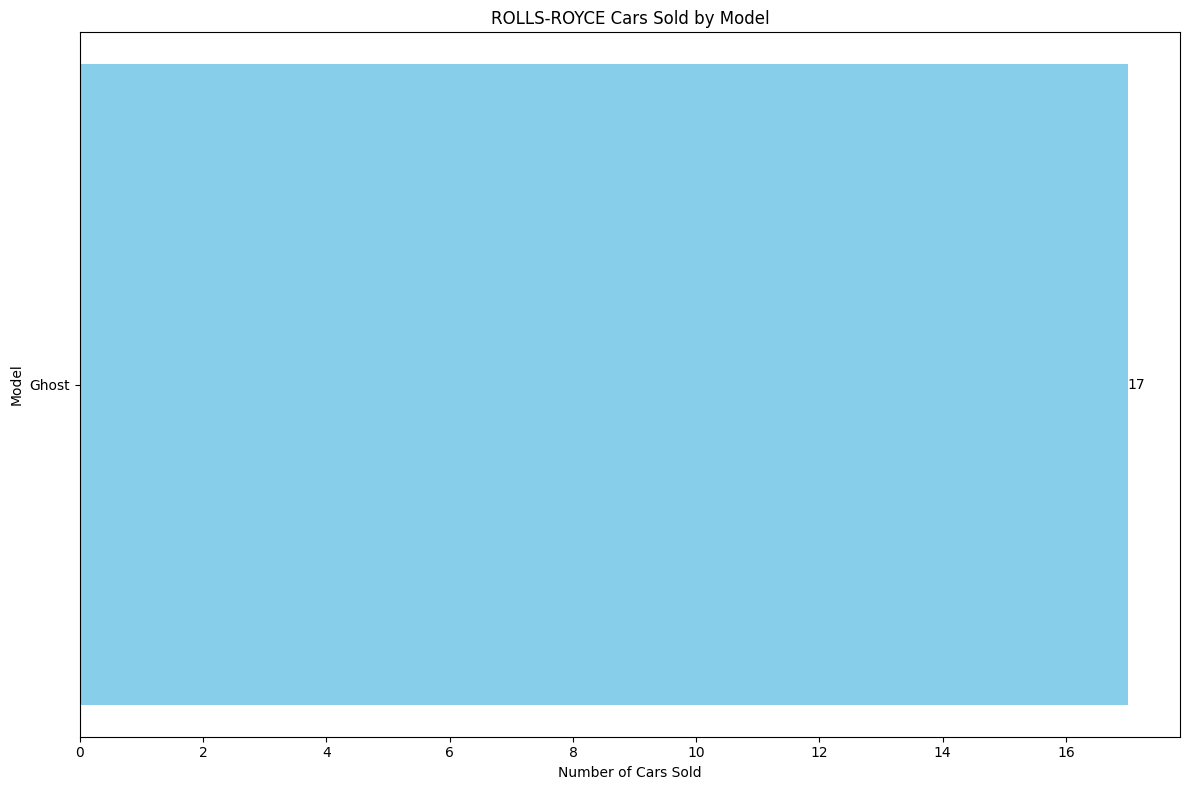

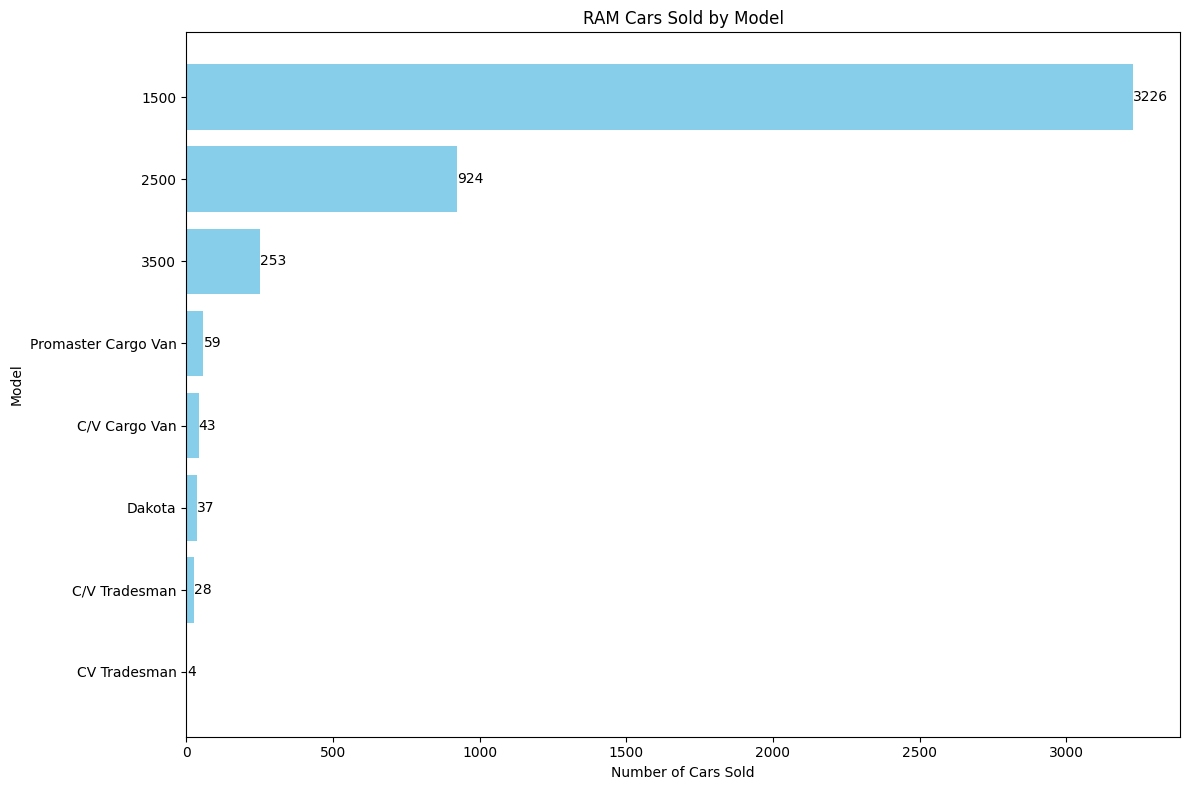

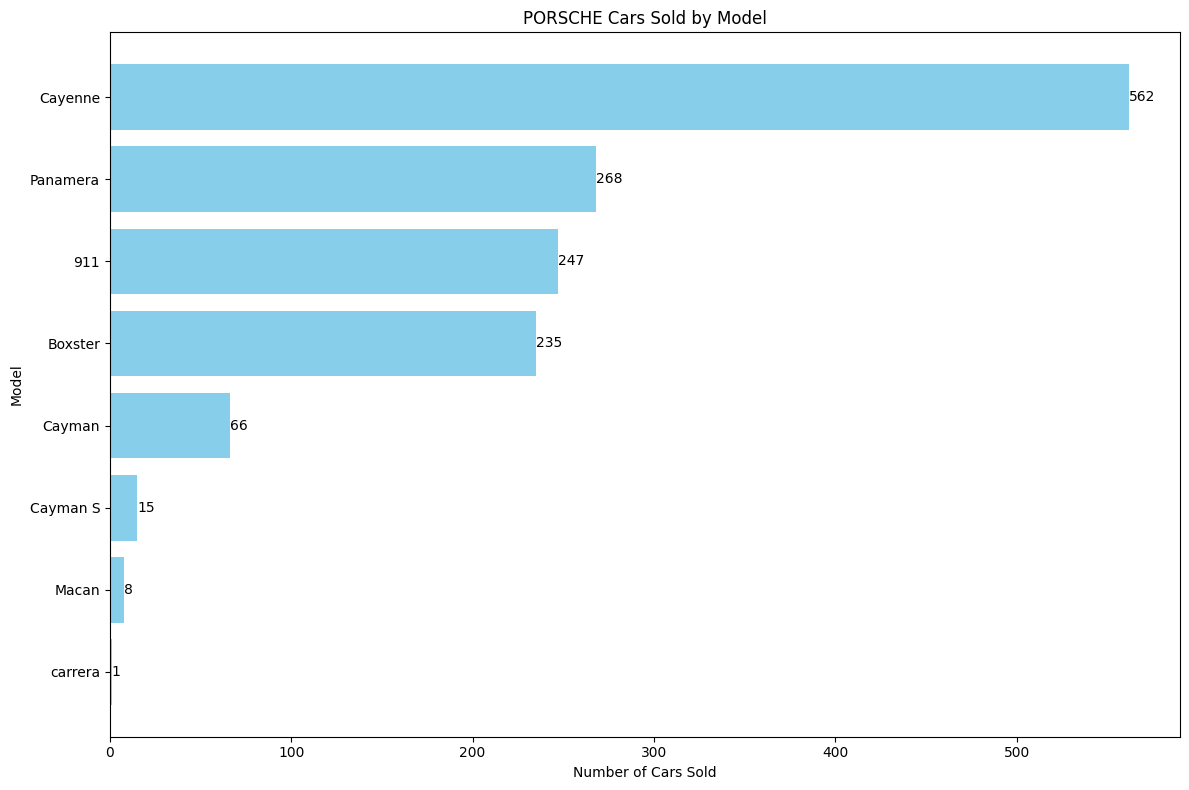

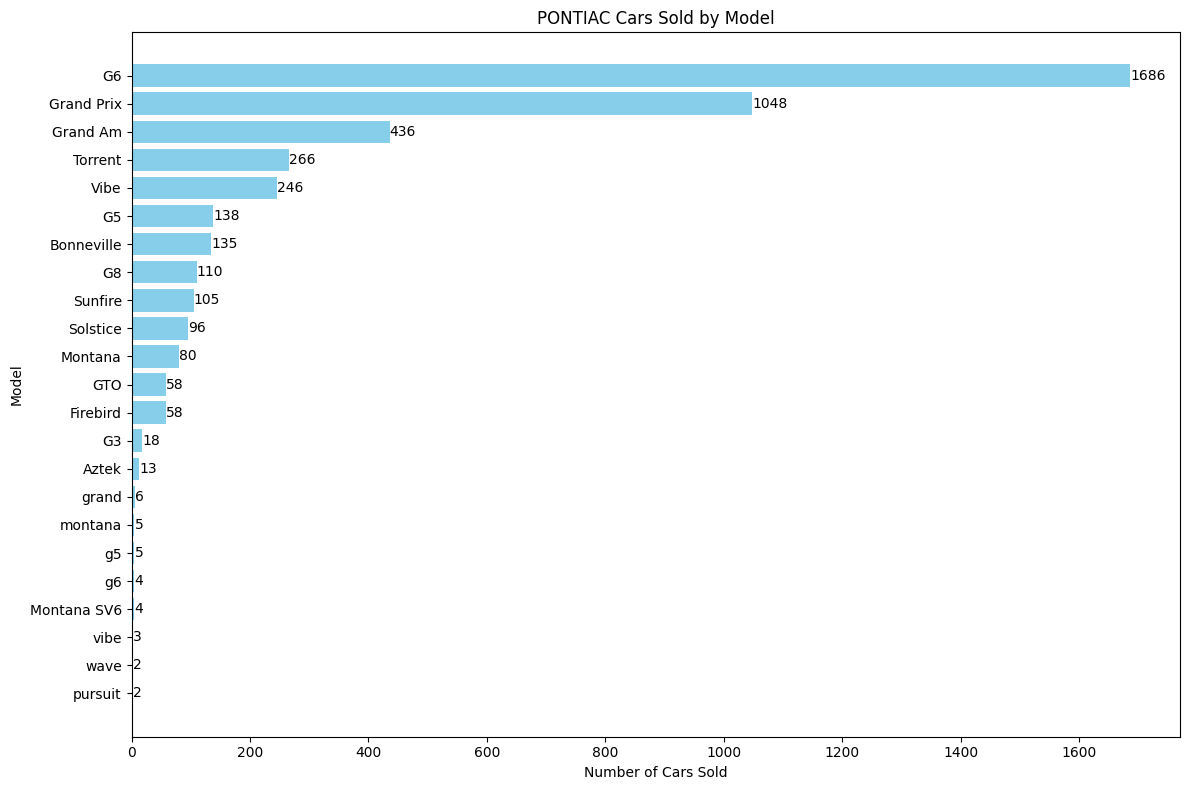

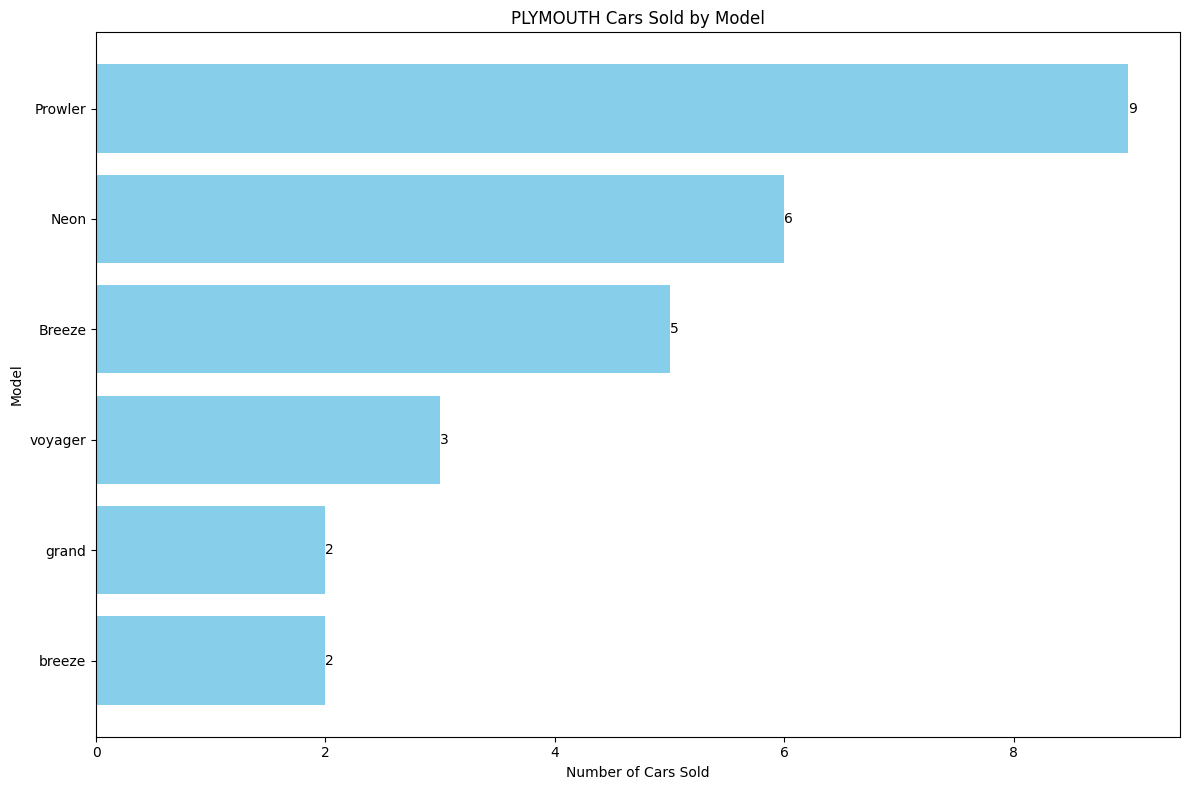

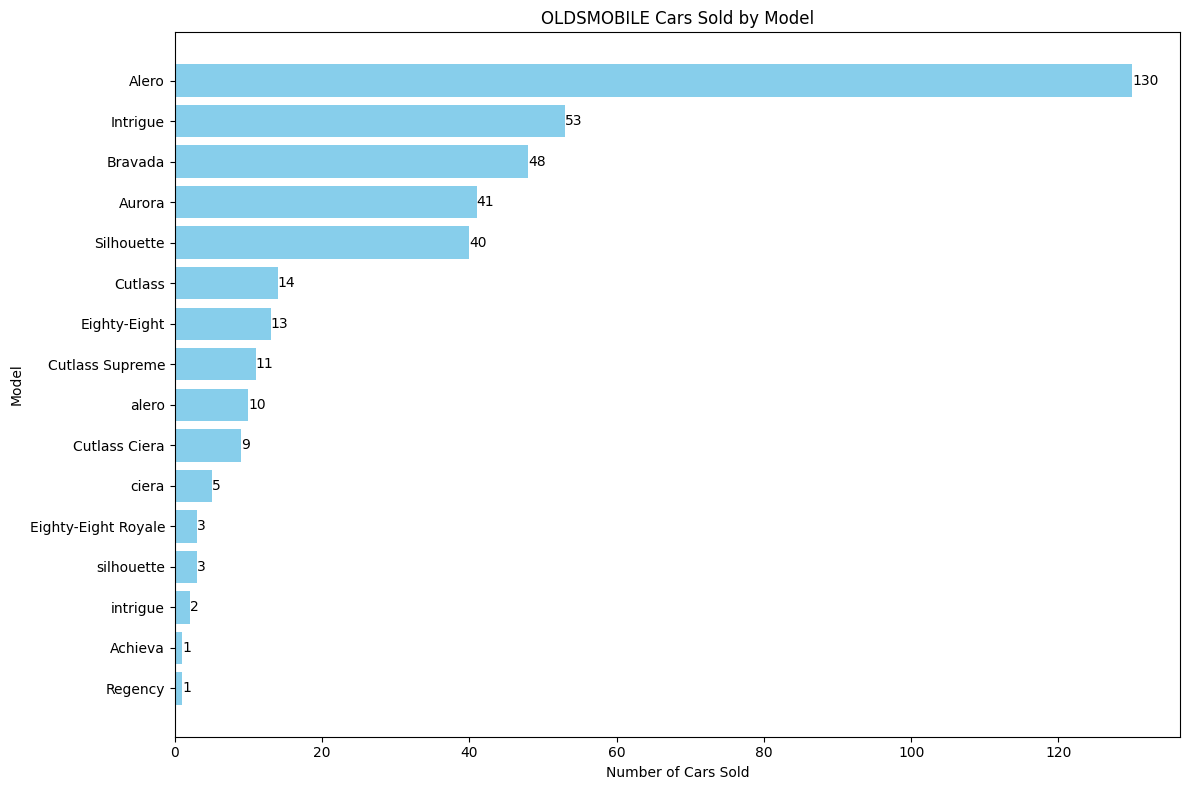

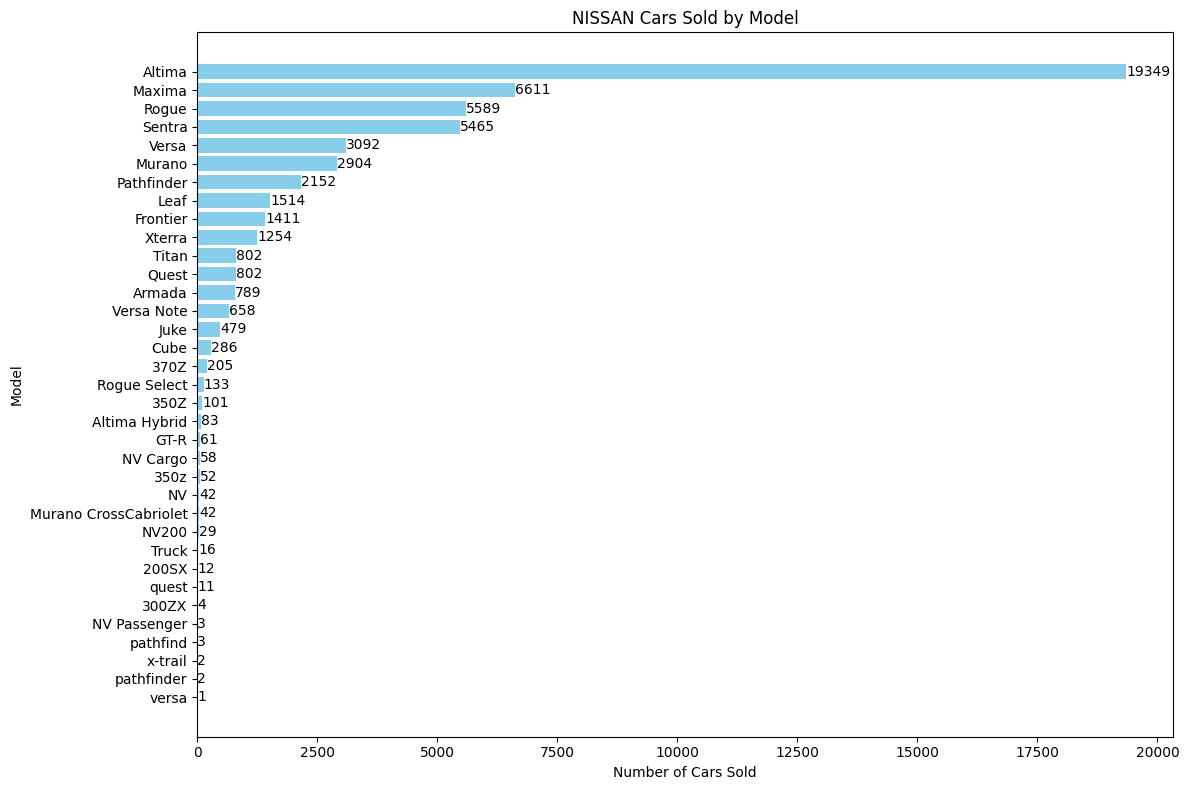

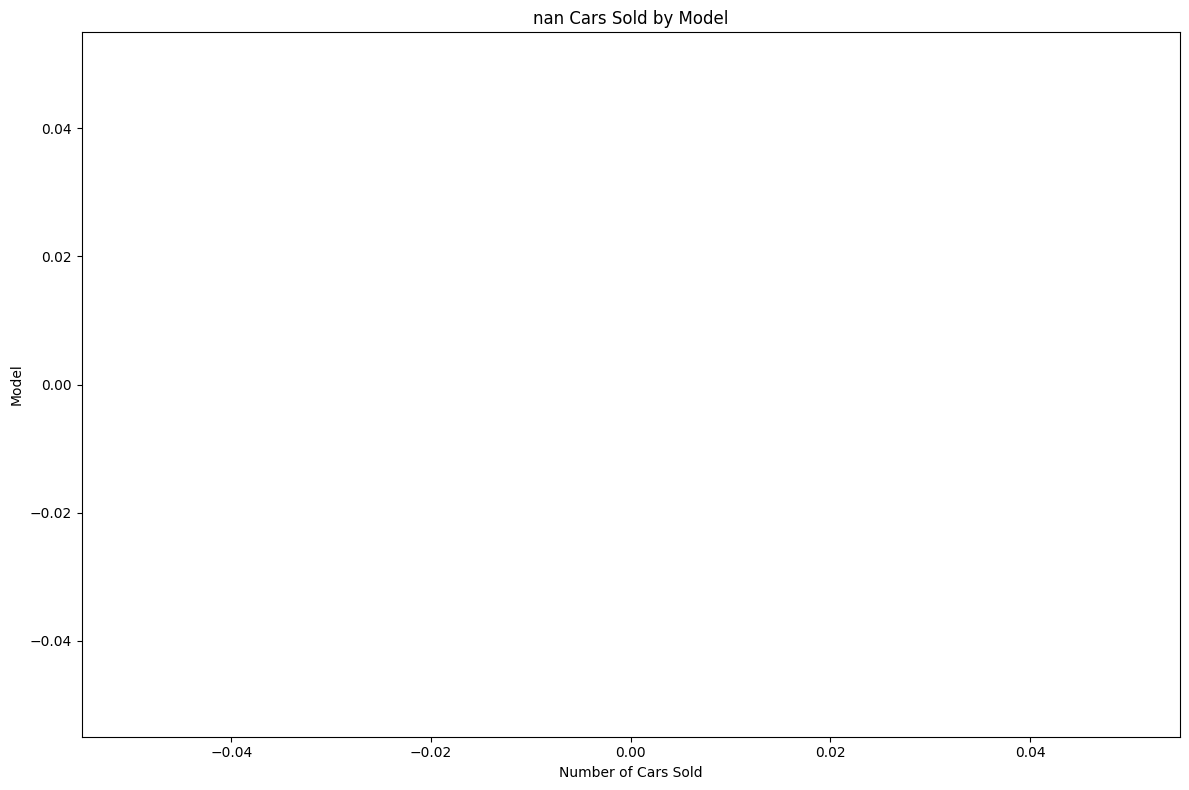

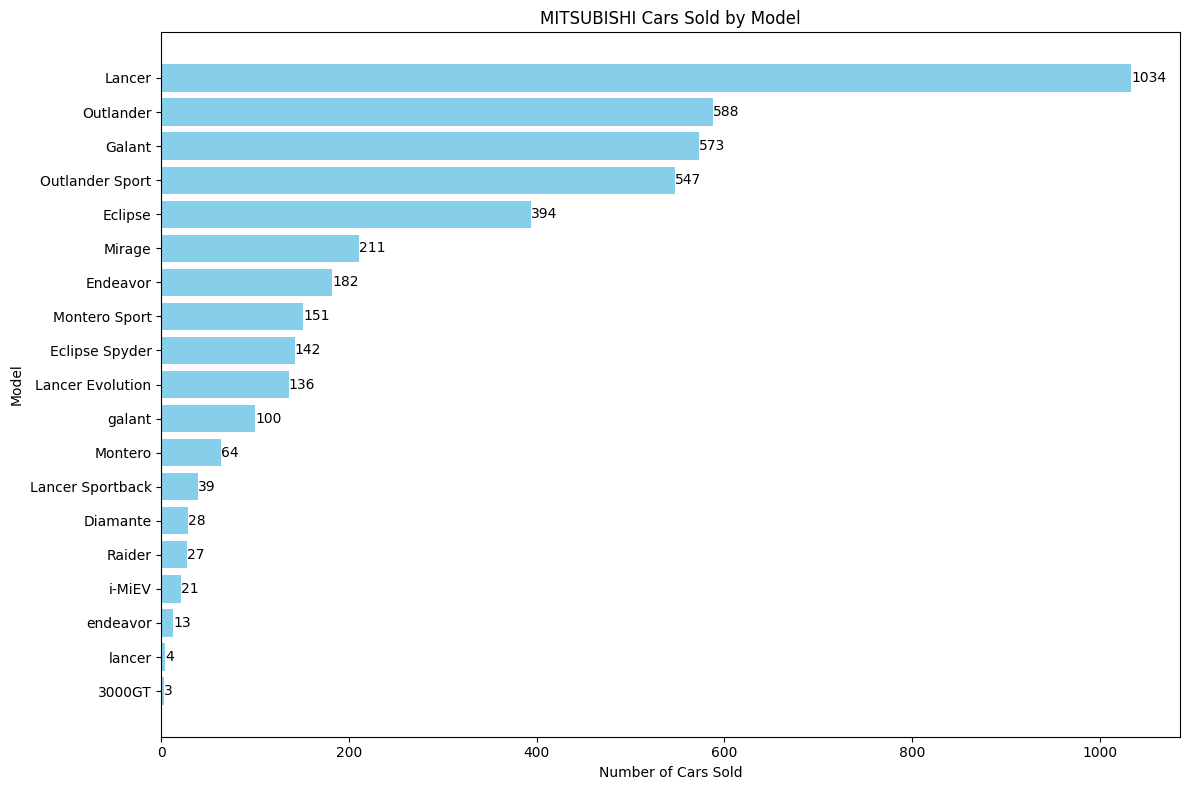

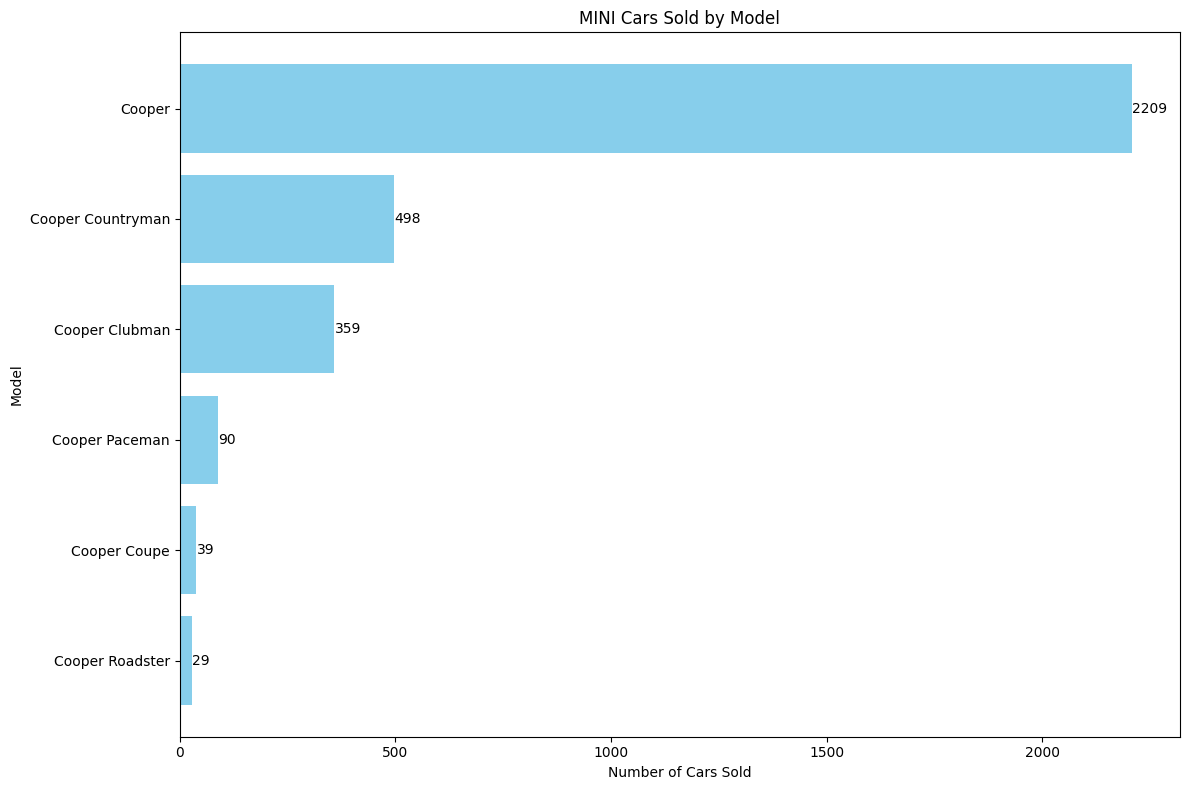

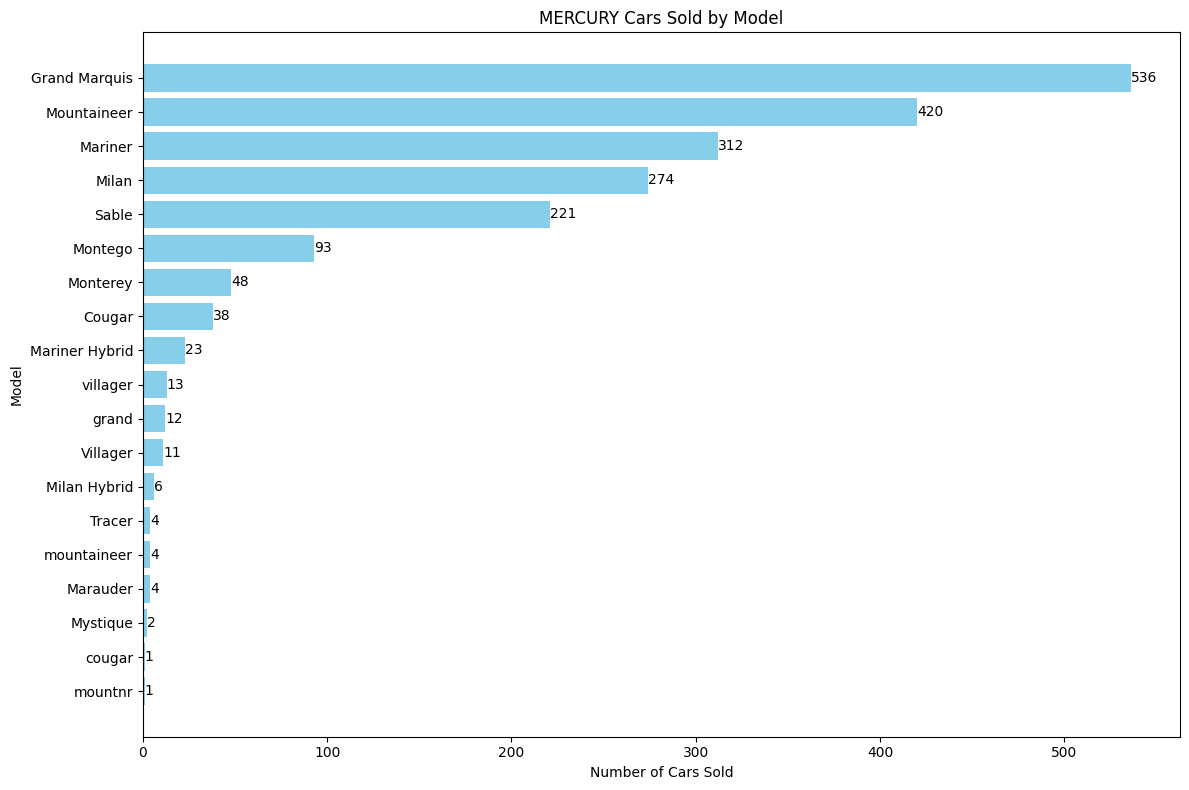

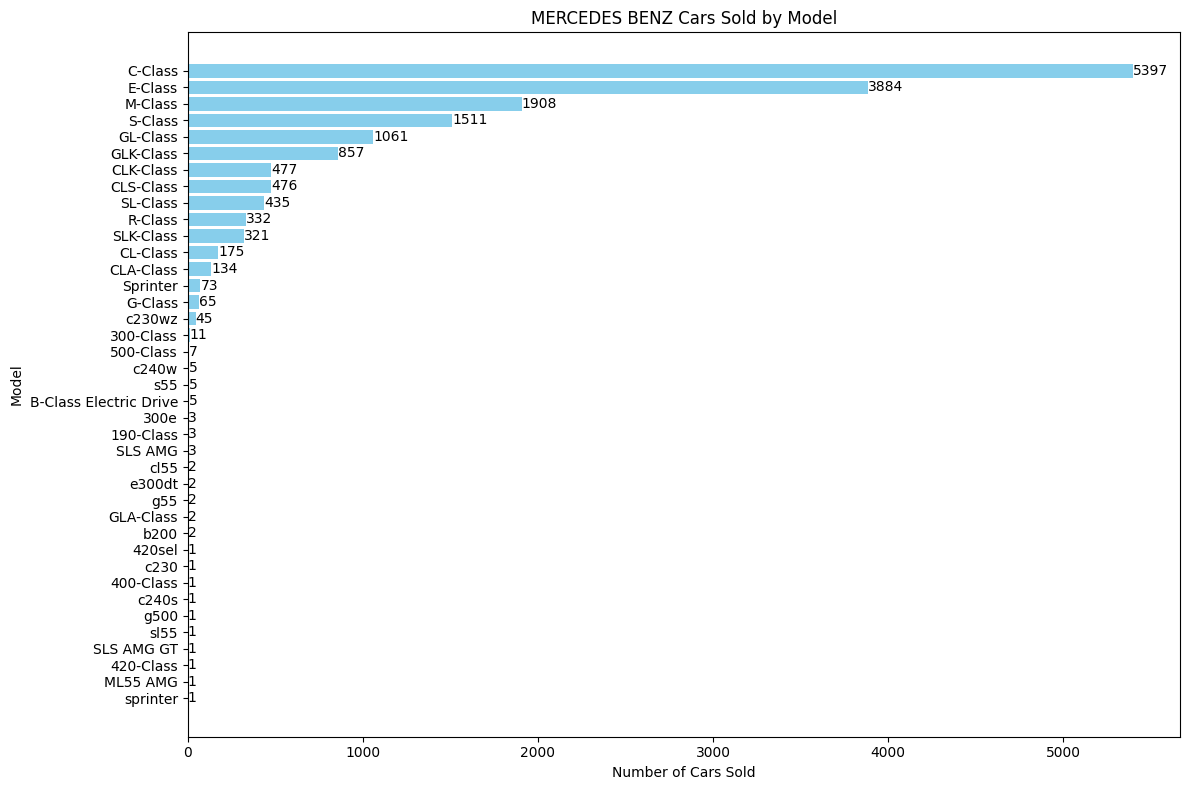

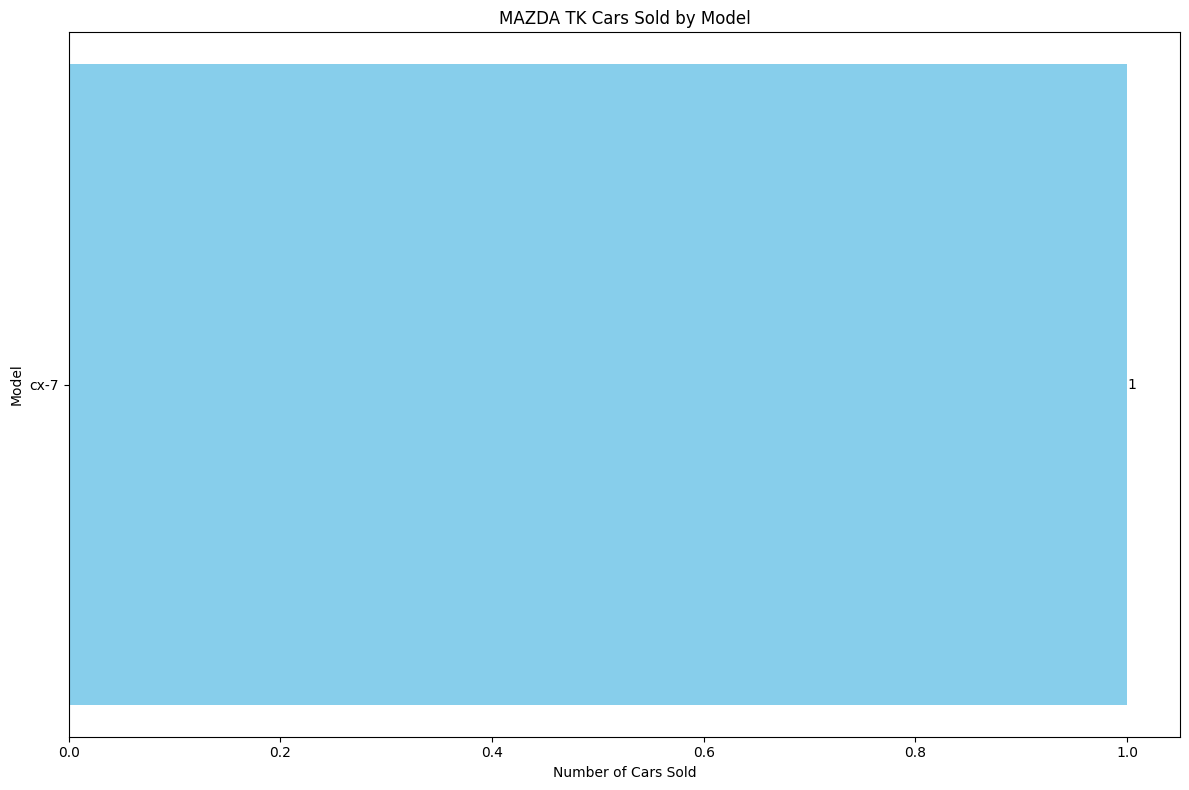

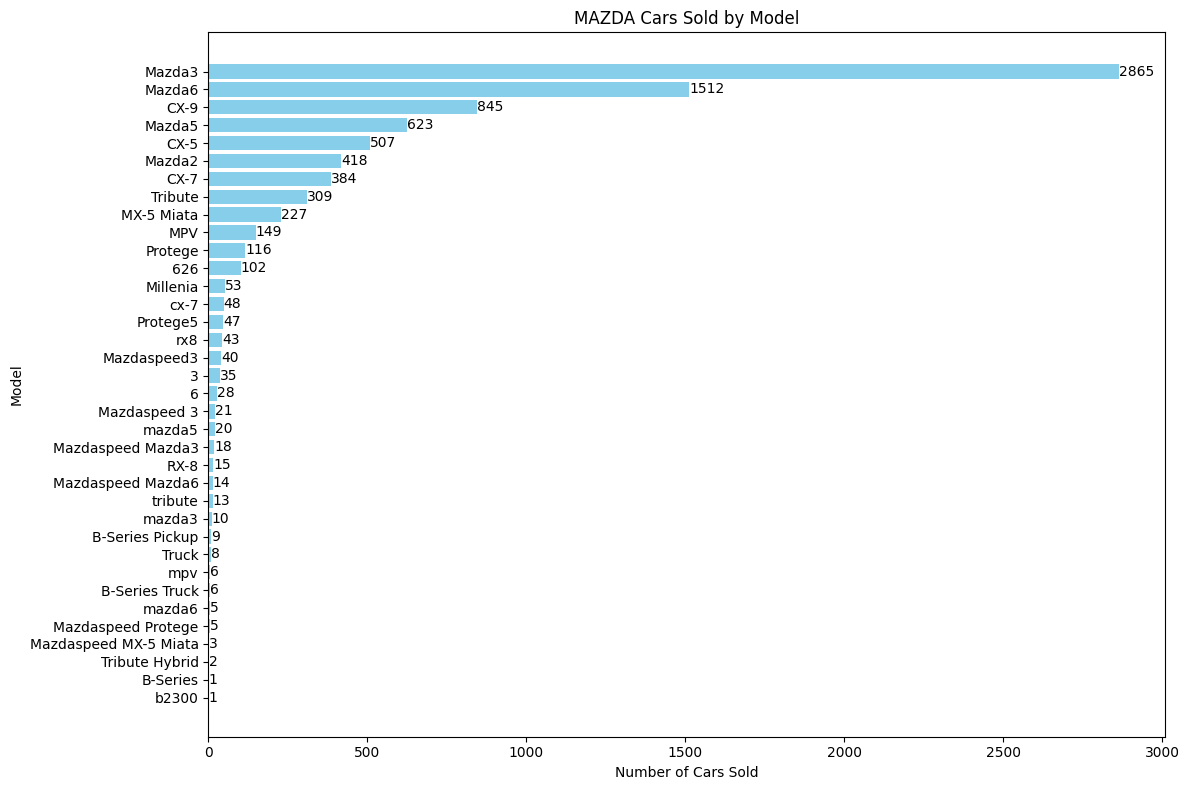

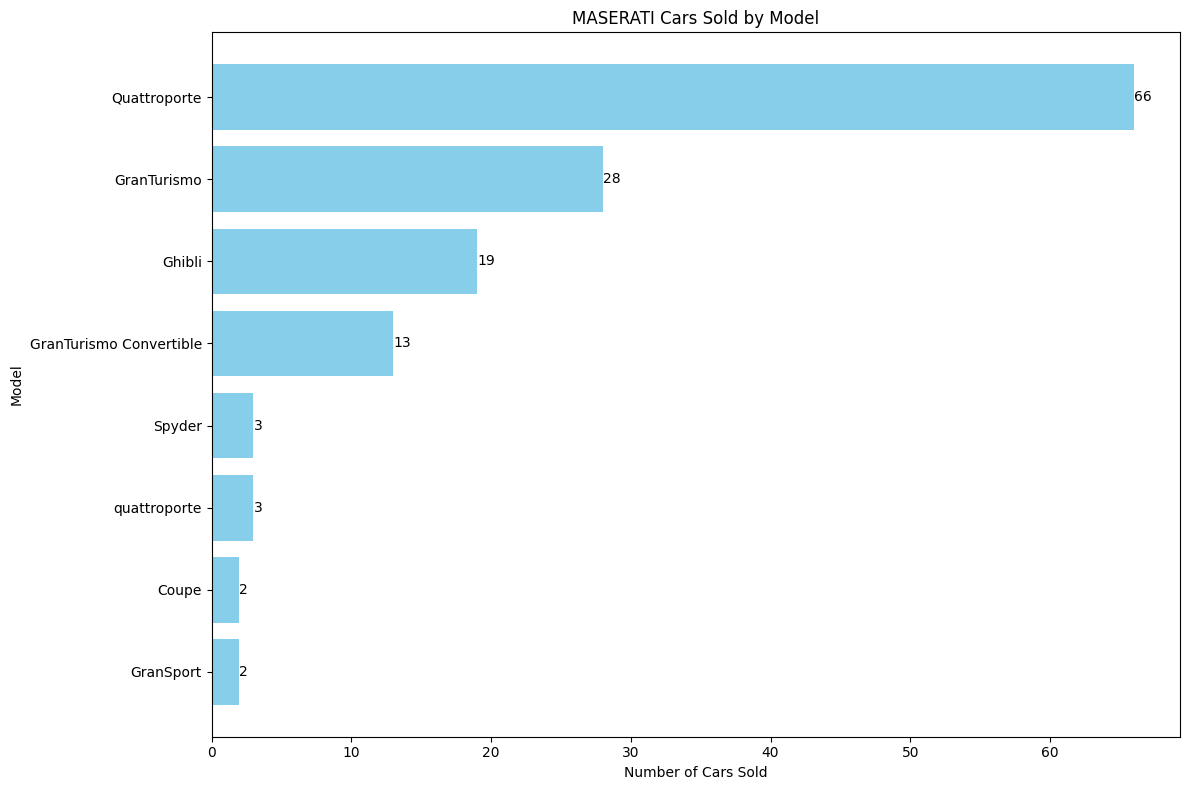

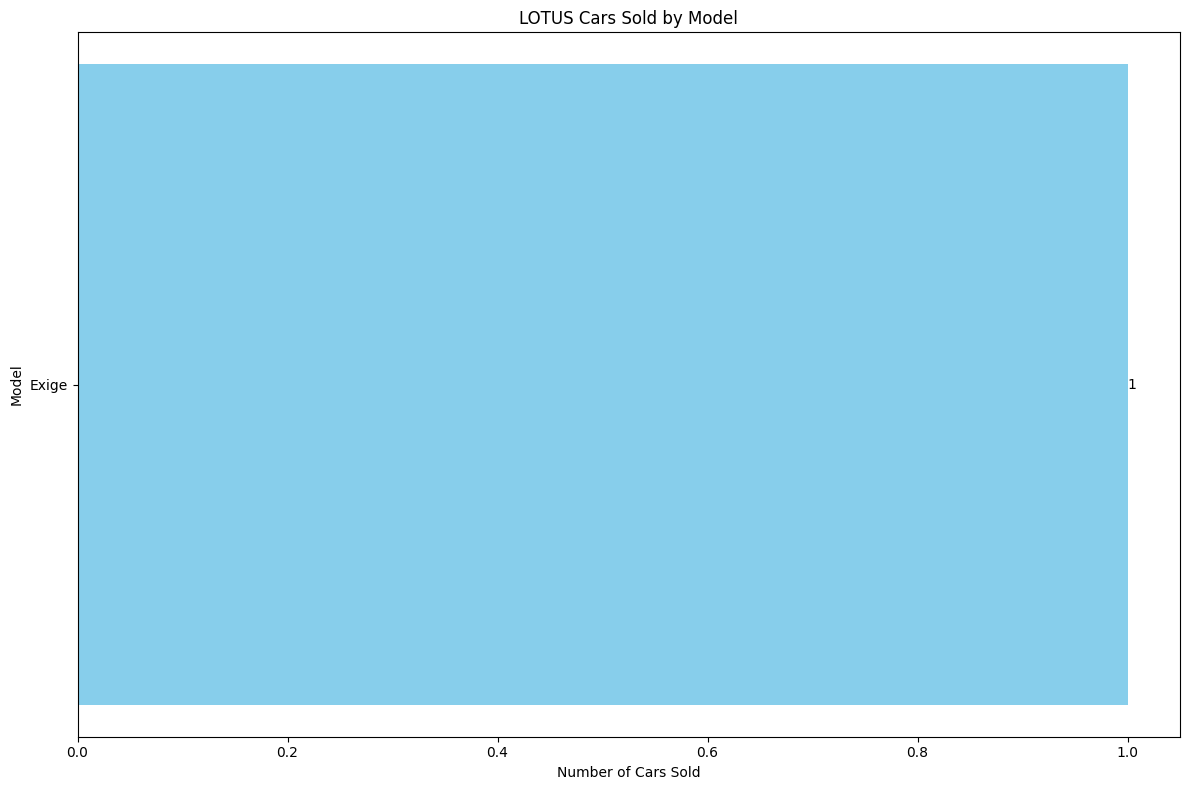

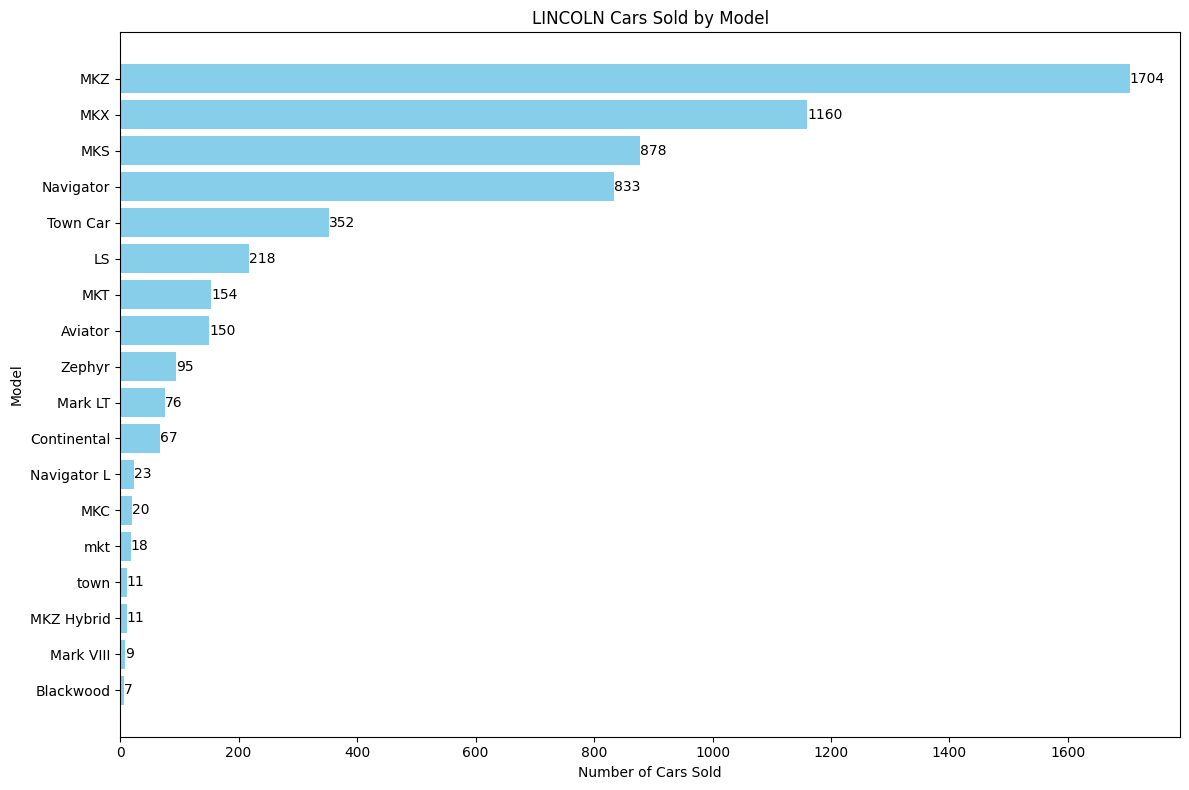

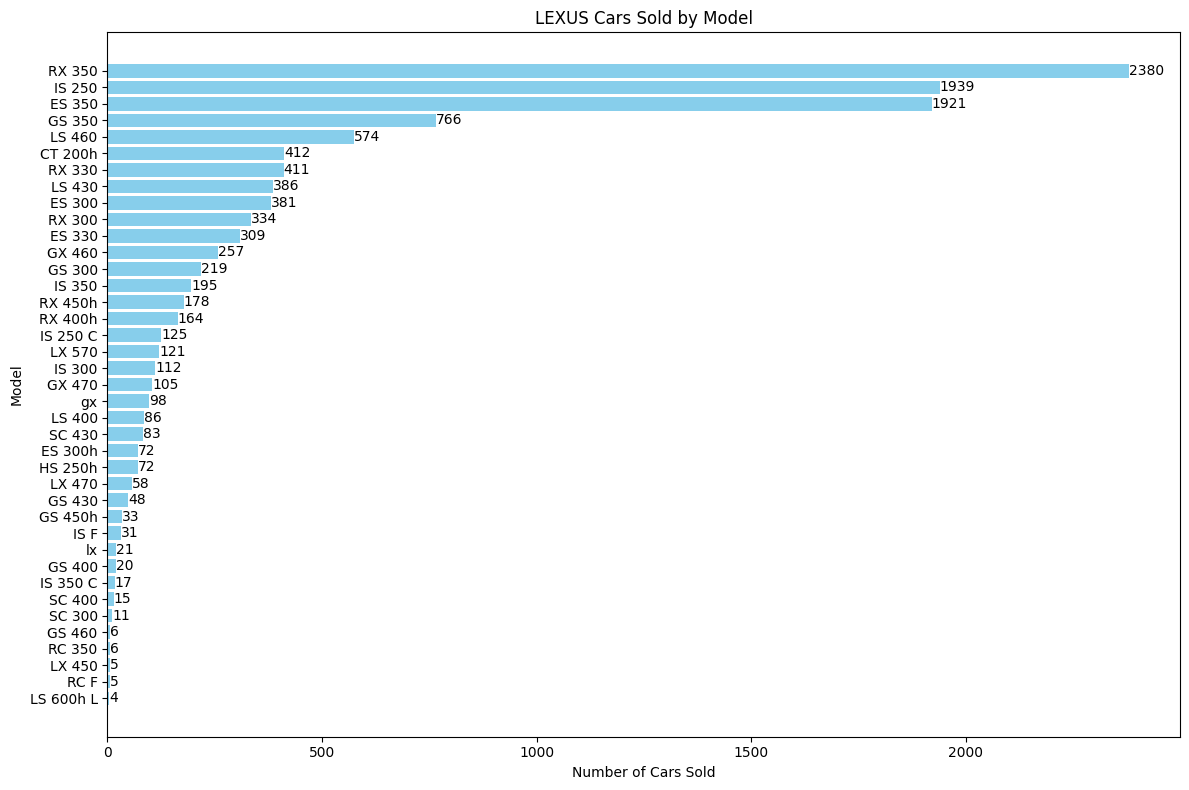

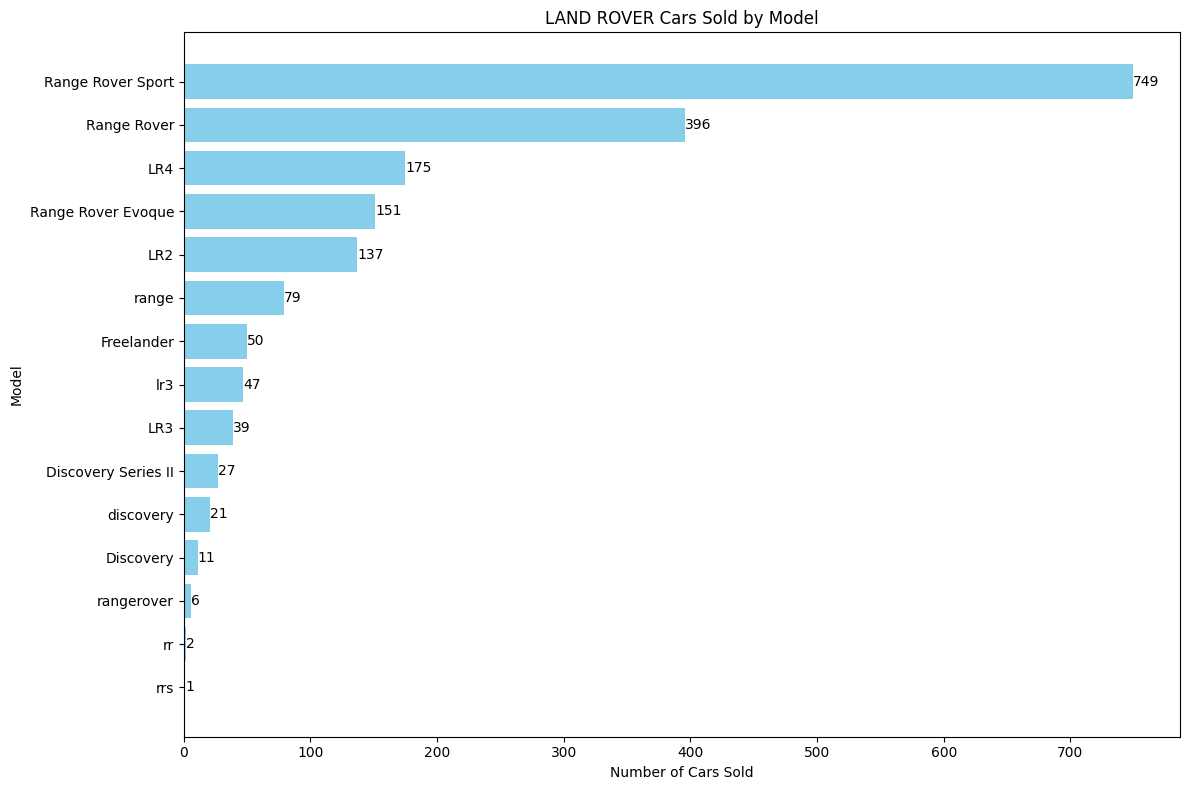

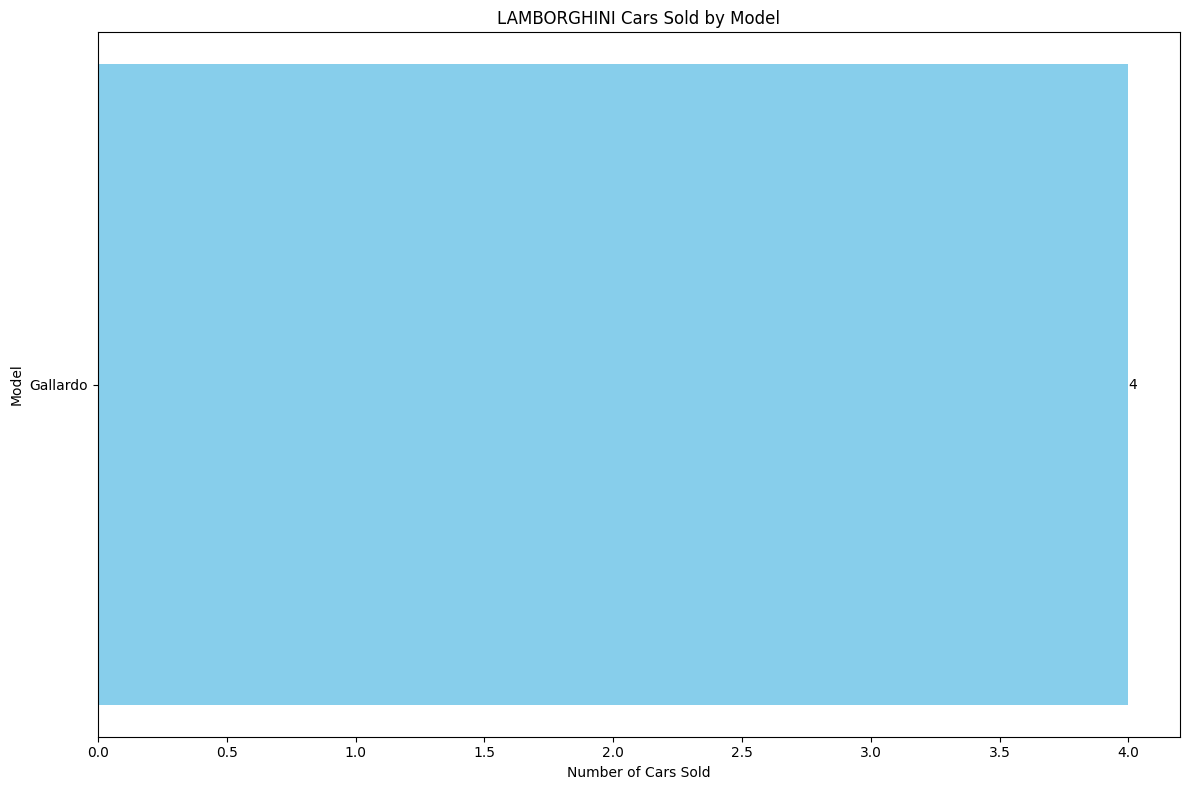

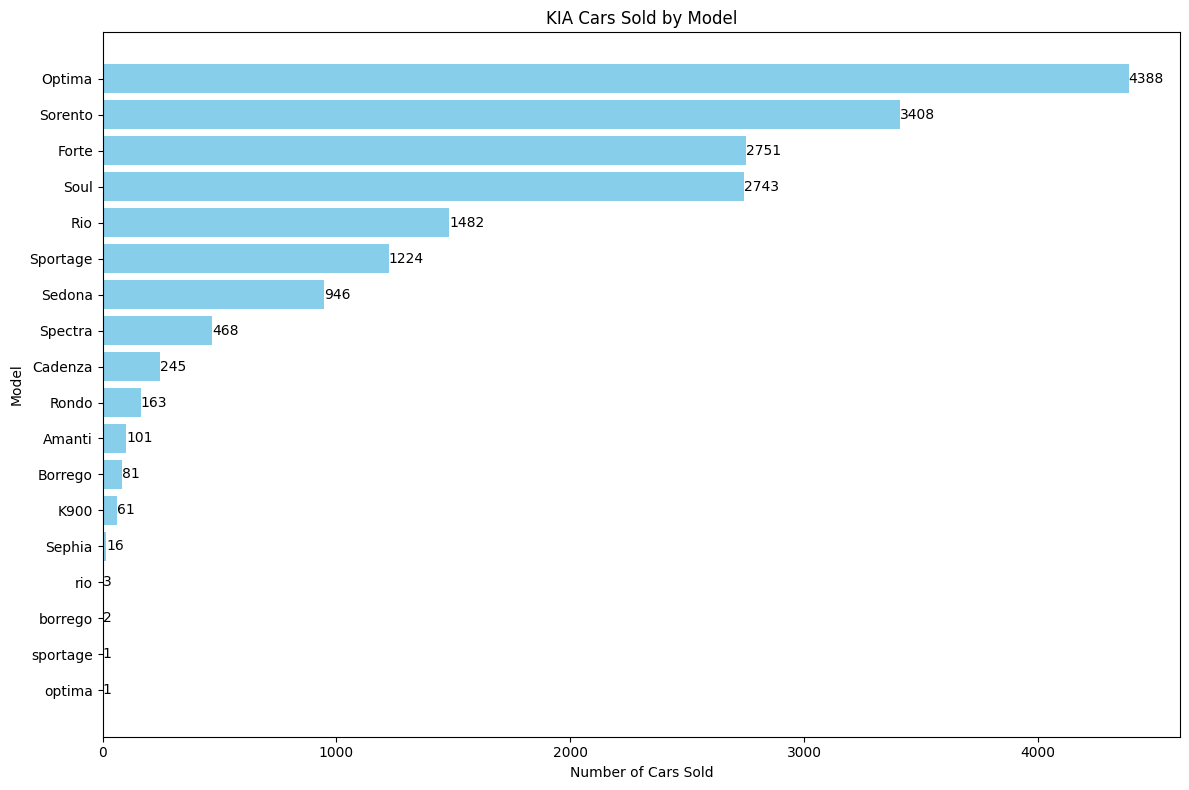

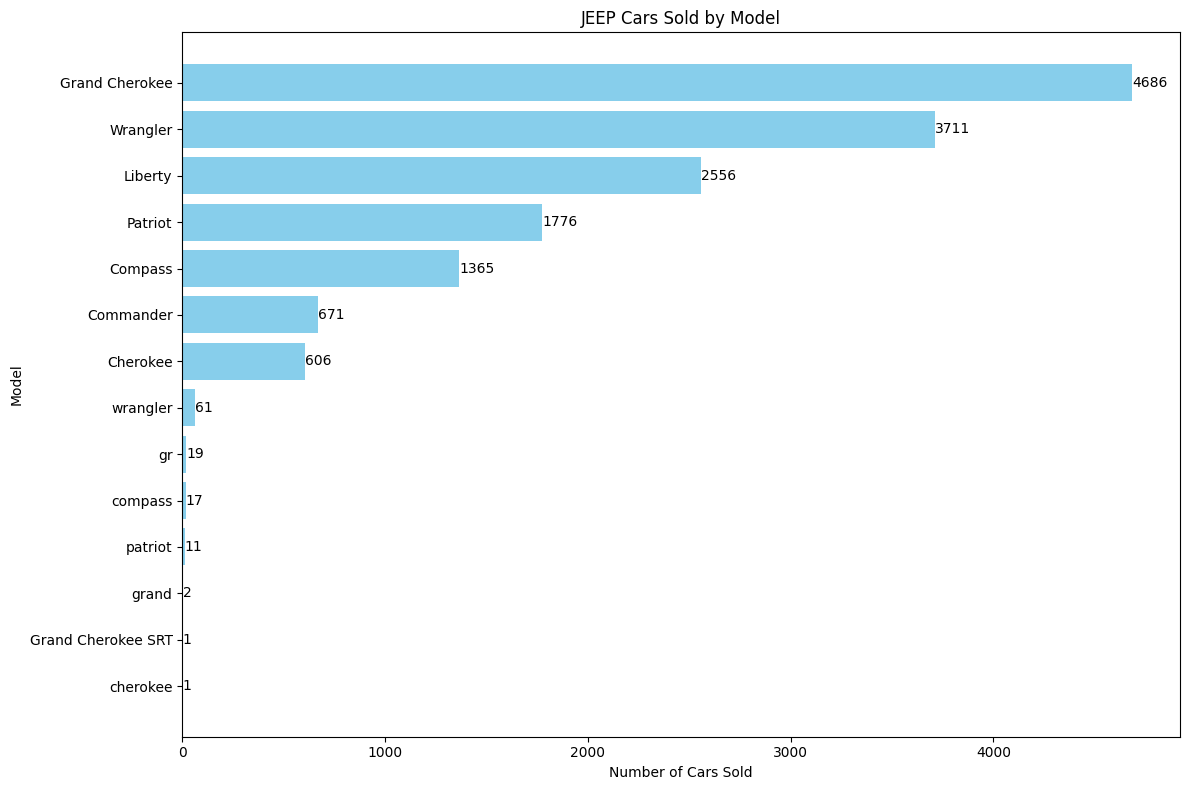

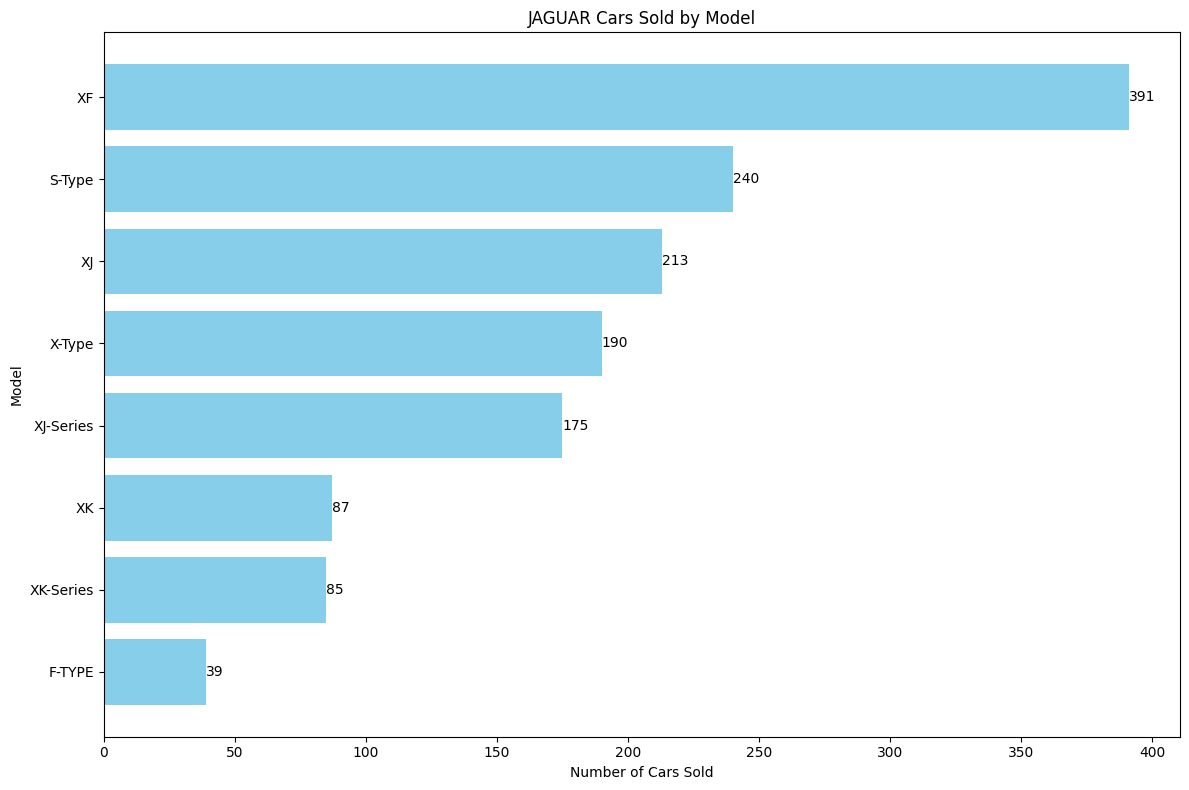

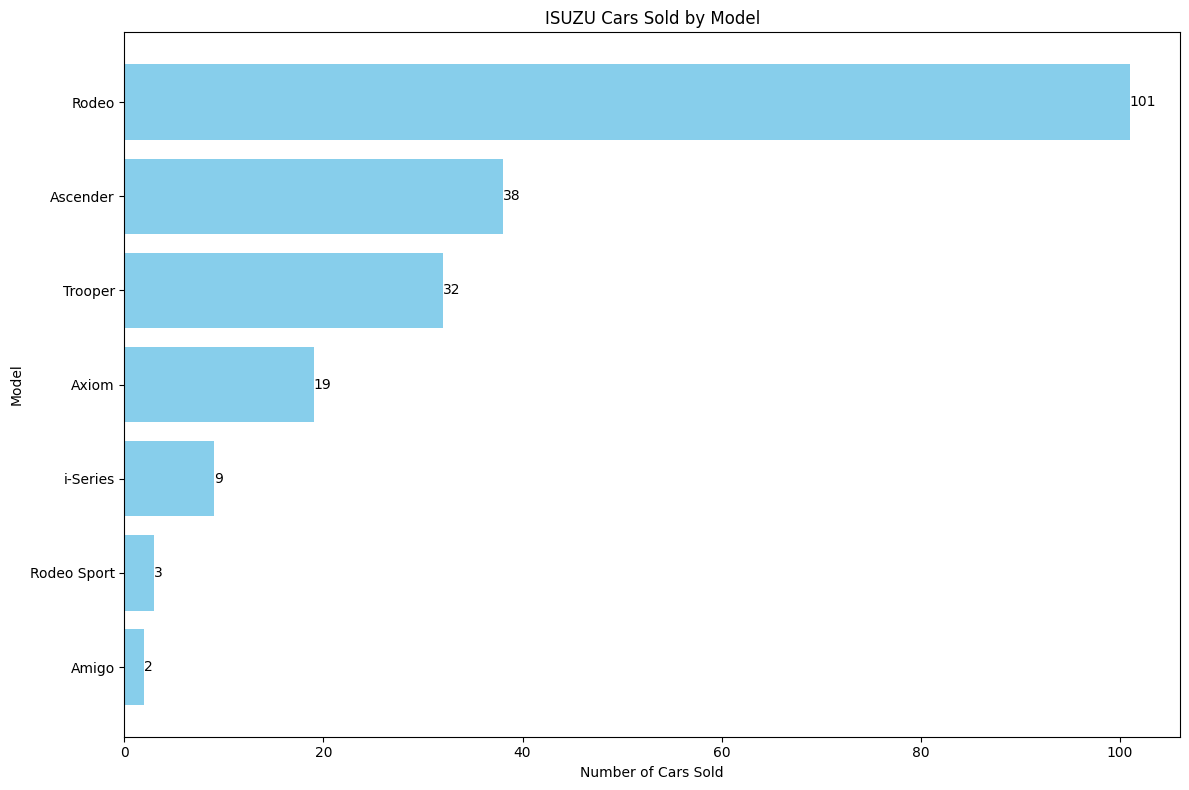

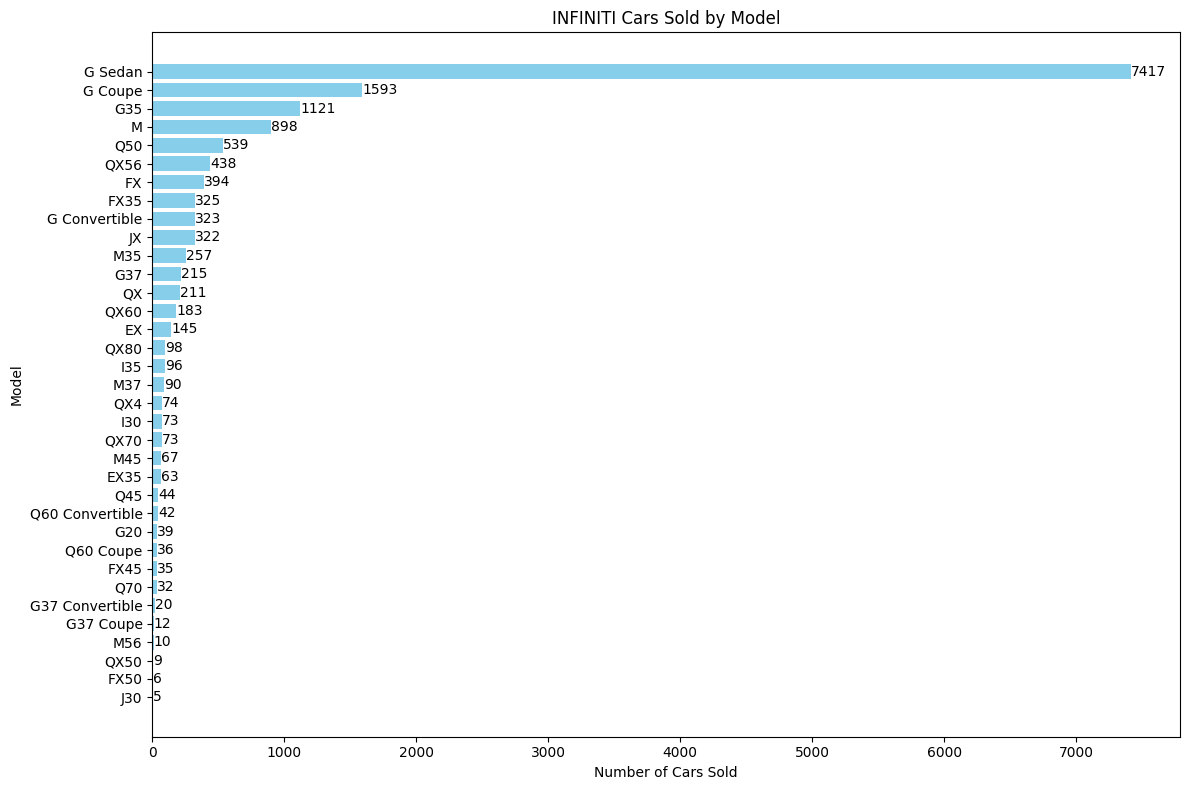

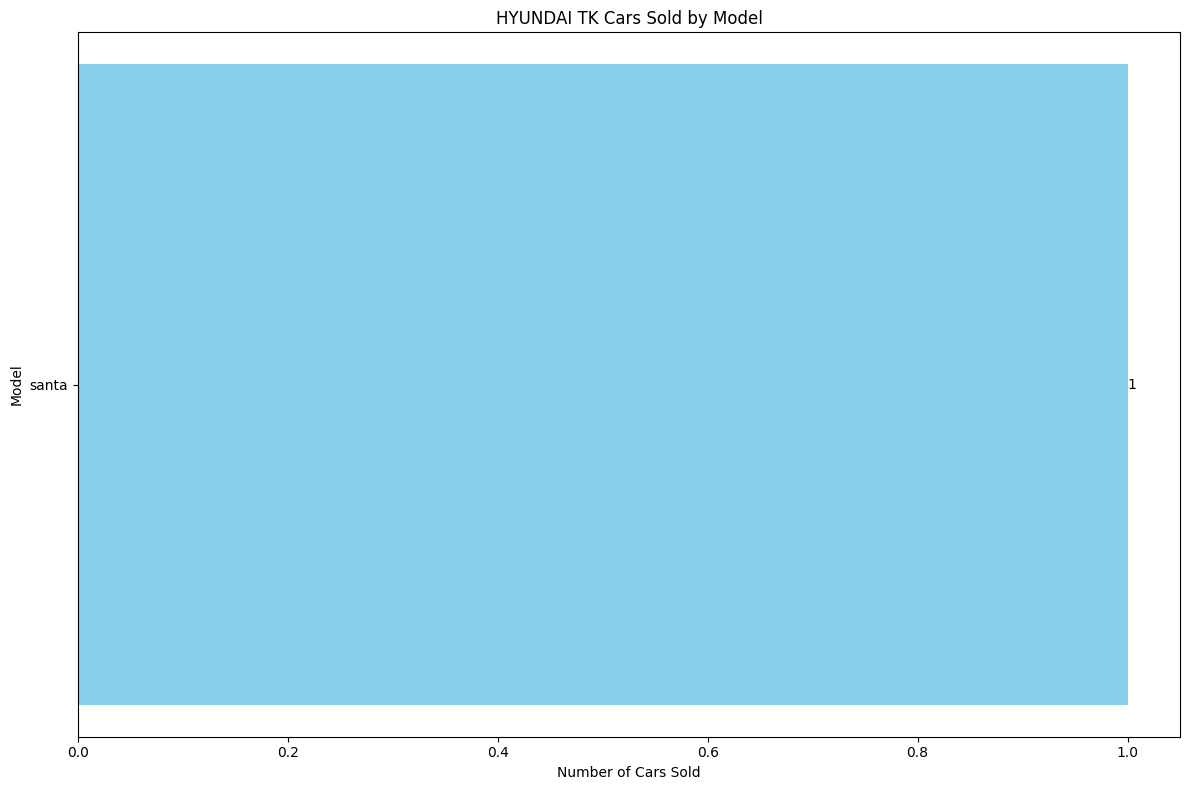

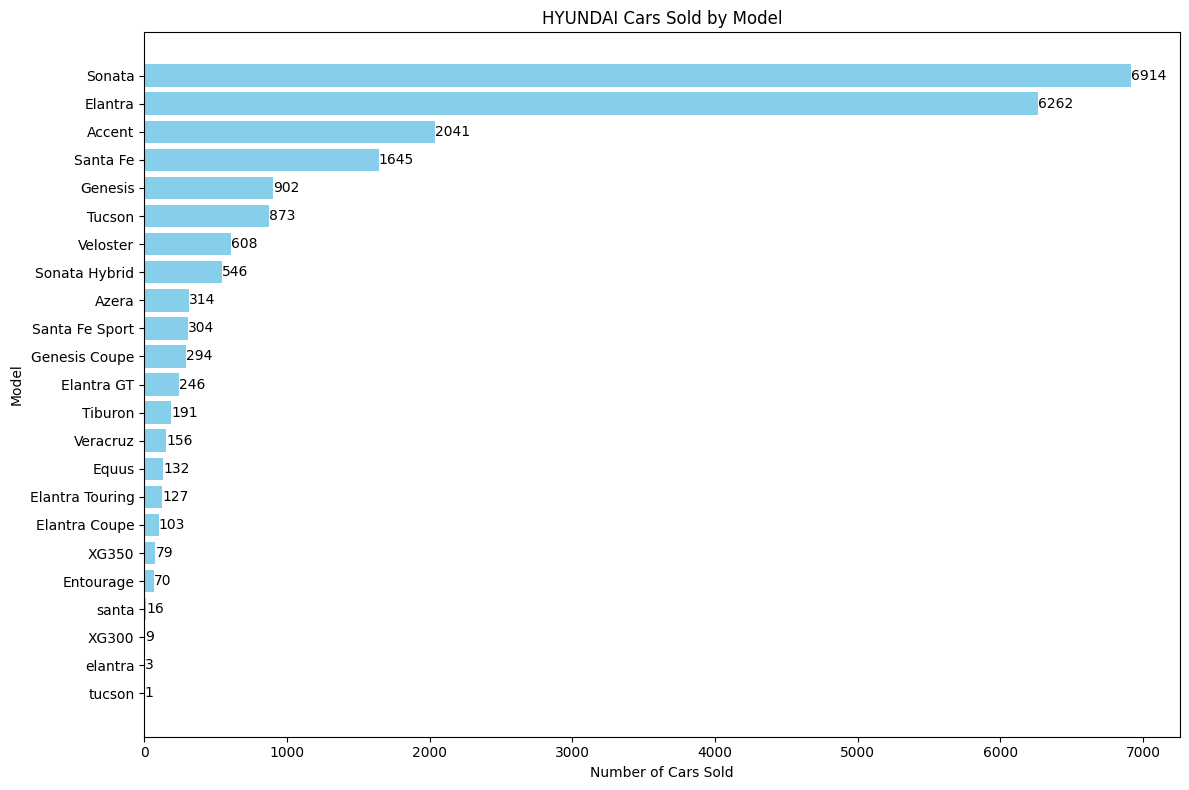

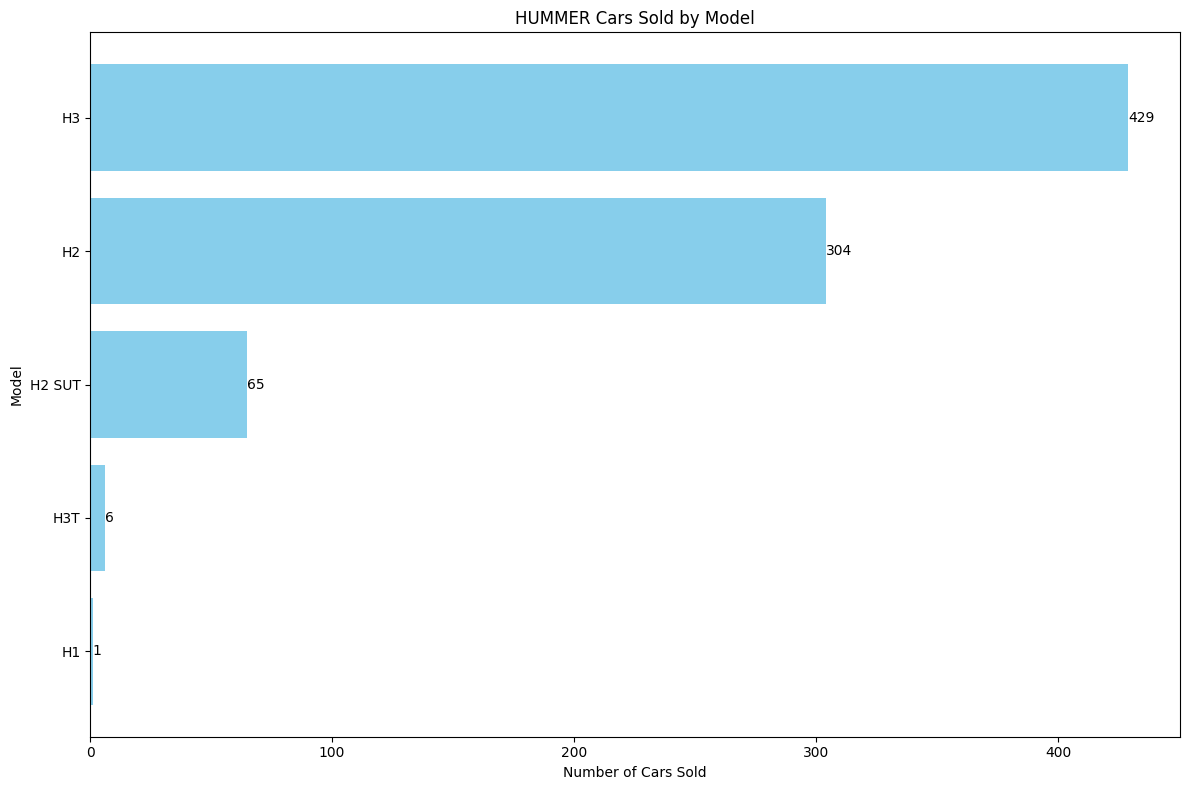

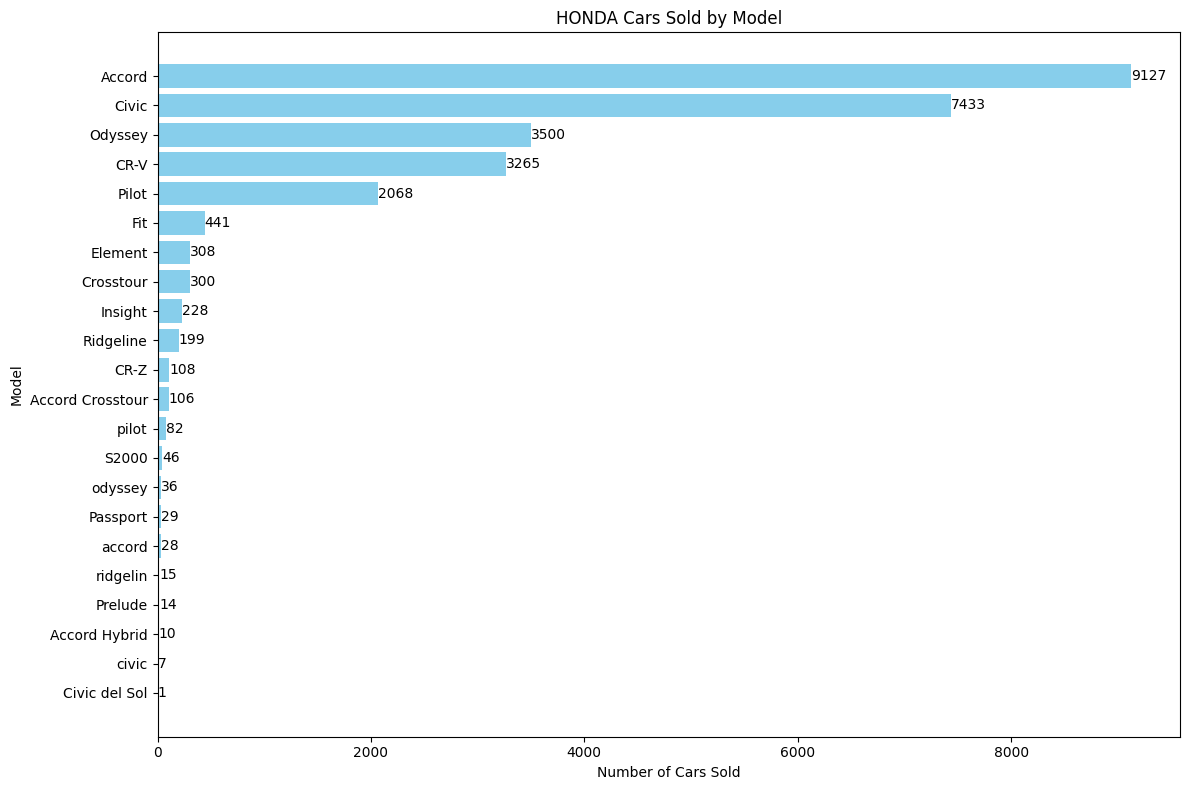

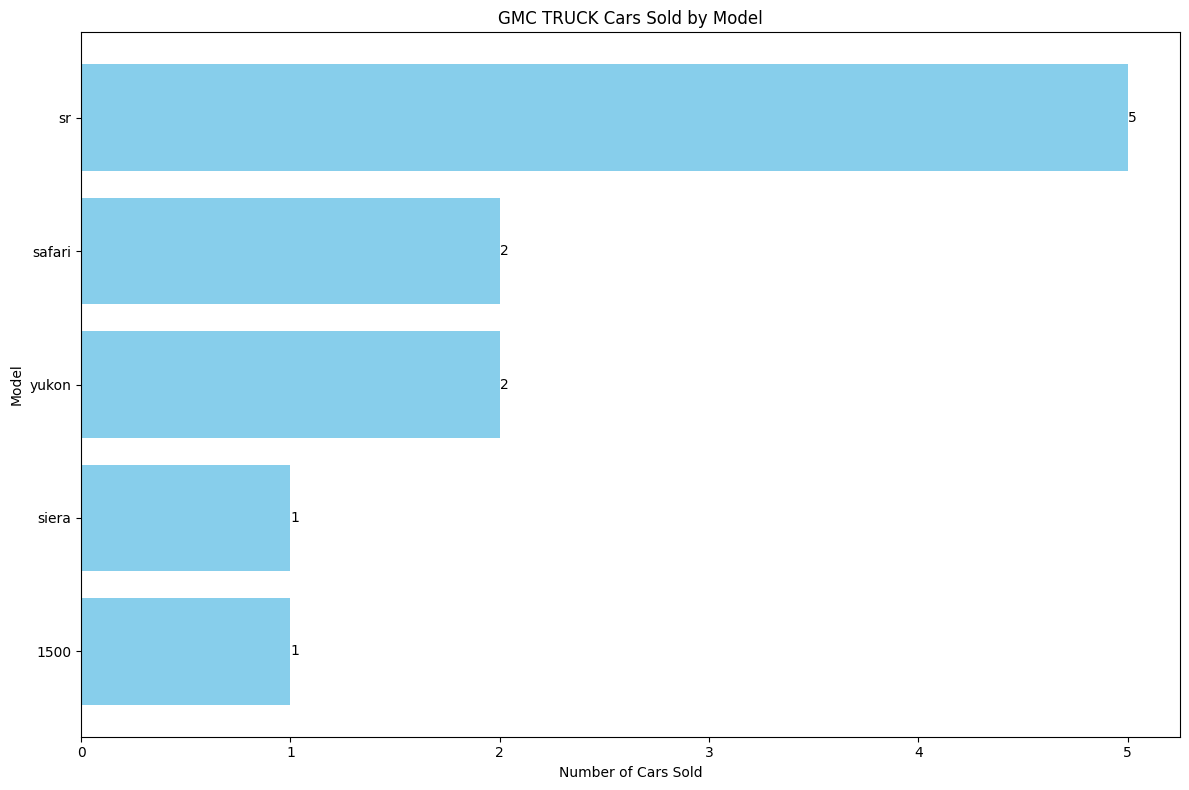

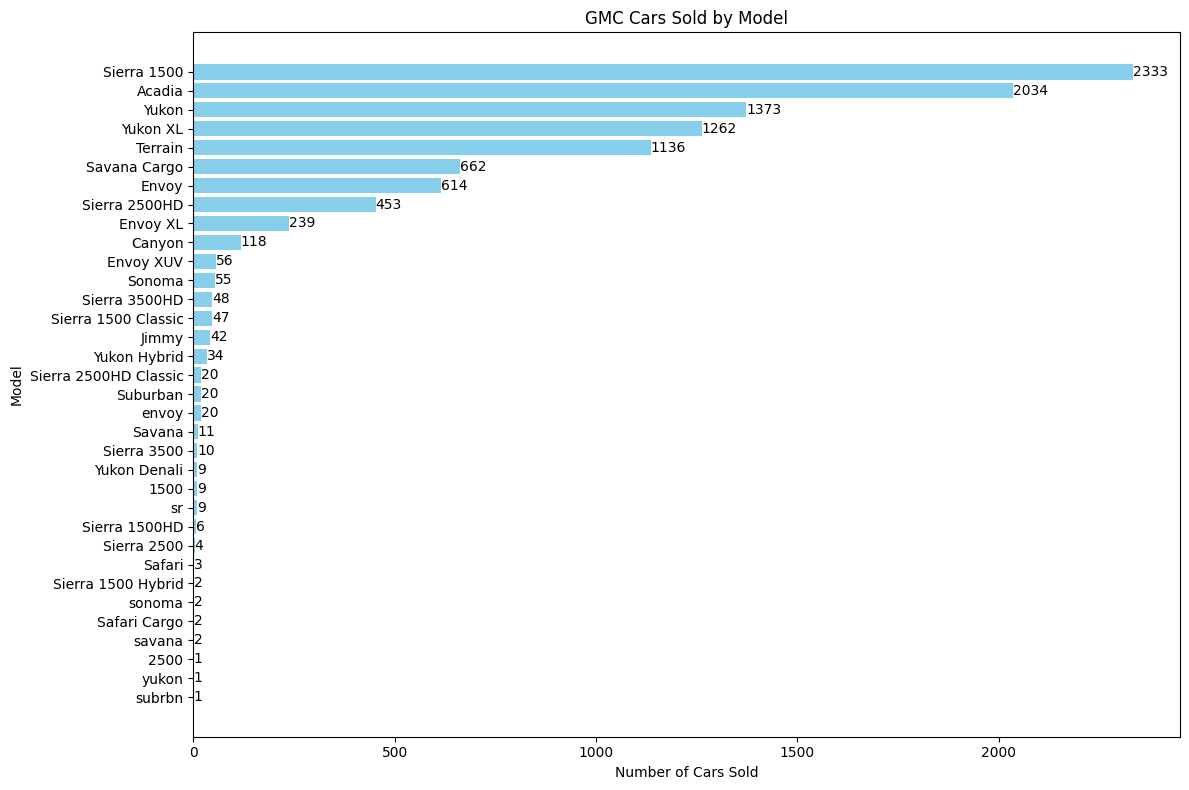

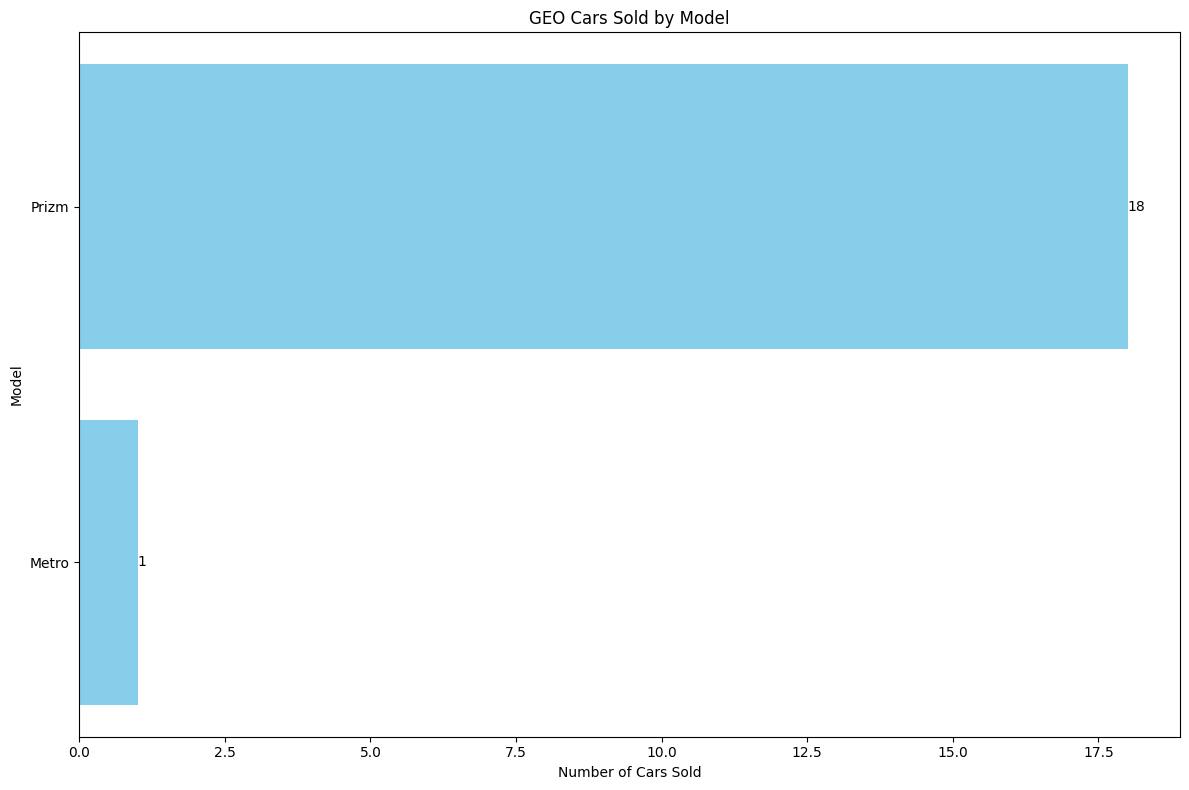

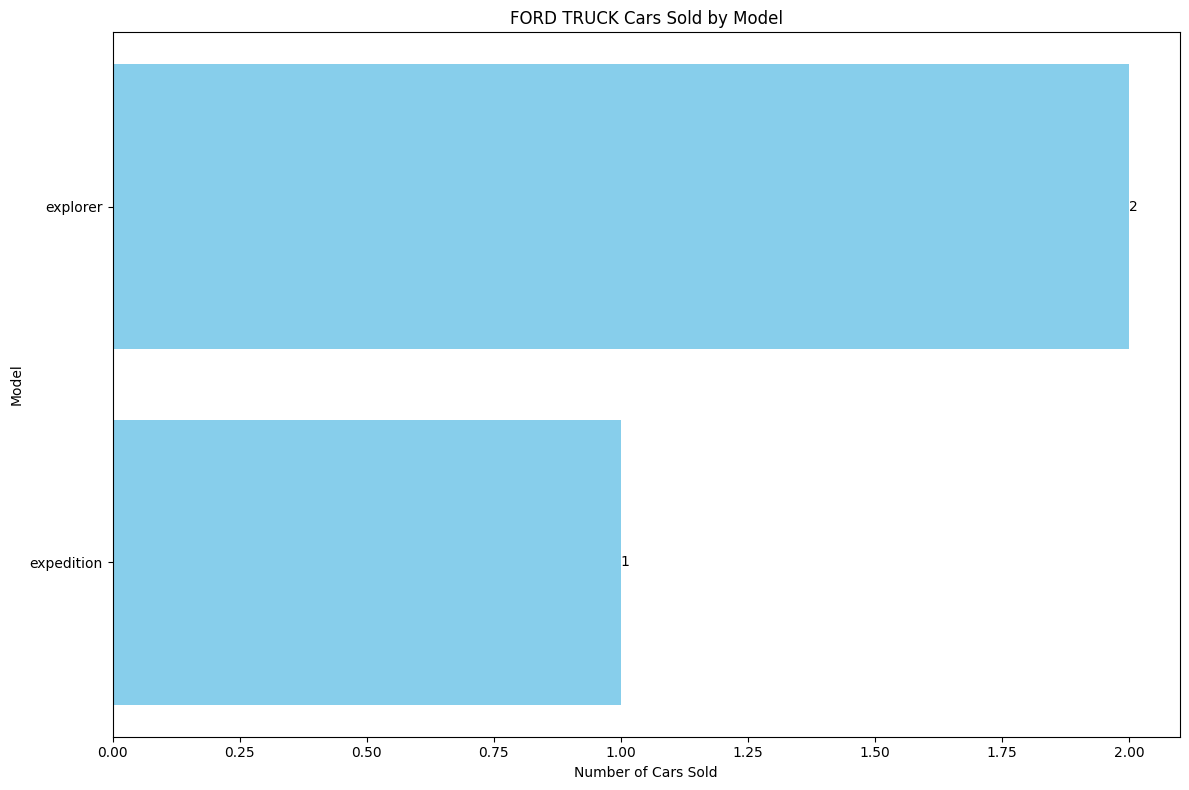

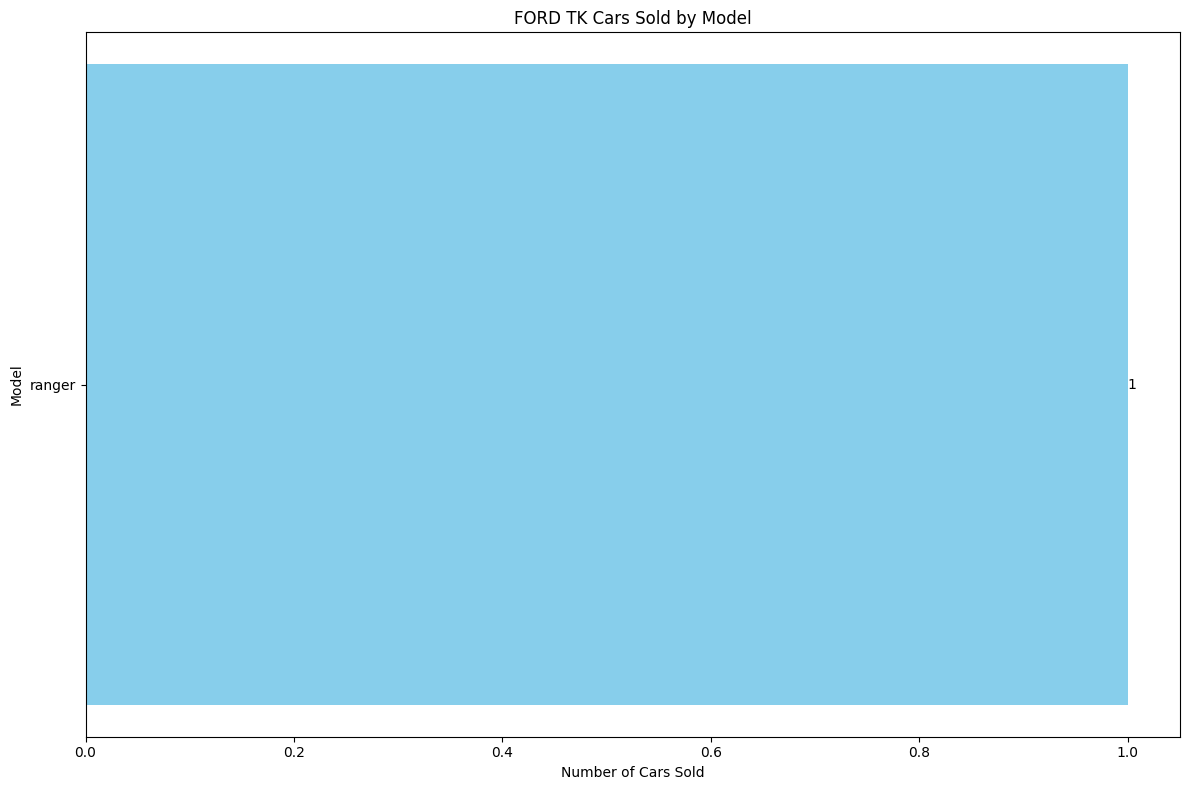

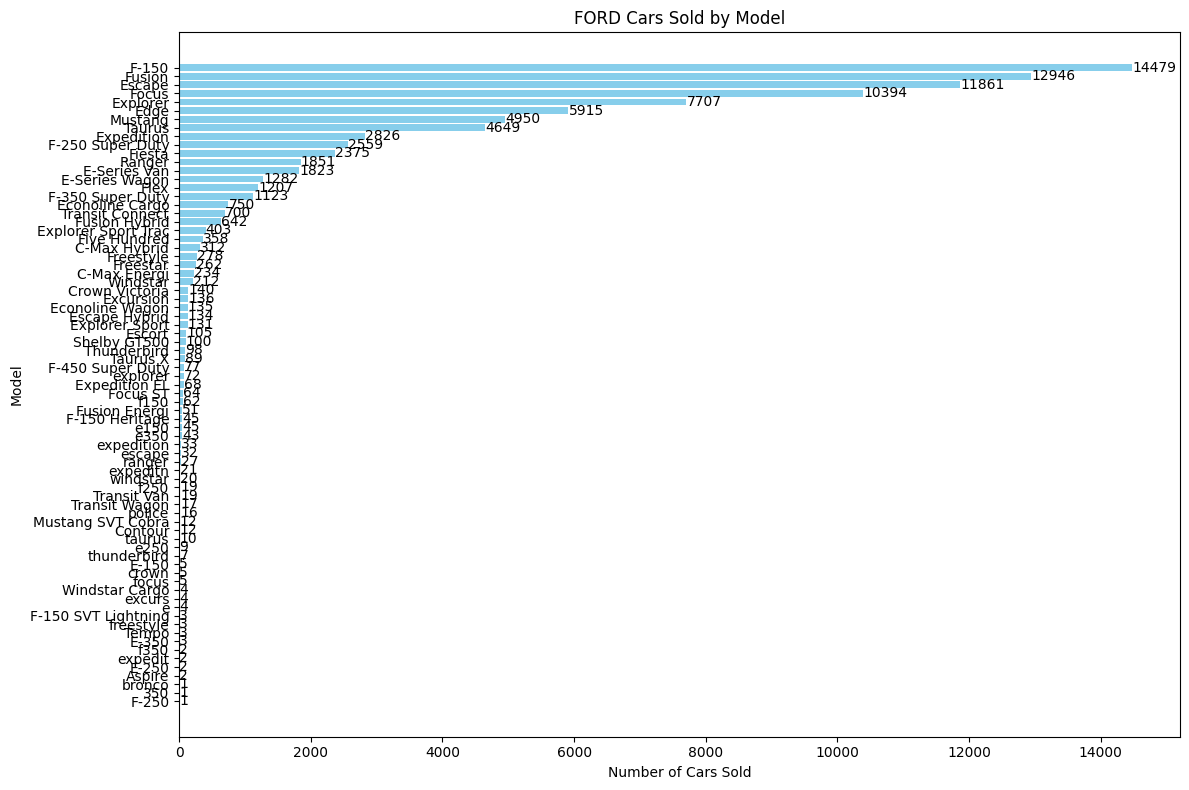

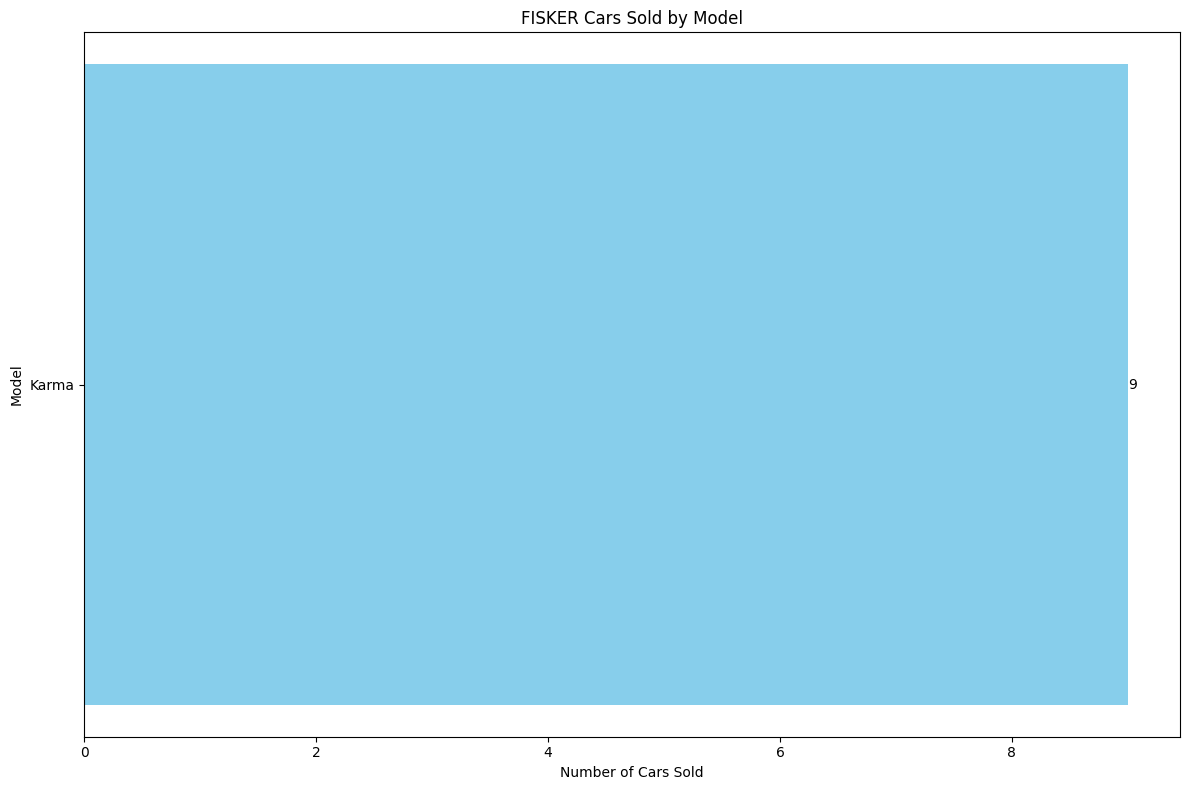

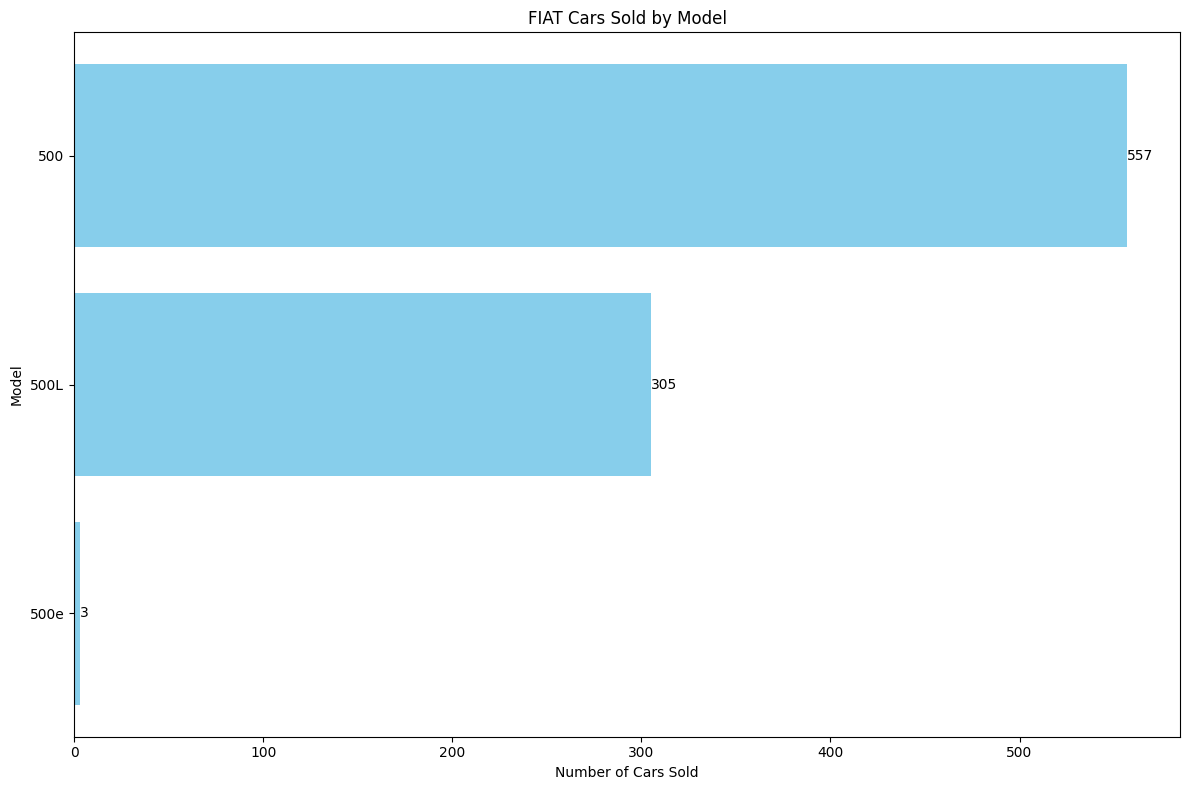

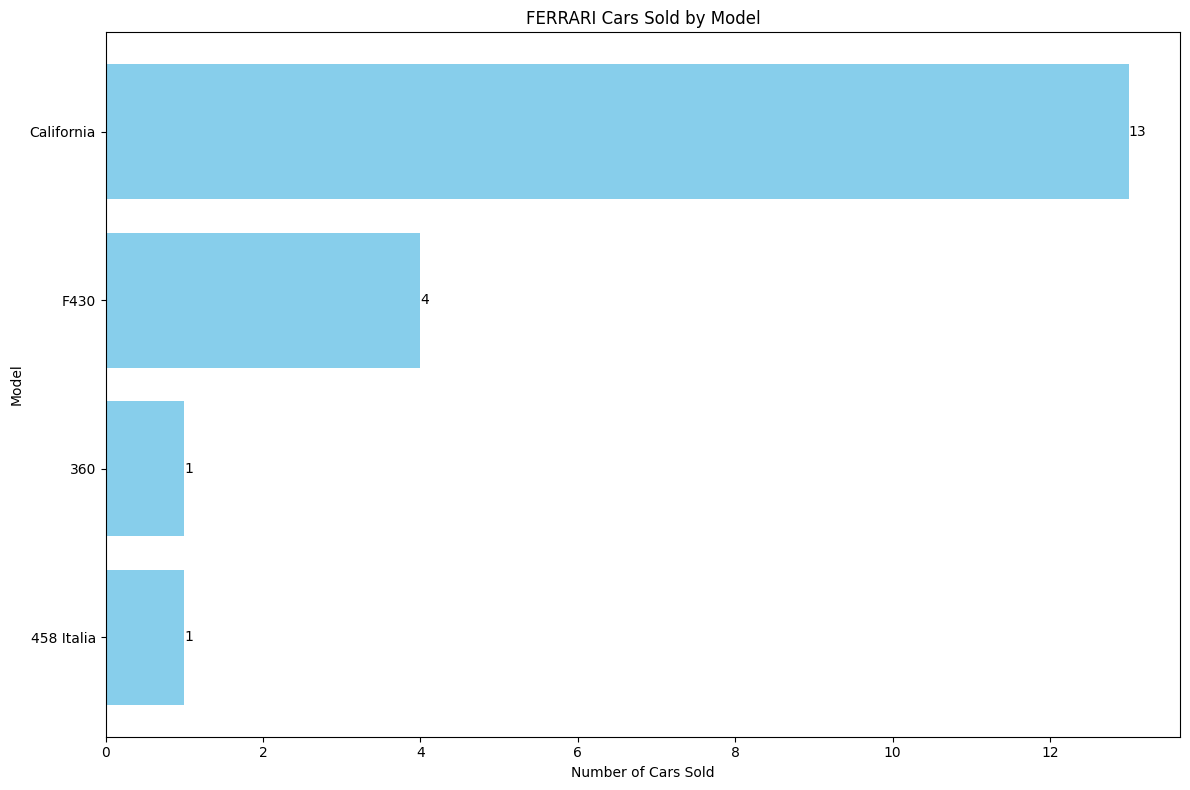

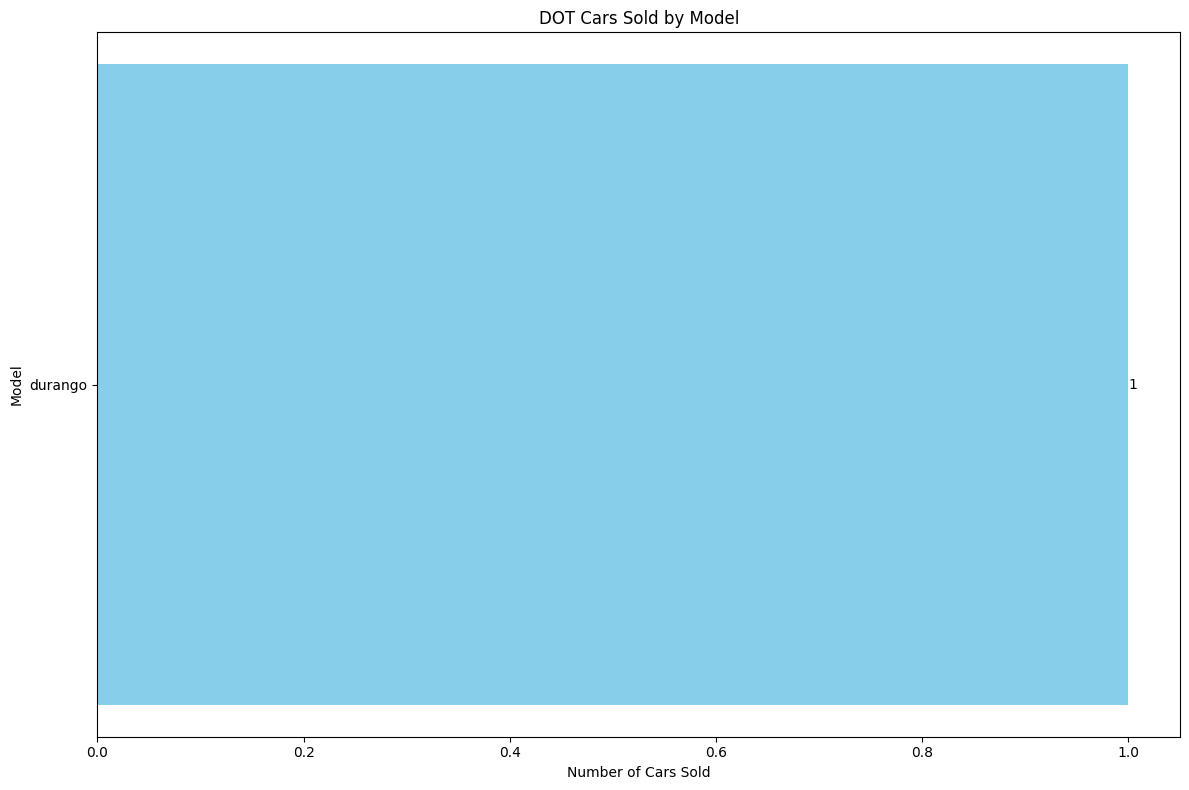

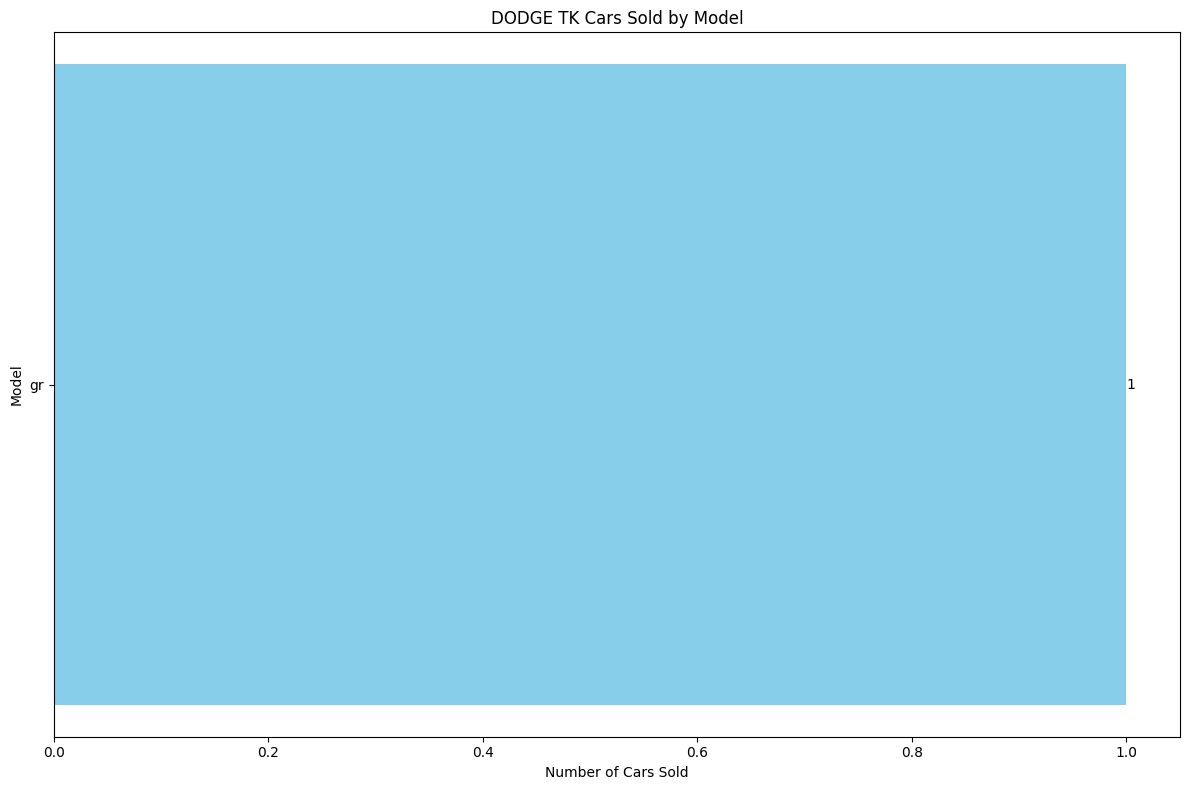

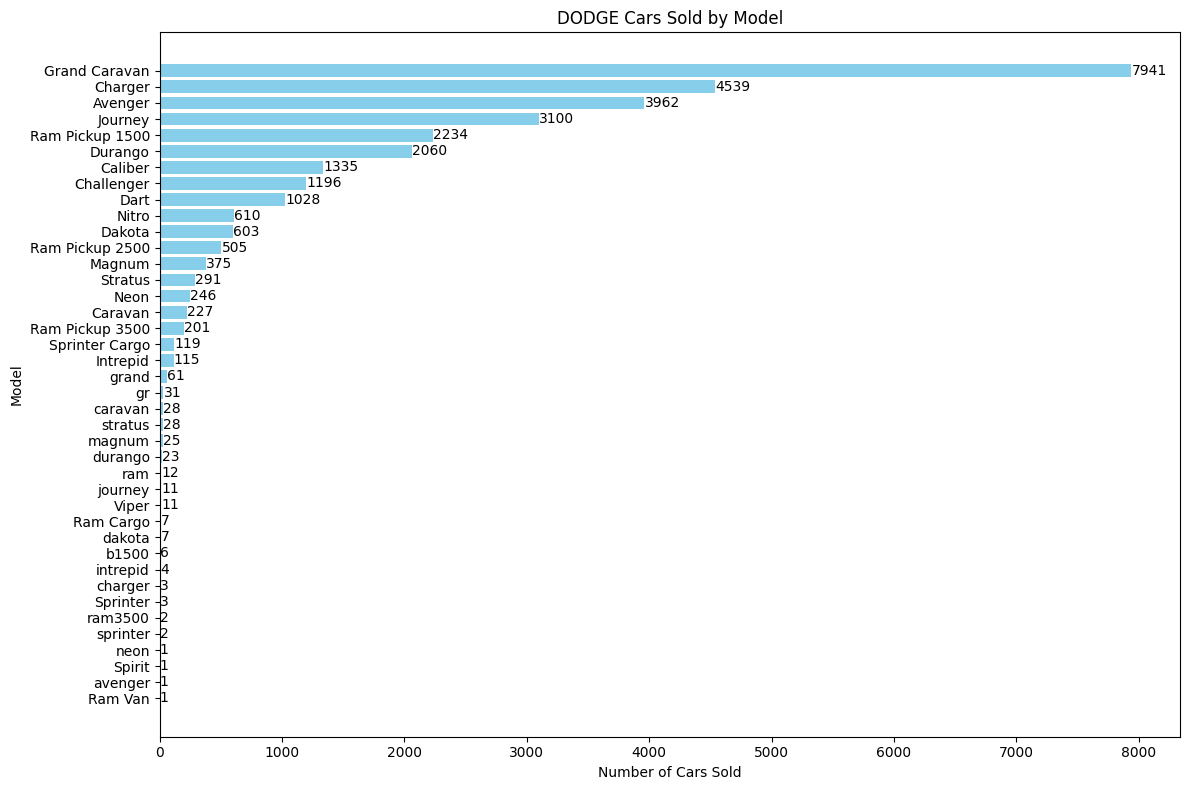

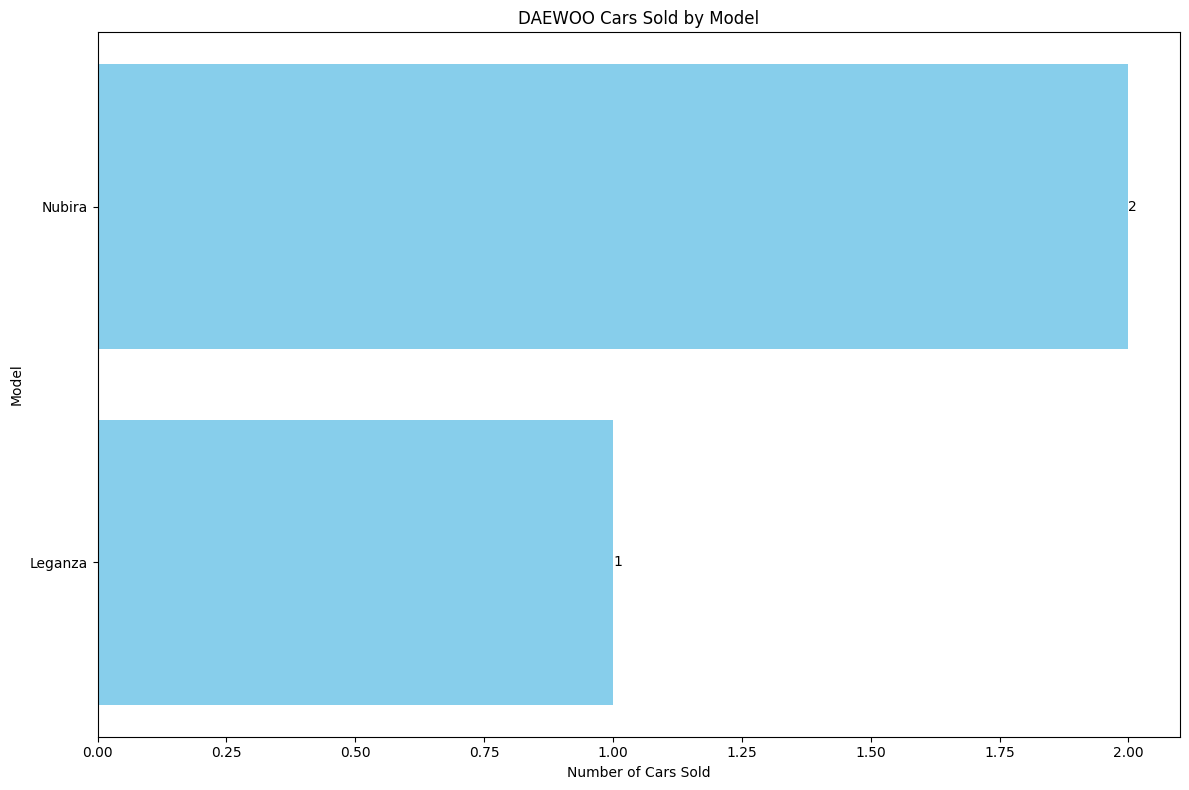

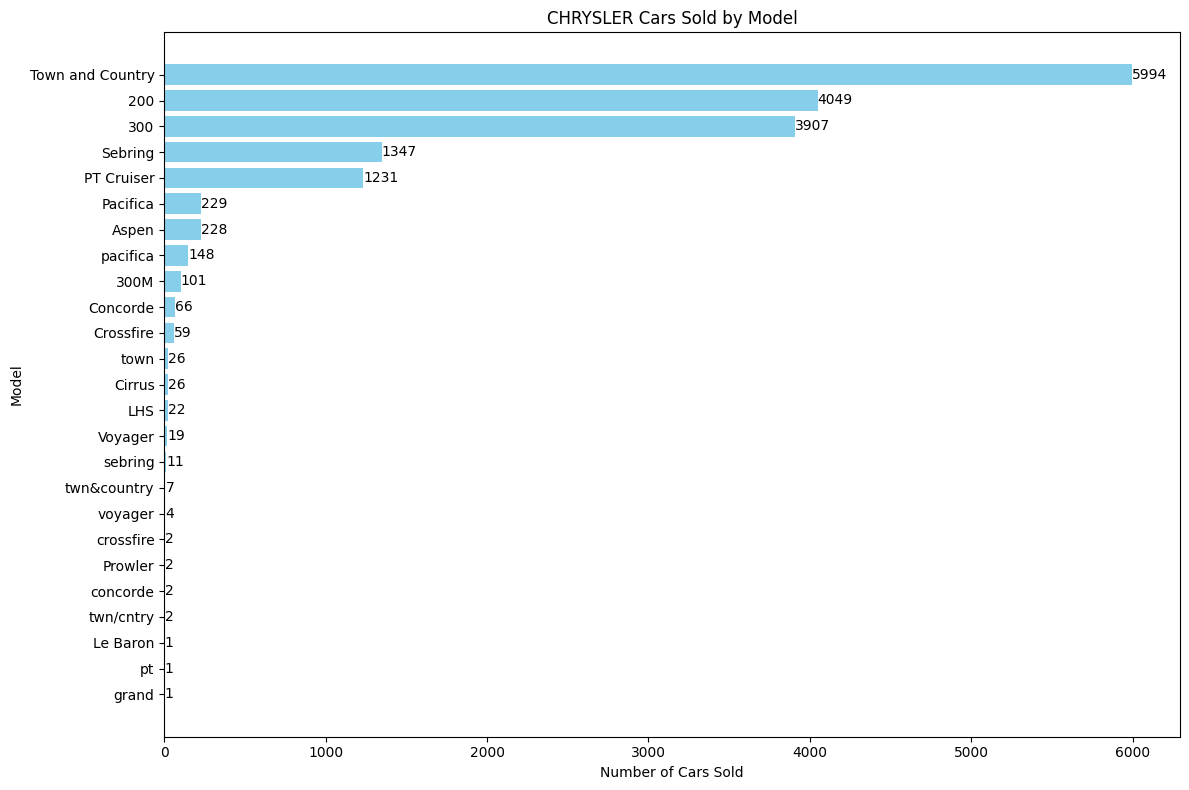

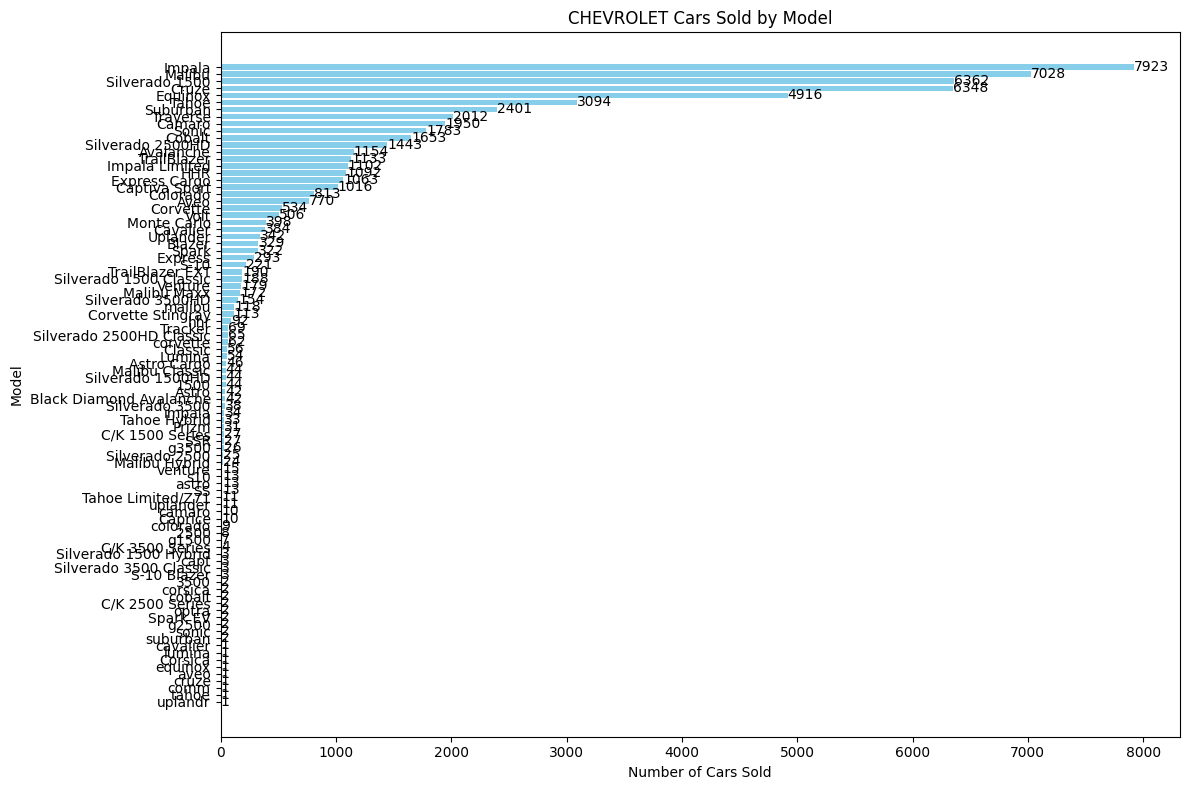

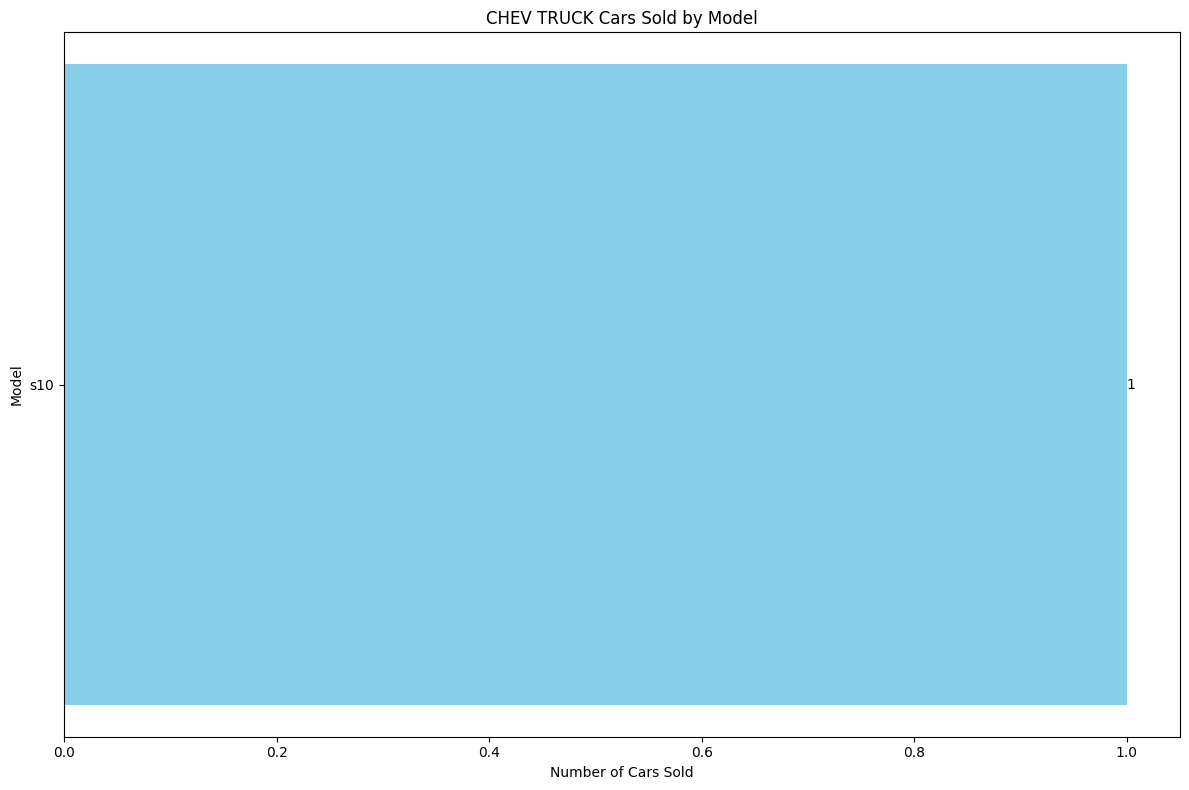

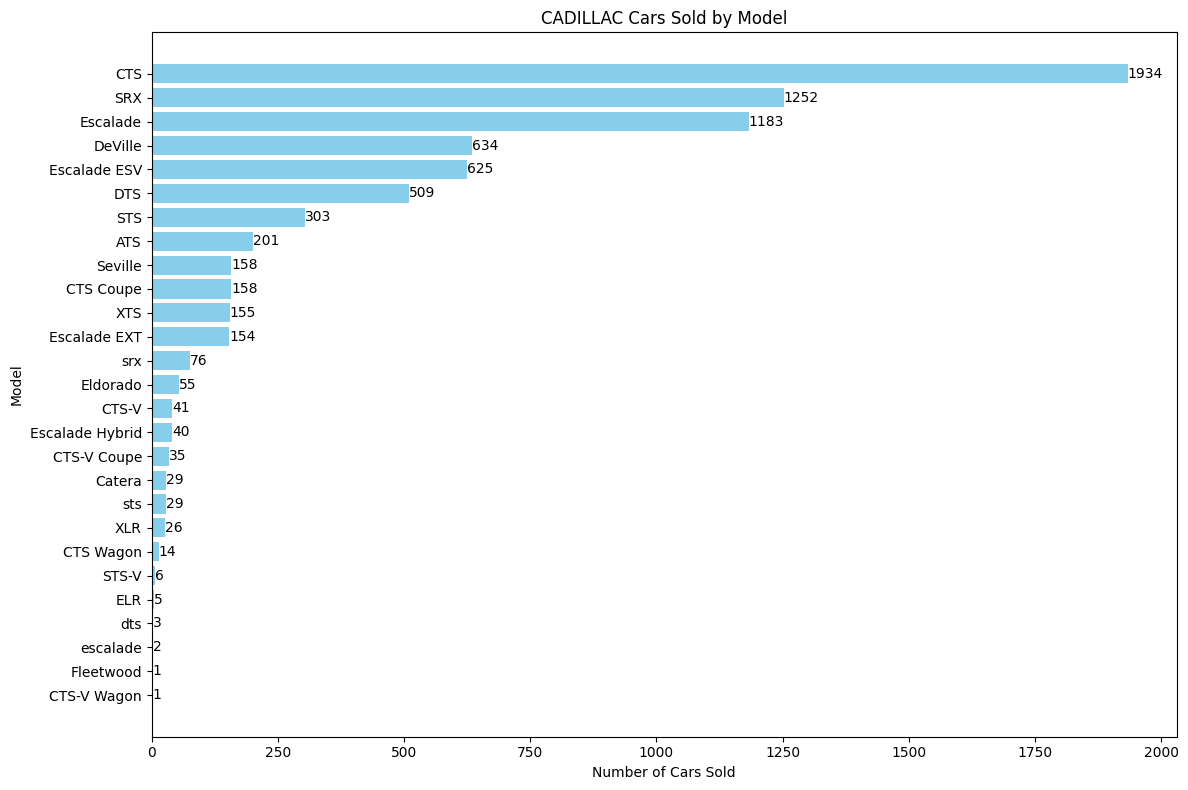

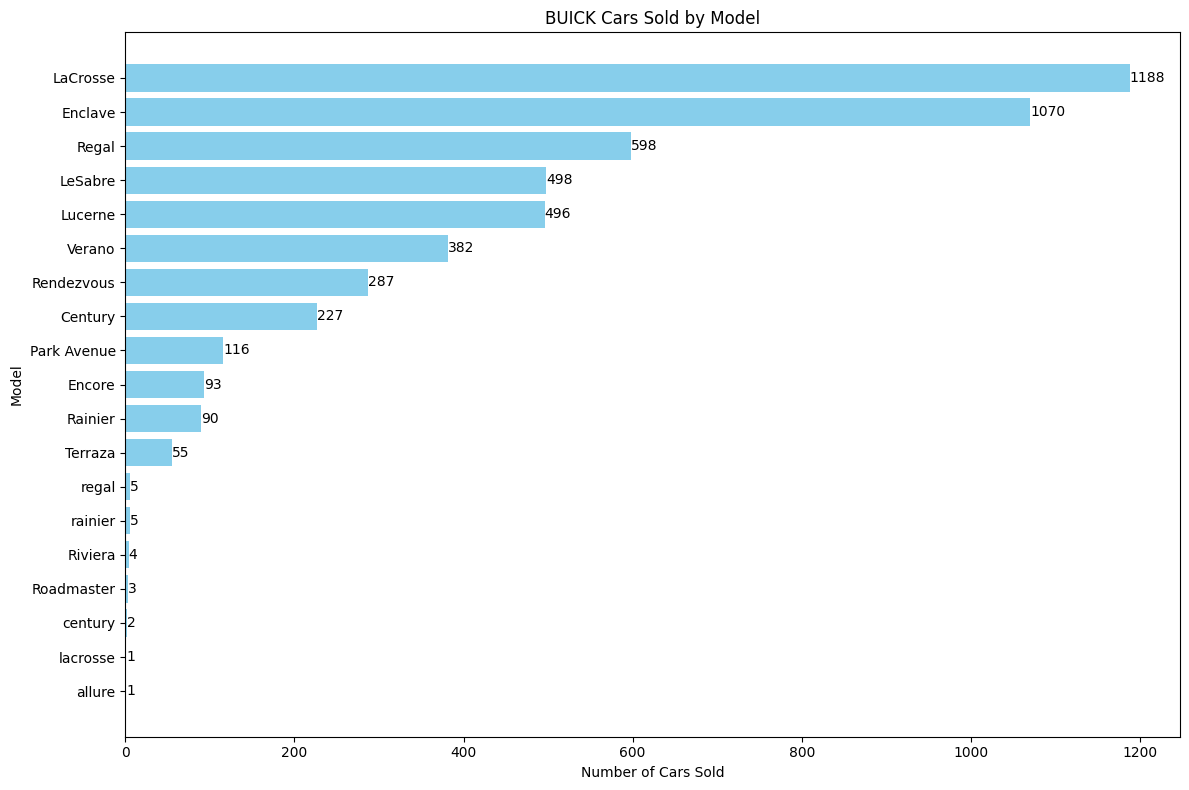

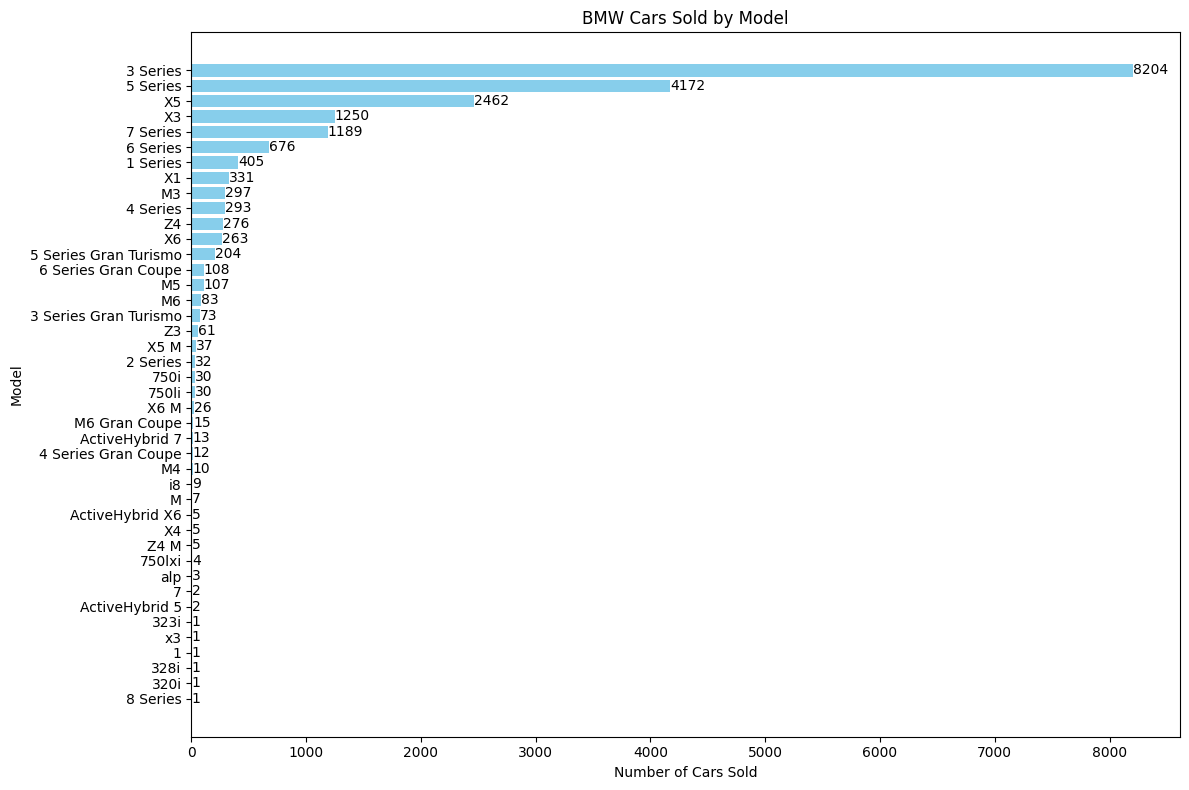

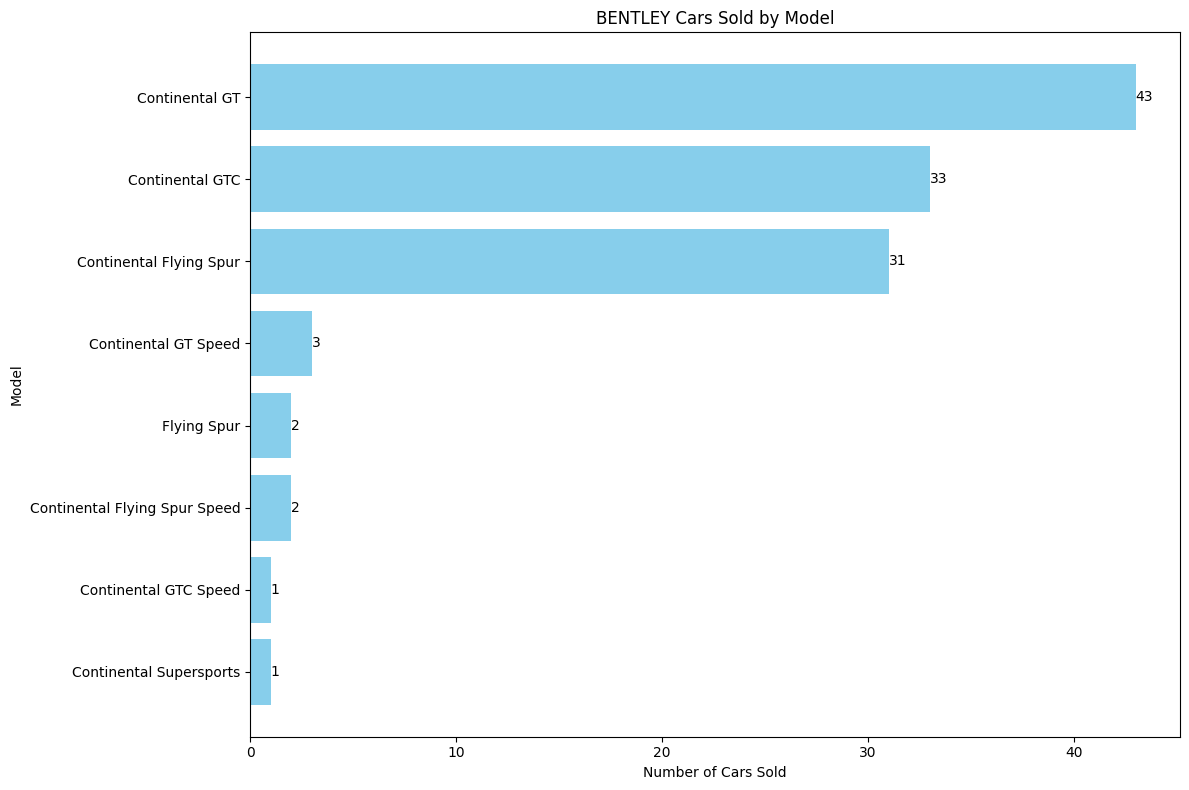

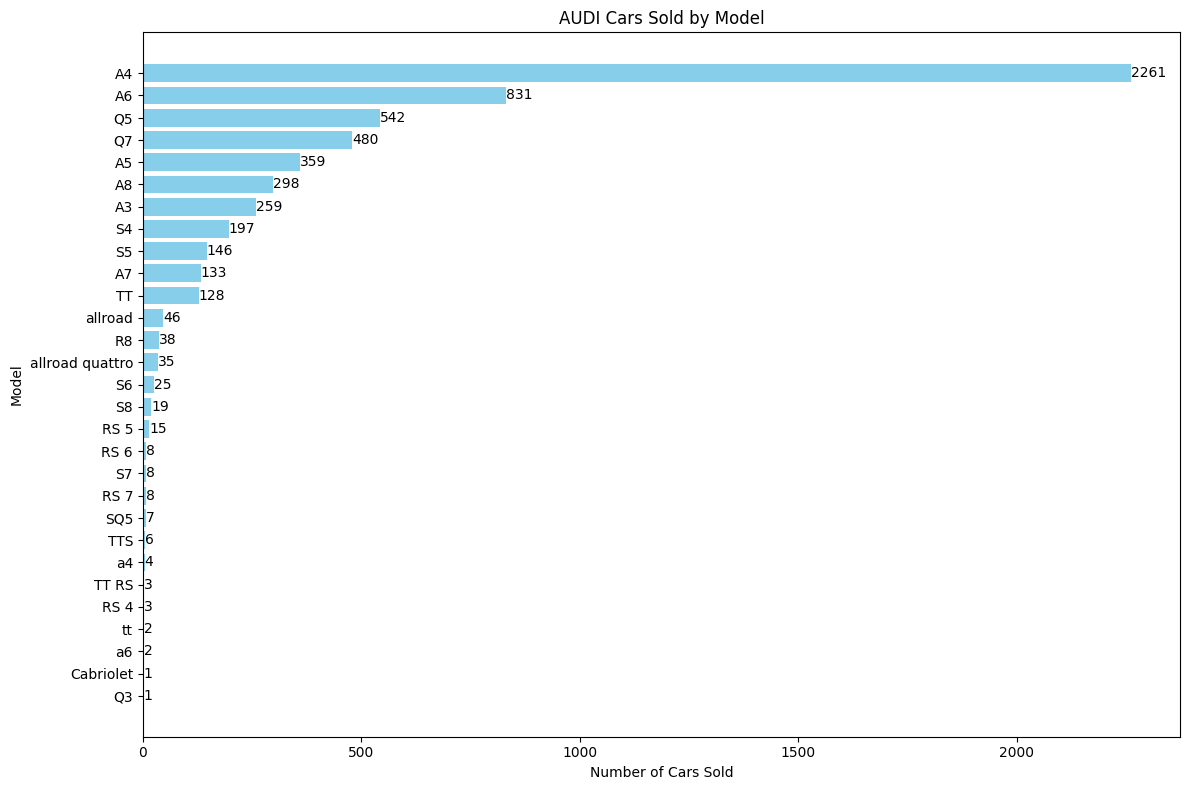

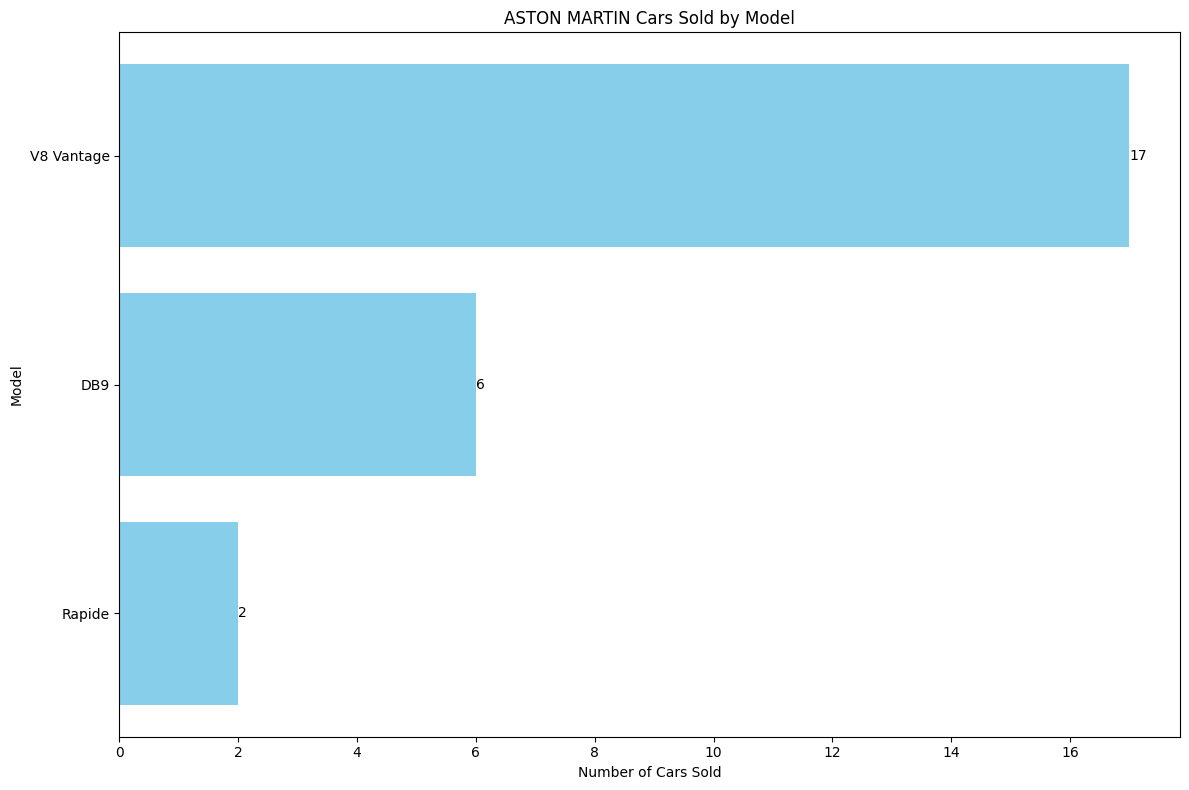

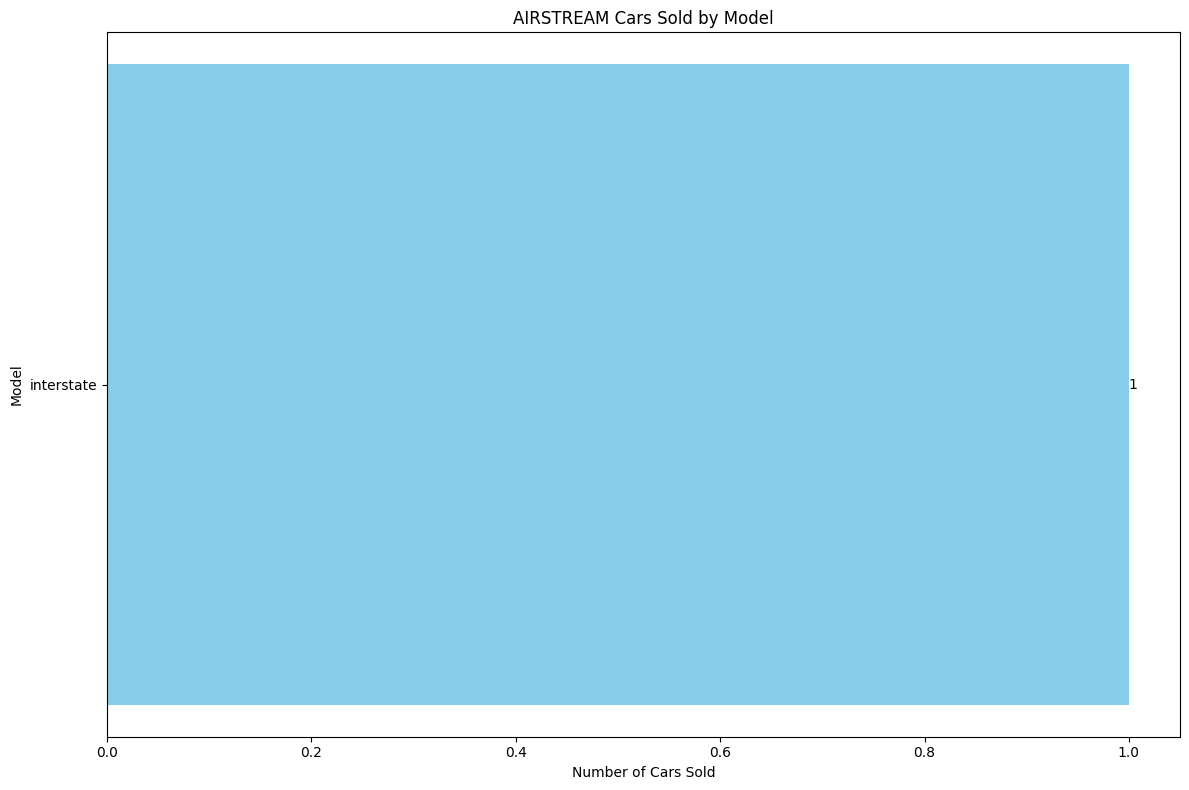

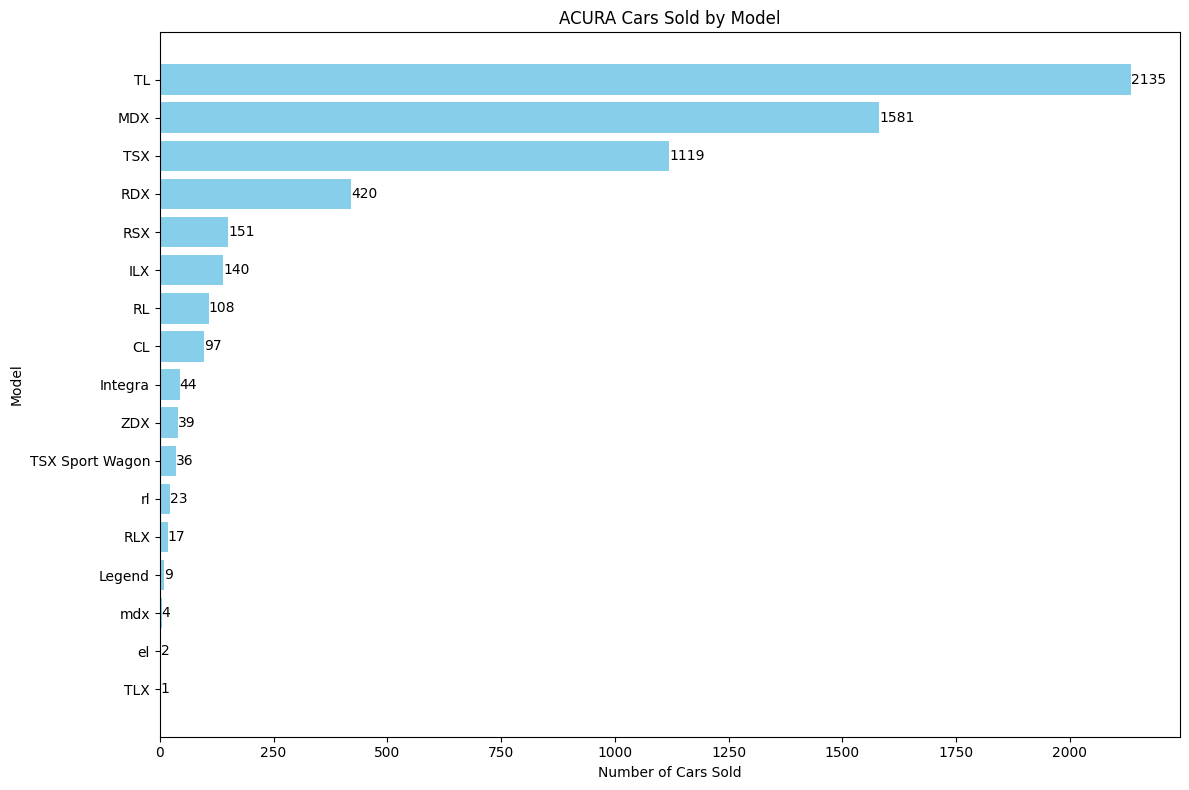

In [ ]:
import matplotlib.pyplot as plt

# Get unique car makes
car_makes = df['make'].unique()

# Iterate over each car make
for make in car_makes:
    # Filter the DataFrame for the current car make
    make_data = df[df['make'] == make]

    # Group the data by car model
    model_counts = make_data['model'].value_counts().sort_values(ascending=True)

    # Plot the number of cars sold for each model
    plt.figure(figsize=(12, 8  ))
    bars = plt.barh(model_counts.index, model_counts.values, color='skyblue')

    plt.title(f'{make} Cars Sold by Model')
    plt.ylabel('Model')
    plt.xlabel('Number of Cars Sold')

    # Add the corresponding values at the tip of the bars
    for bar, value in zip(bars, model_counts.values):
        plt.text(value, bar.get_y() + bar.get_height()/2, f'{value}', va='center', ha='left')

    plt.tight_layout()
    plt.show()


**ML TRAINING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

df = pd.read_csv('/content/drive/MyDrive/car_prices_2.csv')

In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Print the columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
odometer           94
color           25460
interior        17826
mmr                12
sellingprice       12
saledate           38
dtype: int64


In [ ]:
# Drop rows with null values in the 'make' column
df.dropna(subset=['make'], inplace=True)


In [ ]:
# Print the number of rows and columns in the DataFrame
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 548536
Number of columns: 14


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'make' is the column containing car makes
car_encoder = LabelEncoder()
df['make_encoded'] = car_encoder.fit_transform(df['make'].astype(str))  # Convert to string to handle NaNs

# Get the unique car makes and their corresponding encoded numbers
car_mappings = dict(zip(car_encoder.classes_, car_encoder.transform(car_encoder.classes_)))

# Find the maximum length of car make name for proper alignment
max_car_length = max(len(str(car)) for car in car_encoder.classes_)

# Print the mappings with proper alignment
for car, encoded_number in car_mappings.items():
    print(f"{str(car).ljust(max_car_length)} assigned as {encoded_number}")


ACURA         assigned as 0
AIRSTREAM     assigned as 1
ASTON MARTIN  assigned as 2
AUDI          assigned as 3
BENTLEY       assigned as 4
BMW           assigned as 5
BUICK         assigned as 6
CADILLAC      assigned as 7
CHEV TRUCK    assigned as 8
CHEVROLET     assigned as 9
CHRYSLER      assigned as 10
DAEWOO        assigned as 11
DODGE         assigned as 12
DODGE TK      assigned as 13
DOT           assigned as 14
FERRARI       assigned as 15
FIAT          assigned as 16
FISKER        assigned as 17
FORD          assigned as 18
FORD TK       assigned as 19
FORD TRUCK    assigned as 20
GEO           assigned as 21
GMC           assigned as 22
GMC TRUCK     assigned as 23
HONDA         assigned as 24
HUMMER        assigned as 25
HYUNDAI       assigned as 26
HYUNDAI TK    assigned as 27
INFINITI      assigned as 28
ISUZU         assigned as 29
JAGUAR        assigned as 30
JEEP          assigned as 31
KIA           assigned as 32
LAMBORGHINI   assigned as 33
LAND ROVER    assigned a

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the list of columns to encode
columns_to_encode = ['color', 'interior', 'transmission']

for column in columns_to_encode:
    # Initialize LabelEncoder for each column
    encoder = LabelEncoder()
    # Convert NaNs to string and apply label encoding
    df[column] = encoder.fit_transform(df[column].astype(str))

    # Get unique categories and their corresponding encoded numbers
    categories_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

    # Find the maximum length of category name for proper alignment
    max_length = max(len(str(category)) for category in categories_mapping.keys())

    # Print the mappings with proper alignment
    print(f"\n{column.capitalize()} Encodings:")
    for category, encoded_number in categories_mapping.items():
        print(f"{str(category).ljust(max_length)} assigned as {encoded_number}")

# Now df contains the original columns updated with encodings
# You can access and use the updated DataFrame 'df' for further analysis or modeling



Color Encodings:
beige     assigned as 0
black     assigned as 1
blue      assigned as 2
brown     assigned as 3
burgundy  assigned as 4
charcoal  assigned as 5
gold      assigned as 6
gray      assigned as 7
green     assigned as 8
lime      assigned as 9
nan       assigned as 10
off-white assigned as 11
orange    assigned as 12
pink      assigned as 13
purple    assigned as 14
red       assigned as 15
silver    assigned as 16
turquoise assigned as 17
white     assigned as 18
yellow    assigned as 19

Interior Encodings:
beige     assigned as 0
black     assigned as 1
blue      assigned as 2
brown     assigned as 3
burgundy  assigned as 4
gold      assigned as 5
gray      assigned as 6
green     assigned as 7
nan       assigned as 8
off-white assigned as 9
orange    assigned as 10
purple    assigned as 11
red       assigned as 12
silver    assigned as 13
tan       assigned as 14
white     assigned as 15
yellow    assigned as 16

Transmission Encodings:
Sedan     assigned as 0
automat

In [ ]:
# df.to_csv('/content/sample_data.car_prices_2updated.csv', index=False)


In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice',
       'saledate', 'make_encoded'],
      dtype='object')

In [ ]:
pd.DataFrame(df).isnull().sum()

year               0
make               0
model             98
trim             350
body            2894
transmission       0
vin                4
odometer          90
color              0
interior           0
seller             0
mmr               12
sellingprice      12
saledate          38
make_encoded       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame containing features and target variable
# 'X' should contain features and 'y' should contain the target variable
X = df[['year', 'transmission', 'odometer', 'color', 'interior', 'mmr', 'make_encoded']]
y = df['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SimpleImputer for X (features)
imputer_X = SimpleImputer(strategy='mean')
# Fit and transform the imputer on the training features
X_train_imputed = imputer_X.fit_transform(X_train)
# Transform the testing features using the trained imputer
X_test_imputed = imputer_X.transform(X_test)

# Initialize SimpleImputer for y (target variable)
imputer_y = SimpleImputer(strategy='mean')
# Fit and transform the imputer on the training target variable
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# Transform the testing target variable using the trained imputer
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_imputed, y_train_imputed)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test_imputed)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_imputed, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_imputed, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_imputed, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test_imputed, y_pred)
print("R-squared (R^2) Score:", r2)


Mean Squared Error (MSE): 3362041.4330835254
Root Mean Squared Error (RMSE): 1833.5870399529786
Mean Absolute Error (MAE): 1084.5268275041306
R-squared (R^2) Score: 0.9648712435655741


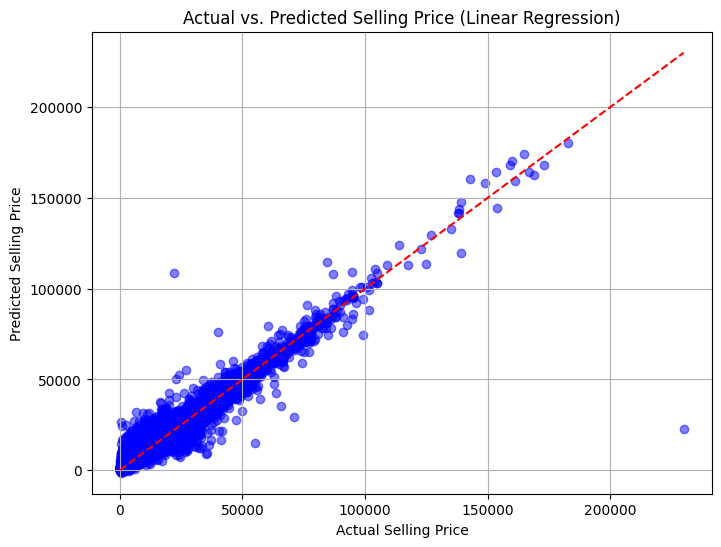

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted selling prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test_imputed, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test_imputed), max(y_test_imputed)], [min(y_test_imputed), max(y_test_imputed)], linestyle='--', color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price (Linear Regression)')
plt.grid(True)
plt.show()


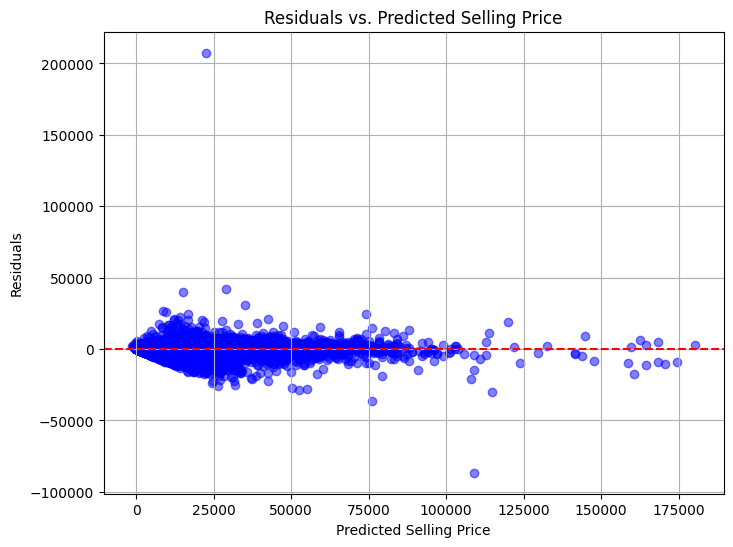

In [ ]:
# Residual Analysis
residuals = y_test_imputed - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Selling Price')
plt.grid(True)
plt.show()


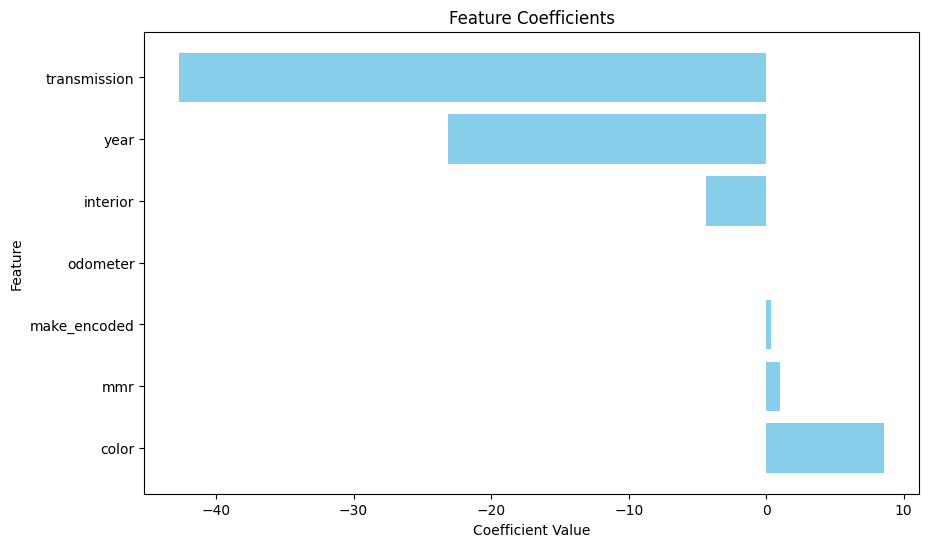

In [ ]:
# Extract feature coefficients
feature_coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_coeffs = feature_coeffs.sort_values(by='Coefficient', ascending=False)

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coeffs['Feature'], feature_coeffs['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()


In [ ]:
# Check for null values in the DataFrame
null_values = pd.DataFrame(X).isnull().sum()

# Print the columns with null values, if any
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
odometer    90
mmr         12
dtype: int64


In [ ]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# # Importing the dataset
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values


# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_imputed, y_train_imputed)

# Predicting the Test set results
y_pred = regressor.predict(X_test_imputed)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_imputed.reshape(len(y_test_imputed),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test_imputed, y_pred)

[[14800. 12000.]
 [12200.  8201.]
 [21200. 20800.]
 ...
 [ 7200.  8000.]
 [ 8400.  8800.]
 [10100. 10200.]]


0.933172360968769

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train_imputed)

# Predicting the Test set results
y_pred = regressor.predict(X_test_imputed)
np.set_printoptions(precision=2)
# Reshape the arrays
y_pred_np = y_pred.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)

# Concatenate the arrays
result = np.concatenate((y_pred_np, y_test_np), axis=1)
# Print the concatenated array
print(result)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test_imputed, y_pred)

[[11531.73 12000.  ]
 [ 7717.67  8201.  ]
 [20014.77 20800.  ]
 ...
 [ 7489.67  8000.  ]
 [ 8727.47  8800.  ]
 [ 9537.28 10200.  ]]


0.9648712435655741

In [ ]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train_imputed)
regressor = LinearRegression()
regressor.fit(X_poly, y_train_imputed)

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test_imputed))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_imputed.reshape(len(y_test_imputed),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test_imputed, y_pred)

[[11593.88 12000.  ]
 [ 7655.45  8201.  ]
 [20085.51 20800.  ]
 ...
 [ 7551.72  8000.  ]
 [ 8678.25  8800.  ]
 [ 9597.95 10200.  ]]


0.9652549858509679

In [ ]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_imputed, y_train_imputed)

# Predicting the Test set results
y_pred = regressor.predict(X_test_imputed)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_imputed.reshape(len(y_test_imputed),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test_imputed, y_pred)

[[12530. 12000.]
 [10140.  8201.]
 [19660. 20800.]
 ...
 [ 7340.  8000.]
 [ 8980.  8800.]
 [10090. 10200.]]


0.9608854404797057

In [ ]:
df.columns


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice',
       'saledate', 'make_encoded'],
      dtype='object')

SVR

In [ ]:
# Support Vector Regression (SVR)
X = df.iloc[:, 11:12].values
y = df.iloc[:, 12].values

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')
y = np.reshape(y, (-1, 1))
# Fit the imputer on the data and transform X
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
y = np.reshape(y, (-1, 1))
X_imputed = sc_X.fit_transform(X_imputed)
y_imputed = sc_y.fit_transform(y_imputed)

In [ ]:
# Assuming your dataset is named 'df'
sample_data = df.sample(n=5, random_state=42)  # Select 5 random rows

# Extracting feature and target columns
X_sample = sample_data['mmr'].values.reshape(-1, 1)  # Feature: mmr column
y_sample = sample_data['sellingprice'].values       # Target: selling_price column

# Now you can proceed with further processing or modeling using this sample data
# For example, you can scale the features and target:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_sample_scaled = scaler_X.fit_transform(X_sample)
y_sample_scaled = scaler_y.fit_transform(y_sample.reshape(-1, 1))

# Now you can use X_sample_scaled and y_sample_scaled for training your model
# For instance, you can train an SVR model as follows:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_sample_scaled, y_sample_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test_imputed, y_pred)

0.9608854404797057

In [ ]:
 # Scale the input value
X_input_scaled = scaler_X.transform([[1425]])

# Predict the scaled output
y_pred_scaled = regressor.predict(X_input_scaled)

# Inverse transform the predicted scaled output
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

print("Predicted selling price:", y_pred[0][0])


Predicted selling price: 7514.200079955265


ARIMA

In [ ]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

df = pd.read_csv('/content/drive/MyDrive/car_prices_2.csv')

In [3]:
# df.to_csv('/content/sample_data.car_prices_2updated.csv', index=False)

In [4]:
df['saledate']

0         Thu Dec 18 2014 18:30:00 GMT-0800 (PST)
1         Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
2         Tue Jan 13 2015 10:00:00 GMT-0800 (PST)
3         Thu Dec 18 2014 10:45:00 GMT-0800 (PST)
4         Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
                           ...                   
558832    Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)
558833    Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558834    Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558835    Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558836    Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
Name: saledate, Length: 558837, dtype: object

In [5]:
# Read the 'sale_date' column from the DataFrame
sale_date_column = df['saledate']


In [6]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice',
       'saledate'],
      dtype='object')

In [7]:
# Drop rows with null values in the 'make' column
df.dropna(subset=['make'], inplace=True)
# Replace null values in 'mmr' column with mean
mmr_mean = df['mmr'].mean()
df['mmr'].fillna(mmr_mean, inplace=True)

# Replace null values in 'sellingprice' column with mean
sellingprice_mean = df['sellingprice'].mean()
df['sellingprice'].fillna(sellingprice_mean, inplace=True)


In [8]:
pd.DataFrame(df).isnull().sum()

year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 4
odometer           90
color           25247
interior        17429
seller              0
mmr                 0
sellingprice        0
saledate           38
dtype: int64

In [9]:
pd.DataFrame(df.saledate)

saledate
0       Thu Dec 18 2014 18:30:00 GMT-0800 (PST)
1       Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
2       Tue Jan 13 2015 10:00:00 GMT-0800 (PST)
3       Thu Dec 18 2014 10:45:00 GMT-0800 (PST)
4       Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
...                                         ...
558832  Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)
558833  Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558834  Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558835  Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558836  Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)

[548536 rows x 1 columns]

In [10]:
import pandas as pd
import re


# Dictionary mapping month abbreviations to their numeric representations
month_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
              'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

# Function to extract and format the date
def extract_and_format_date(sale_date):
    if isinstance(sale_date, str):  # Check if sale_date is a string
        # Define the regular expression pattern to match the date components
        pattern = re.compile(r'\w{3} (\w{3}) (\d{2}) (\d{4})')
        # Search for the pattern in the sale_date string
        match = pattern.search(sale_date)
        if match:
            # Extract the date components
            month = match.group(1)
            day = match.group(2)
            year = match.group(3)
            # Convert the month abbreviation to month number
            month_num = month_dict.get(month)
            # Format the date as "DD-MM-YYYY"
            formatted_date = f"{day}-{month_num}-{year}"
            return formatted_date
    return None

# Apply the function to the entire 'saledate' column
df['date'] = df['saledate'].apply(extract_and_format_date)

# Display the DataFrame with the new formatted sale date column
print(df)


        year        make   model                trim   body transmission  \
0       2002  VOLKSWAGEN   jetta            gls 1.8t    NaN          NaN   
1       2011  VOLKSWAGEN   jetta          comfrtline    NaN          NaN   
2       2014  VOLKSWAGEN  routan                  se    NaN    automatic   
3       1999  VOLKSWAGEN  beetle             gls tdi    NaN       manual   
4       2011  VOLKSWAGEN   jetta          comfrtline    NaN          NaN   
...      ...         ...     ...                 ...    ...          ...   
558832  2013       ACURA     RDX  Technology Package    suv    automatic   
558833  2014       ACURA     RDX  Technology Package    suv          NaN   
558834  2011       ACURA     RDX              SH-AWD    suv    automatic   
558835  2012       ACURA     MDX                Base    suv          NaN   
558836  2013       ACURA     TSX                Base  Sedan    automatic   

                      vin  odometer  color interior  \
0       3vwse29m02m183926  12330

In [11]:
pd.DataFrame(df).isnull().sum()

year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 4
odometer           90
color           25247
interior        17429
seller              0
mmr                 0
sellingprice        0
saledate           38
date               38
dtype: int64

In [12]:
# Replace 'N/A' with NaN
df.replace('N/A', pd.NA, inplace=True)

# Convert 'saledate' column to datetime
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Find the most frequent date in both columns
saledate_mode = df['saledate'].mode()[0]
date_mode = df['date'].mode()[0]

# Replace NaN values with the most frequent dates
df['saledate'].fillna(saledate_mode, inplace=True)
df['date'].fillna(date_mode, inplace=True)

# Display the DataFrame
print(df)

        year        make   model                trim   body transmission  \
0       2002  VOLKSWAGEN   jetta            gls 1.8t    NaN          NaN   
1       2011  VOLKSWAGEN   jetta          comfrtline    NaN          NaN   
2       2014  VOLKSWAGEN  routan                  se    NaN    automatic   
3       1999  VOLKSWAGEN  beetle             gls tdi    NaN       manual   
4       2011  VOLKSWAGEN   jetta          comfrtline    NaN          NaN   
...      ...         ...     ...                 ...    ...          ...   
558832  2013       ACURA     RDX  Technology Package    suv    automatic   
558833  2014       ACURA     RDX  Technology Package    suv          NaN   
558834  2011       ACURA     RDX              SH-AWD    suv    automatic   
558835  2012       ACURA     MDX                Base    suv          NaN   
558836  2013       ACURA     TSX                Base  Sedan    automatic   

                      vin  odometer  color interior  \
0       3vwse29m02m183926  12330

<ipython-input-12-a3b14c0ae894>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [13]:
pd.DataFrame(df).isnull().sum()

year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 4
odometer           90
color           25247
interior        17429
seller              0
mmr                 0
sellingprice        0
saledate            0
date                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548536 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          548536 non-null  int64              
 1   make          548536 non-null  object             
 2   model         548438 non-null  object             
 3   trim          548186 non-null  object             
 4   body          545642 non-null  object             
 5   transmission  484945 non-null  object             
 6   vin           548532 non-null  object             
 7   odometer      548446 non-null  float64            
 8   color         523289 non-null  object             
 9   interior      531107 non-null  object             
 10  seller        548536 non-null  object             
 11  mmr           548536 non-null  float64            
 12  sellingprice  548536 non-null  float64            
 13  saledate      548536 non-null  datetime64[ns

In [15]:
# Sort the DataFrame by the 'date' column in decreasing order of years
df.sort_values(by='date', ascending=False, inplace=True)

# Display the sorted DataFrame
print(df)


        year        make          model     trim           body transmission  \
256509  2013     HYUNDAI  Genesis Coupe     2.0T  genesis coupe    automatic   
496880  2013   CHEVROLET         Impala      LTZ          Sedan    automatic   
16190   2012  VOLKSWAGEN         Passat  SE PZEV          Sedan          NaN   
16180   2012  VOLKSWAGEN         Passat  SE PZEV          Sedan          NaN   
16175   2012  VOLKSWAGEN          Jetta  SE PZEV          Sedan          NaN   
...      ...         ...            ...      ...            ...          ...   
211     2008       VOLVO            S40     2.4i          Sedan    automatic   
555416  2010       ACURA            TSX     Base          Sedan    automatic   
244895  2013    INFINITI             JX     JX35            SUV    automatic   
91636   2004      NISSAN         Maxima   3.5 SL          Sedan    automatic   
267791  2006     HYUNDAI          Azera       SE          Sedan    automatic   

                      vin  odometer   c

In [16]:
# Print the DataFrame in chunks
chunk_size = 1000  # Adjust the chunk size as needed
for i in range(0, len(df), chunk_size):
    print(df.iloc[i:i+chunk_size])


Streaming output truncated to the last 5000 lines.
250081  regional acceptance corporation / greensboro  10450.0        9900.0   
327411                             avis budget group  20200.0       19200.0   
250082                         the hertz corporation  14500.0       14300.0   

                        saledate       date  
457094 2015-01-19 18:00:00+00:00 2015-01-20  
457080 2015-01-19 17:15:00+00:00 2015-01-20  
457083 2015-01-19 18:30:00+00:00 2015-01-20  
314474 2015-01-19 18:00:00+00:00 2015-01-20  
457086 2015-01-19 17:15:00+00:00 2015-01-20  
...                          ...        ...  
37661  2015-01-19 17:15:00+00:00 2015-01-20  
30326  2015-01-19 17:30:00+00:00 2015-01-20  
250081 2015-01-19 18:30:00+00:00 2015-01-20  
327411 2015-01-19 18:30:00+00:00 2015-01-20  
250082 2015-01-19 17:15:00+00:00 2015-01-20  

[1000 rows x 15 columns]
        year      make             model    trim       body transmission  \
37662   2014    TOYOTA             Camry      LE      Sed

In [17]:
print(df.to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
df['date']

256509   2015-12-06
496880   2015-12-06
16190    2015-12-06
16180    2015-12-06
16175    2015-12-06
            ...    
211      2014-01-01
555416   2014-01-01
244895   2014-01-01
91636    2014-01-01
267791   2014-01-01
Name: date, Length: 548536, dtype: datetime64[ns]

In [19]:
# Display frequency of null values in each column
null_frequency = df.isnull().sum()
print(null_frequency)


year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 4
odometer           90
color           25247
interior        17429
seller              0
mmr                 0
sellingprice        0
saledate            0
date                0
dtype: int64


In [20]:
# Find the most frequent date
most_frequent_date = df['date'].value_counts().idxmax()

# Replace null values with the most frequent date
df['date'].fillna(most_frequent_date, inplace=True)


In [21]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the 'mmr' column
df['mmr'] = imputer.fit_transform(df[['mmr']])

# Fit and transform the imputer on the 'sellingprice' column
df['sellingprice'] = imputer.fit_transform(df[['sellingprice']])


In [22]:
# Display frequency of null values in each column
null_frequency = df.isnull().sum()
print(null_frequency)


year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 4
odometer           90
color           25247
interior        17429
seller              0
mmr                 0
sellingprice        0
saledate            0
date                0
dtype: int64


In [23]:
print(df)

        year        make          model     trim           body transmission  \
256509  2013     HYUNDAI  Genesis Coupe     2.0T  genesis coupe    automatic   
496880  2013   CHEVROLET         Impala      LTZ          Sedan    automatic   
16190   2012  VOLKSWAGEN         Passat  SE PZEV          Sedan          NaN   
16180   2012  VOLKSWAGEN         Passat  SE PZEV          Sedan          NaN   
16175   2012  VOLKSWAGEN          Jetta  SE PZEV          Sedan          NaN   
...      ...         ...            ...      ...            ...          ...   
211     2008       VOLVO            S40     2.4i          Sedan    automatic   
555416  2010       ACURA            TSX     Base          Sedan    automatic   
244895  2013    INFINITI             JX     JX35            SUV    automatic   
91636   2004      NISSAN         Maxima   3.5 SL          Sedan    automatic   
267791  2006     HYUNDAI          Azera       SE          Sedan    automatic   

                      vin  odometer   c

In [24]:
# !pip install statsmodels --upgrade

In [25]:
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot

In [26]:
df

year        make          model     trim           body transmission  \
256509  2013     HYUNDAI  Genesis Coupe     2.0T  genesis coupe    automatic   
496880  2013   CHEVROLET         Impala      LTZ          Sedan    automatic   
16190   2012  VOLKSWAGEN         Passat  SE PZEV          Sedan          NaN   
16180   2012  VOLKSWAGEN         Passat  SE PZEV          Sedan          NaN   
16175   2012  VOLKSWAGEN          Jetta  SE PZEV          Sedan          NaN   
...      ...         ...            ...      ...            ...          ...   
211     2008       VOLVO            S40     2.4i          Sedan    automatic   
555416  2010       ACURA            TSX     Base          Sedan    automatic   
244895  2013    INFINITI             JX     JX35            SUV    automatic   
91636   2004      NISSAN         Maxima   3.5 SL          Sedan    automatic   
267791  2006     HYUNDAI          Azera       SE          Sedan    automatic   

                      vin  odometer   color interior  \
256509  kmhht6kd3du091319   27402.0   brown     gray   
496880  2g1wc5e3xd1206964   30497.0  silver    black   
16190   1vwbp7a38cc070156   23239.0   white    beige   
16180   1vwbp7a33cc038392   28392.0   white    beige   
16175   3vwdp7aj1cm104671   28697.0   white    black   
...                   ...       ...     ...      ...   
211     yv1ms390682402390  125660.0   black    black   
555416  jh4cu4f68ac000198   76360.0    gray    black   
244895  5n1al0mm7dc324331   37290.0  silver    black   
91636   1n4ba41e34c888244  121581.0    blue     gray   
267791  kmhfc46f26a137010  130948.0   white    beige   

                                   seller      mmr  sellingprice  \
256509       r hollenshead auto sales inc  17900.0       16750.0   
496880     enterprise veh exchange/rental  12500.0       12500.0   
16190                           vw credit  12550.0       11900.0   
16180                           vw credit  12200.0       13250.0   
16175                           vw credit  10250.0        9400.0   
...                                   ...      ...           ...   
211                    carolina trust fcu   5275.0        1000.0   
555416                    graham motor co  13300.0       14800.0   
244895             myrddin fleet services  31500.0       32500.0   
91636   south carolina state credit union   3625.0        3700.0   
267791         automobile acceptance corp   4575.0        4100.0   

                        saledate       date  
256509 2015-06-11 19:00:00+00:00 2015-12-06  
496880 2015-06-11 22:00:00+00:00 2015-12-06  
16190  2015-06-11 19:00:00+00:00 2015-12-06  
16180  2015-06-11 19:00:00+00:00 2015-12-06  
16175  2015-06-11 19:00:00+00:00 2015-12-06  
...                          ...        ...  
211    2014-01-01 03:00:00+00:00 2014-01-01  
555416 2014-01-01 02:00:00+00:00 2014-01-01  
244895 2014-01-01 01:15:00+00:00 2014-01-01  
91636  2014-01-01 01:15:00+00:00 2014-01-01  
267791 2014-01-01 01:15:00+00:00 2014-01-01  

[548536 rows x 15 columns]

In [27]:
arima_ds = df[['year', 'sellingprice']]


In [28]:
# #For Time Series,Date column must be in indexes
# arima_ds = arima_ds.set_index('date')
# from datetime import datetime
# arima_ds.head()

In [1]:

arima_ds

NameError: name 'arima_ds' is not defined

In [30]:
import pandas as pd

# Assuming arima_ds is a DataFrame containing your dataset
# Replace 'arima_ds' with the actual name of your DataFrame variable

# Assuming you want to set the index to the second column and parse dates
df = arima_ds.set_index(arima_ds.columns[0])
df.index = pd.to_datetime(df.index)

# Extract values from the DataFrame
X = df.values

# Print information about the DataFrame and extracted values
print('Shape of data:', df.shape)
print('Original Dataset:\n', df.head())
print('After Extracting only Selling Price:\n', X)


Shape of data: (548536, 1)
Original Dataset:
                                sellingprice
year                                       
1970-01-01 00:00:00.000002013       16750.0
1970-01-01 00:00:00.000002013       12500.0
1970-01-01 00:00:00.000002012       11900.0
1970-01-01 00:00:00.000002012       13250.0
1970-01-01 00:00:00.000002012        9400.0
After Extracting only Selling Price:
 [[16750.]
 [12500.]
 [11900.]
 ...
 [32500.]
 [ 3700.]
 [ 4100.]]


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Assuming 'sellingprice' is the column you want to test for stationarity
# Replace 'sellingprice' with the actual name of your column
sellingprice_column = df['sellingprice']

# Drop rows with NaN values
sellingprice_column.dropna(inplace=True)

# Drop rows with infinite values
sellingprice_column = sellingprice_column.replace([np.inf, -np.inf], np.nan).dropna()

# Perform Augmented Dickey-Fuller test
dftest = adfuller(sellingprice_column, autolag='AIC')

# Print test results

print("1. ADF:", dftest[0])
print("2. P-Value:", dftest[1])
print("3. Num Of Lags:", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation:", dftest[3])
print("5. Critical Values:")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)
